# ИГРА "НАЙДИ ДРУЗЕЙ"

* на плоскости живут точки $K$ типов
* точки одного типа - друзьяшки
* у каждой точки 8 соседей (по углам тоже считаем!)
* точка СЧАСТЛИВА, если хотя бы $T$ соседей --- друзья

Если точка несчастна, она пытается переместиться. По каким правилам - посмотрим разные.

In [1]:
from FindYourFriends import *
%matplotlib inline

# Игра 2. Идём на прорыв

Понизим толерантность точек. Несчастная недовольная точка выбирает РАНДОМНОГО соседа. Абсолютно рандомного. Устраивает БУНД, выпинывая рандомного соседа с его места.

In [2]:
class Chaos(World):
    def where_to_run(self, x, y):
        return [(cx, cy) for cx, cy in neighbours(x, y) if self.A[cx][cy] != -1] # проверяем только на границу

На всякий случай поясню, что нарисовано справа на SATISFACTION MAP: жёлтые клеточки - недовольные. Прикольно наблюдать, как в рамках новых правилах недовольные ищут своё место в жизни.


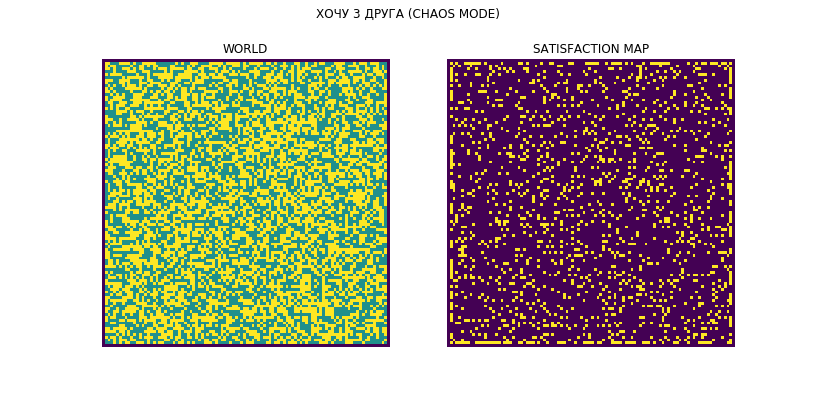
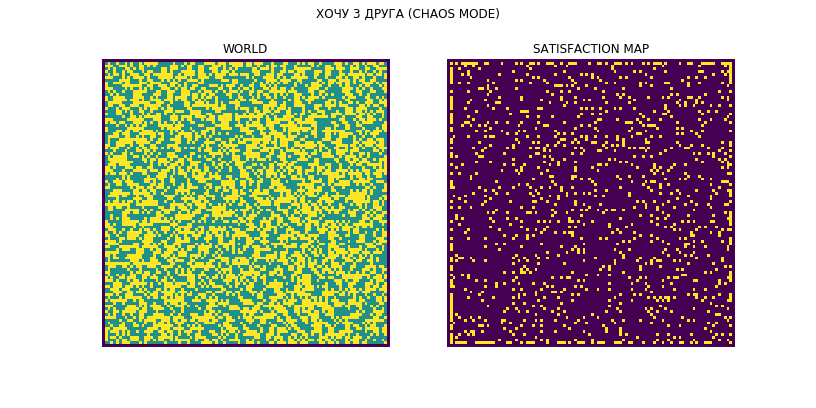
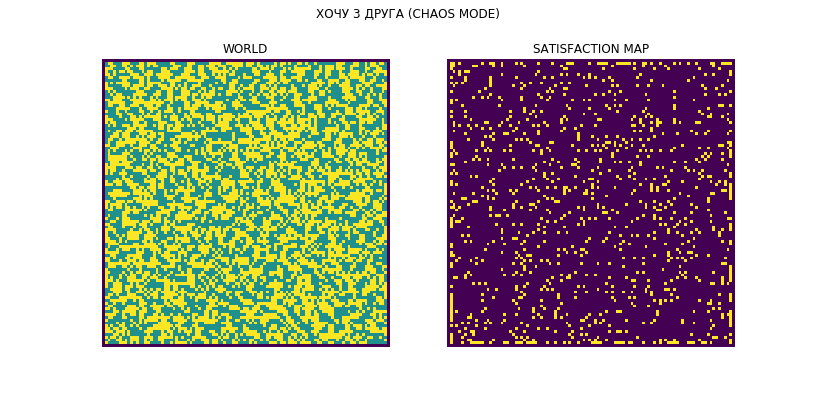
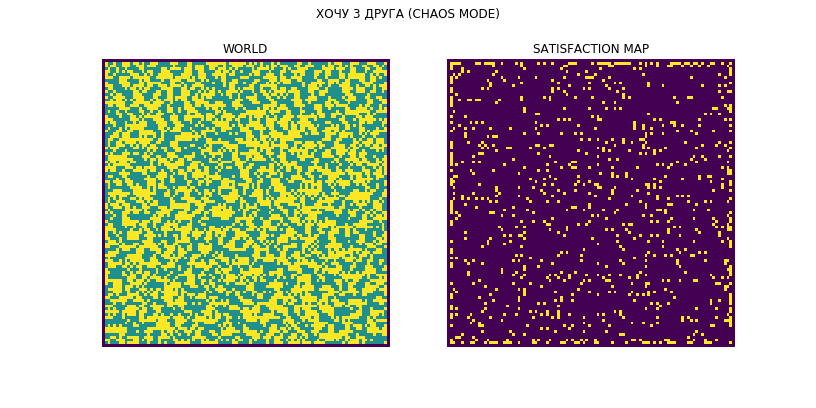
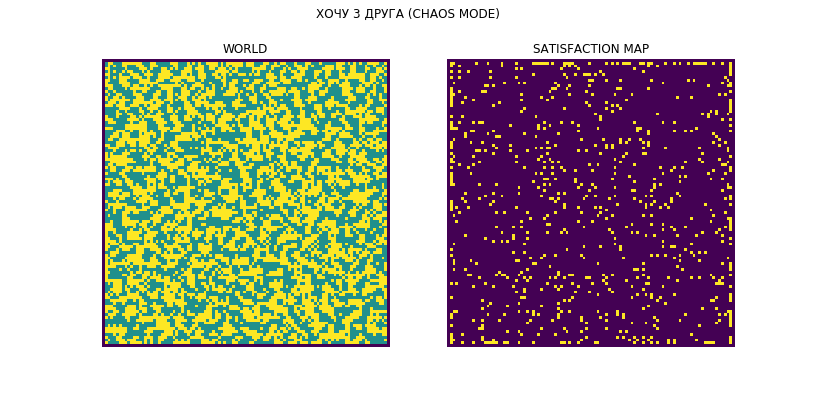
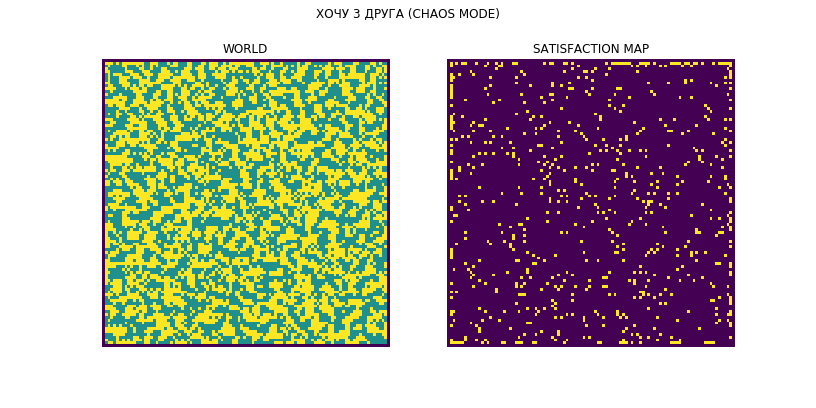
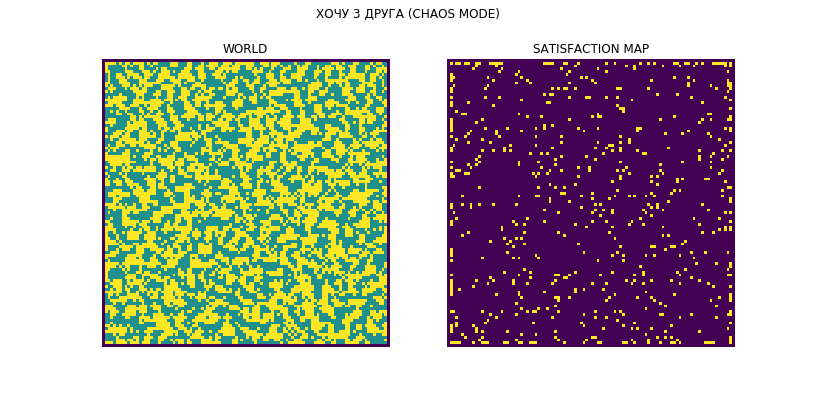
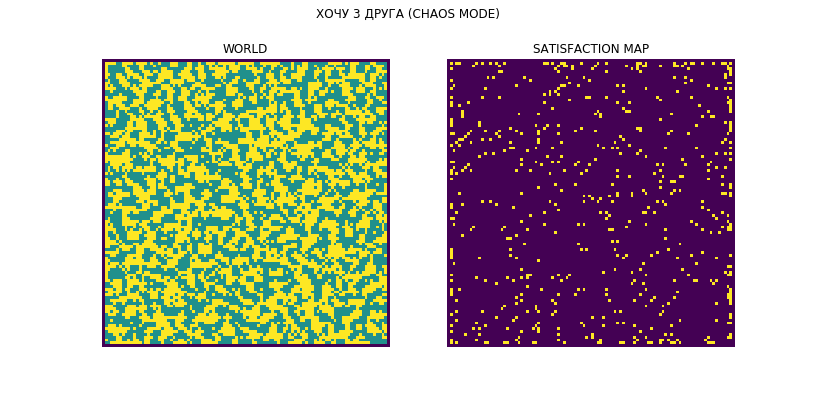
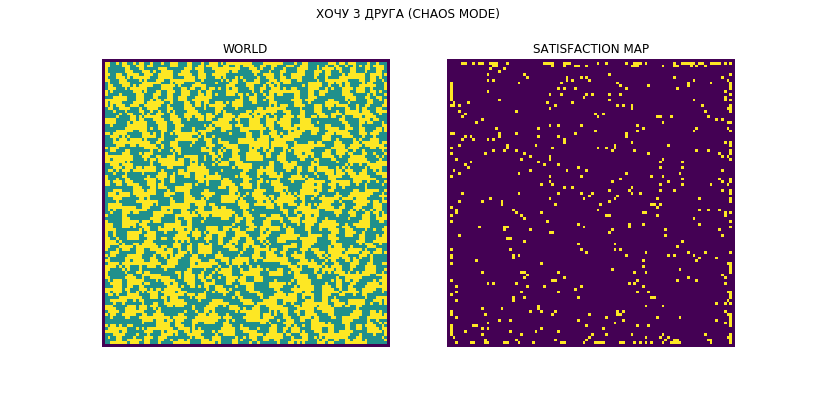
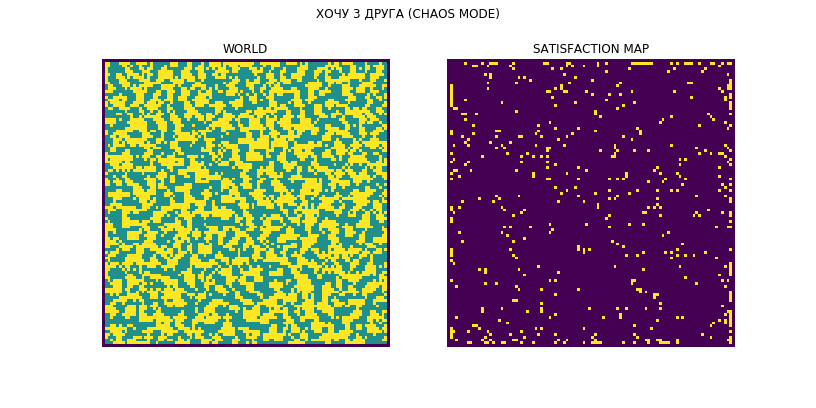
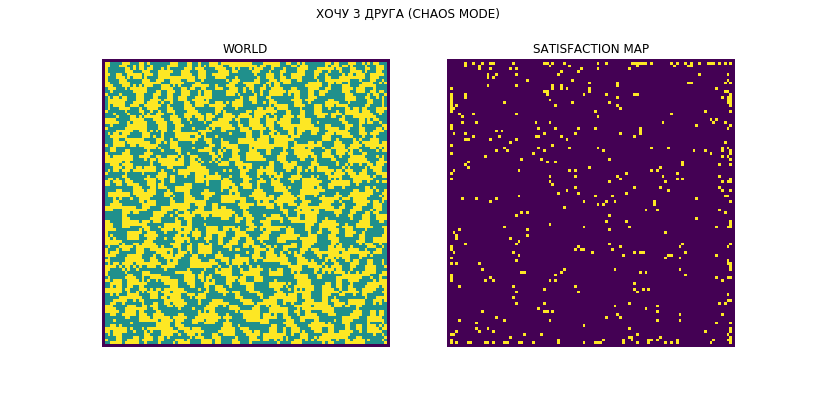
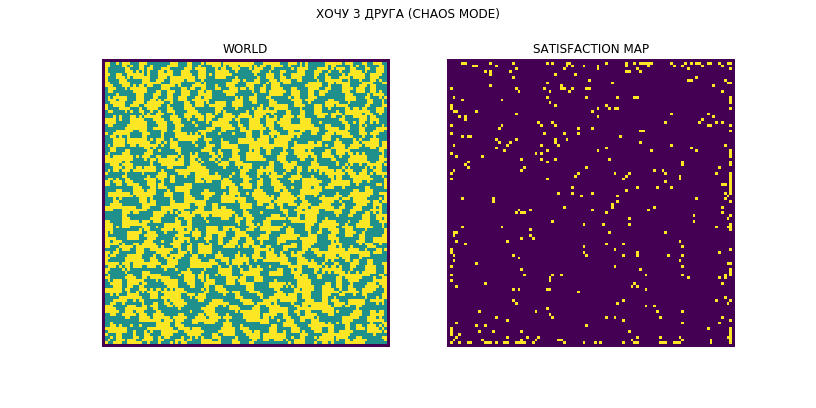
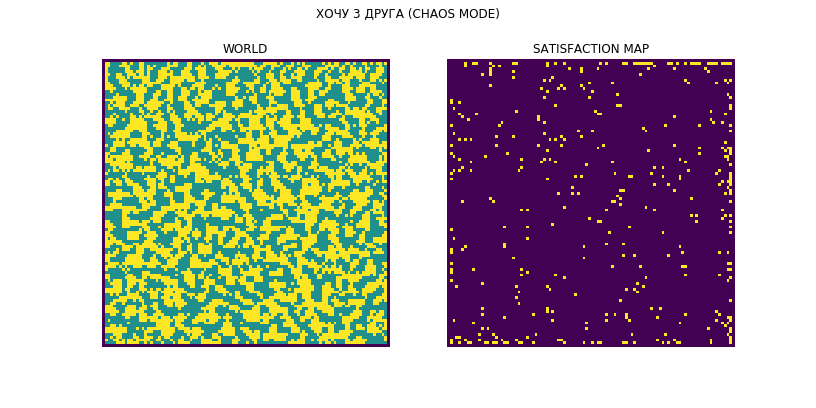
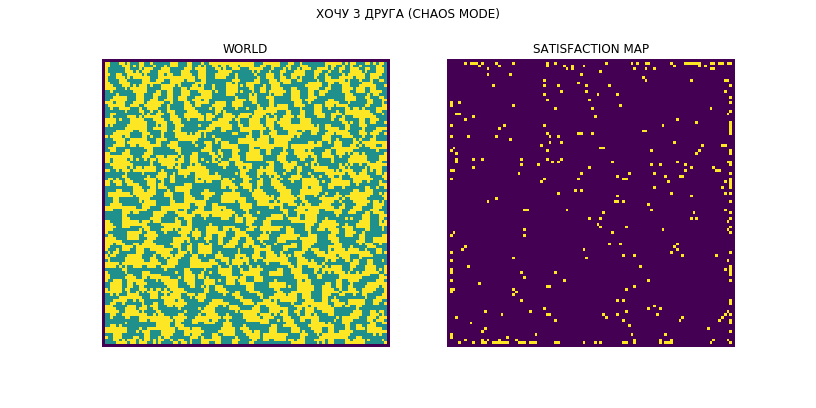
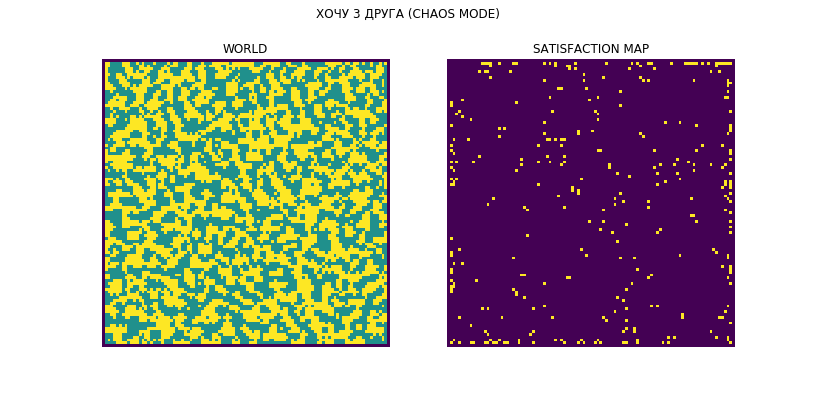
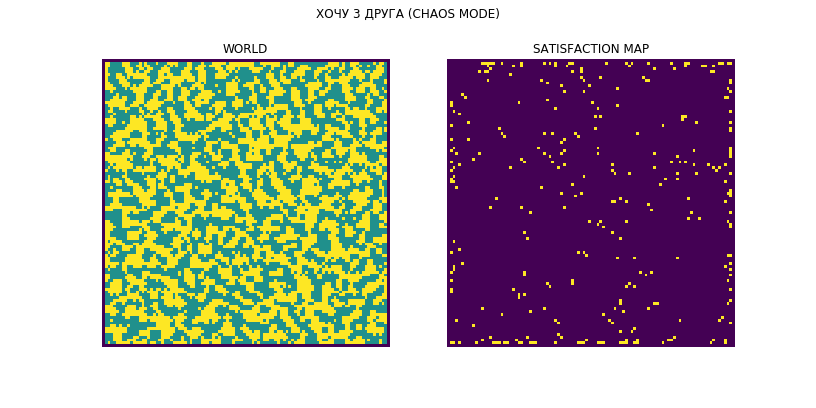
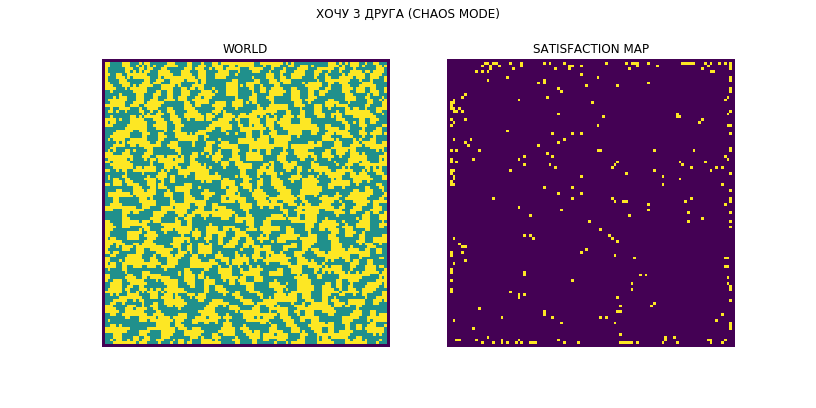
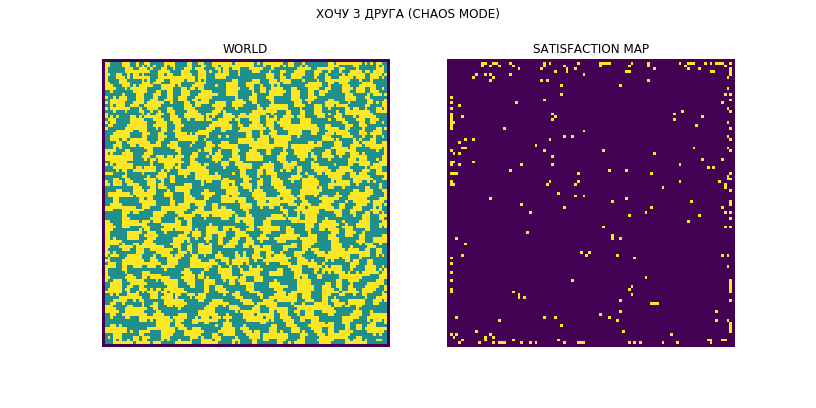
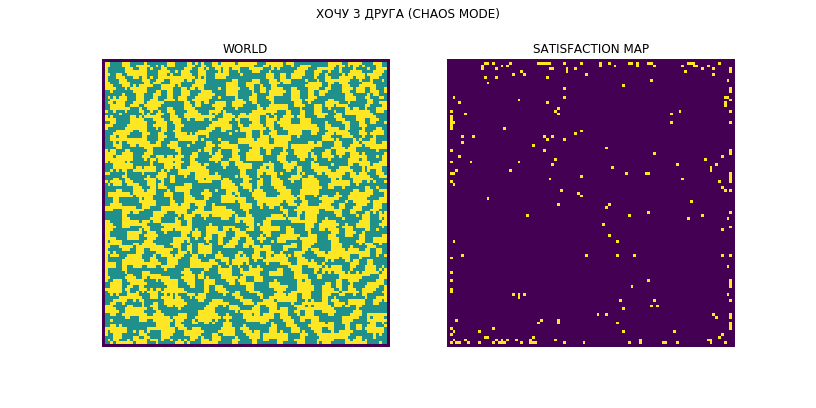
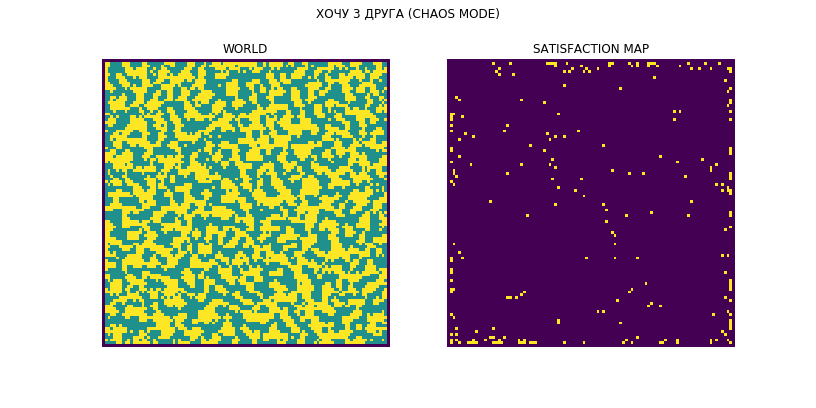
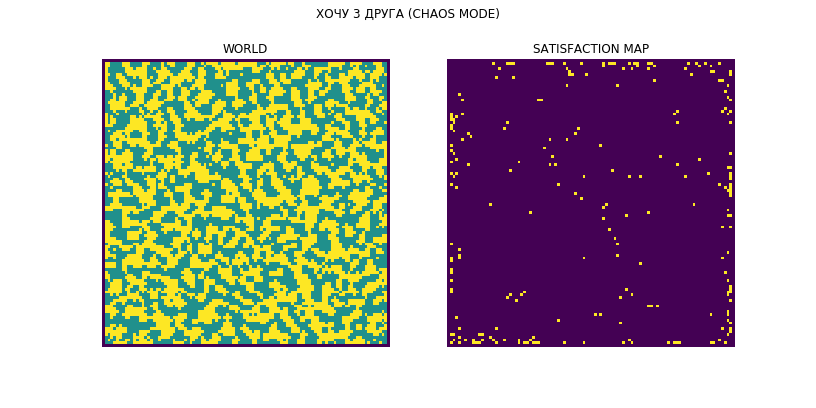
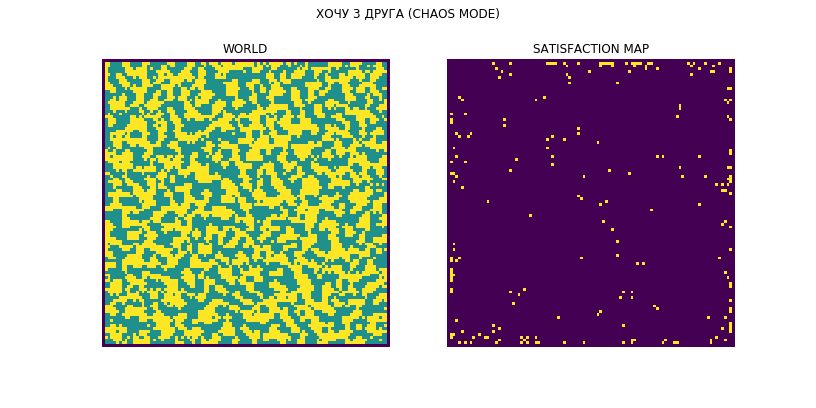
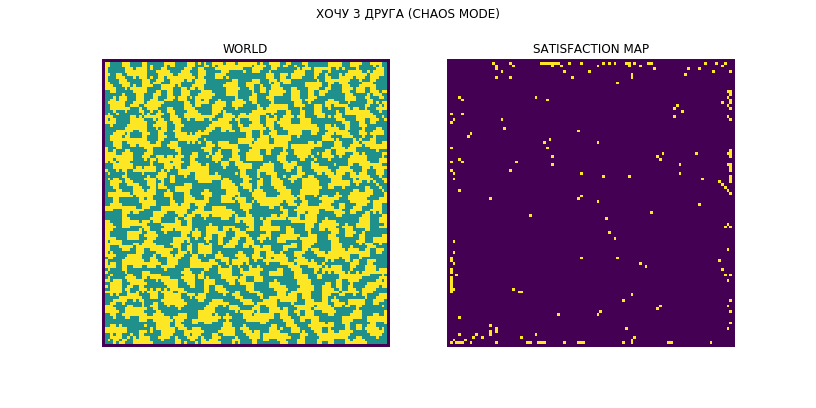
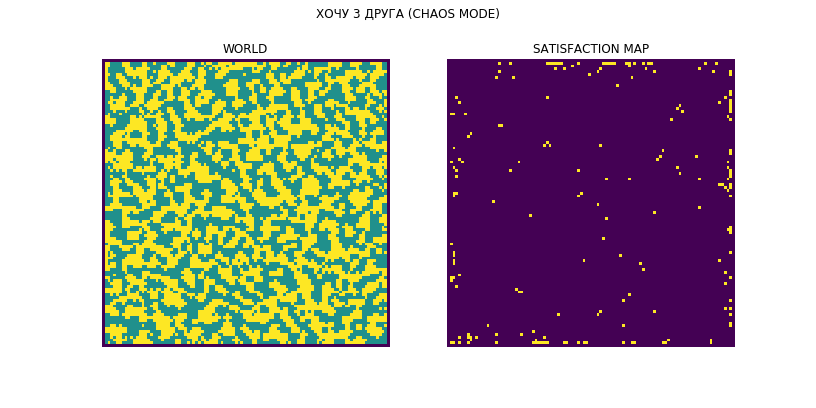
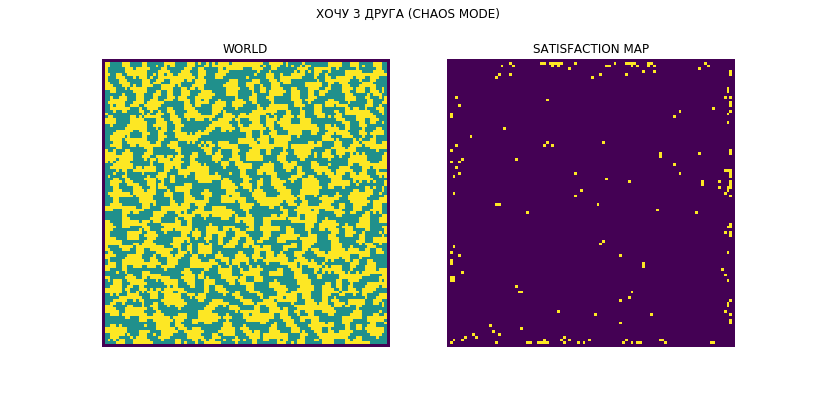
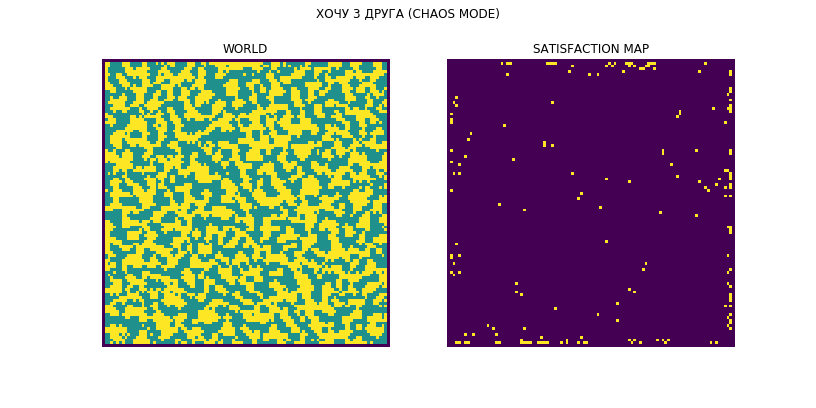
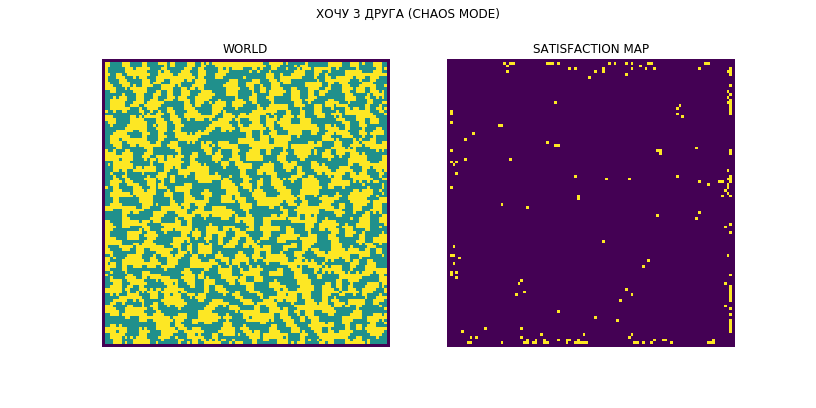
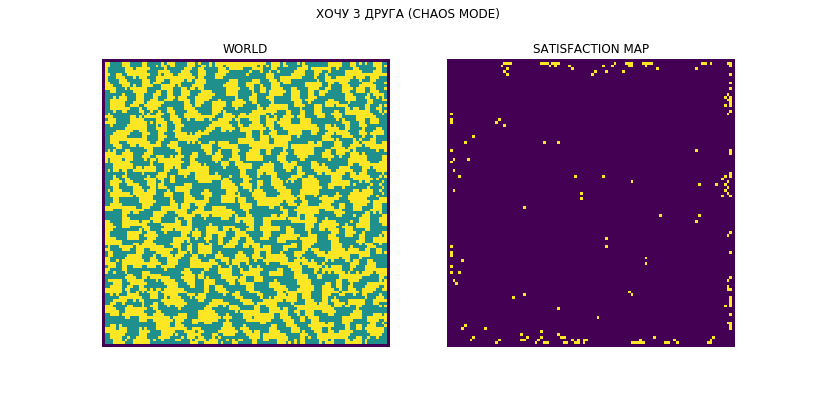
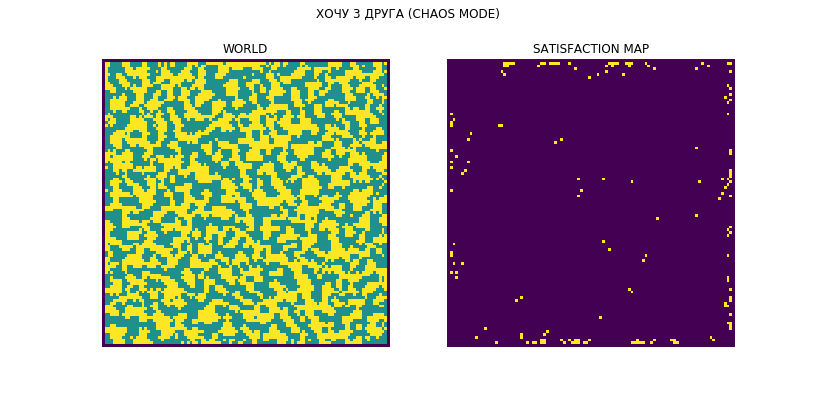
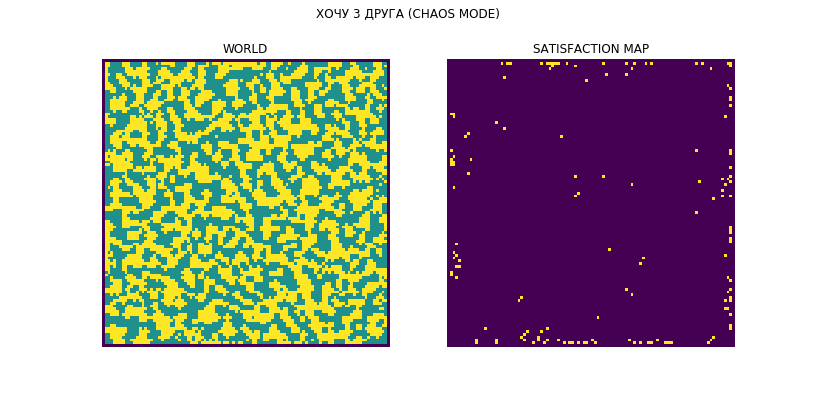
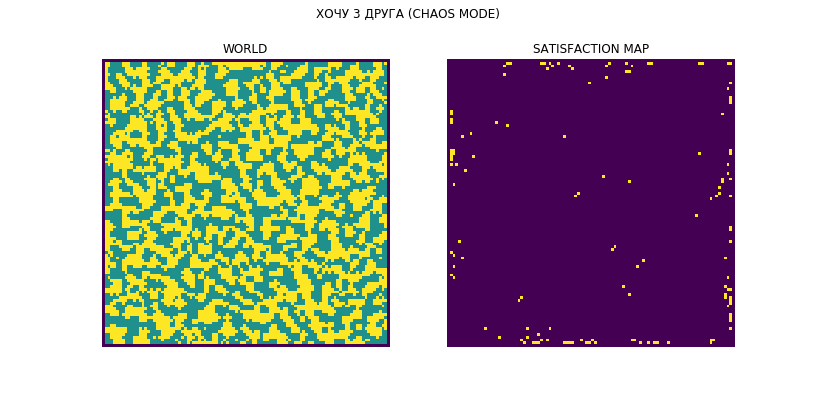
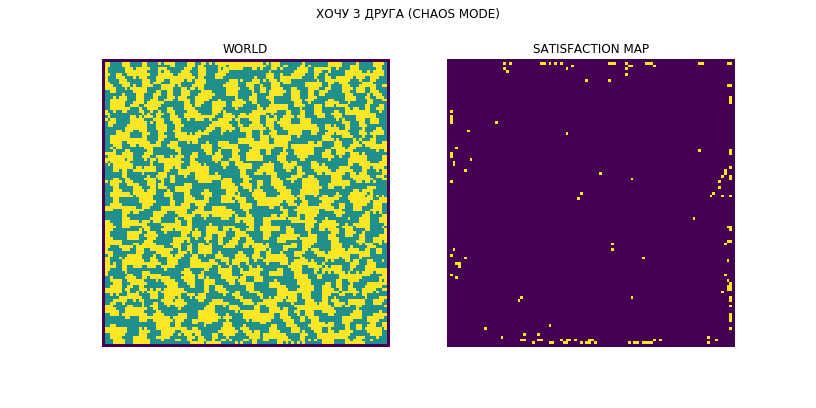
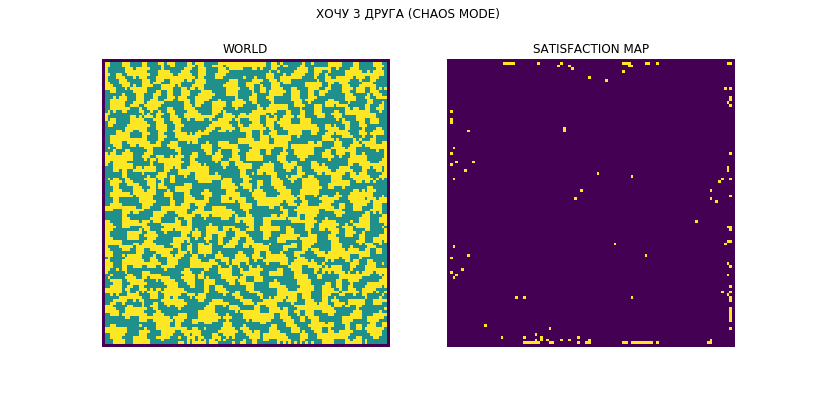
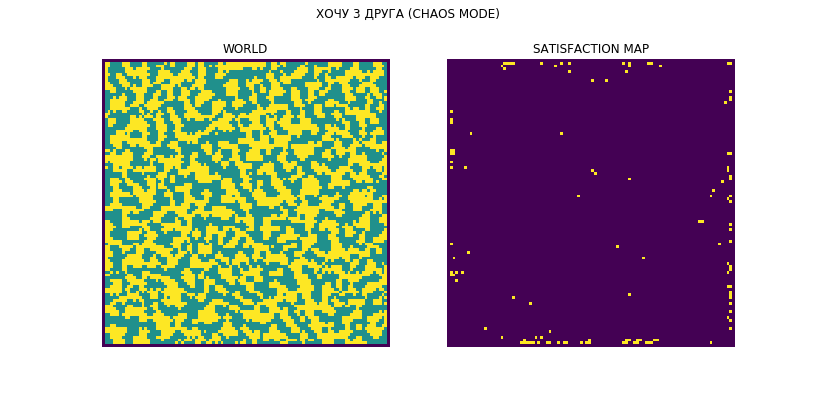
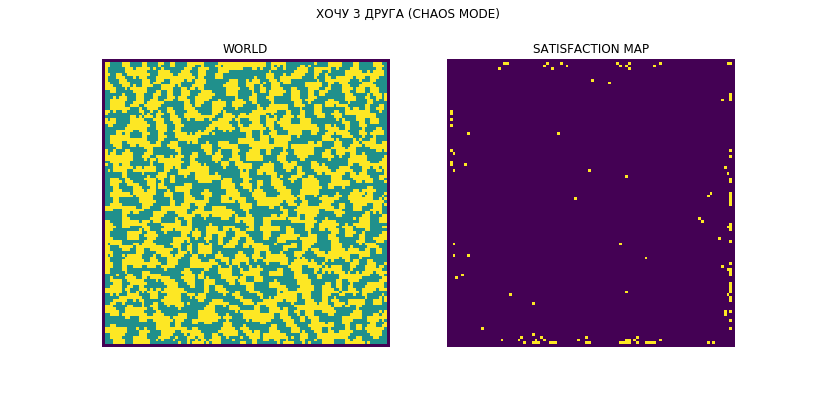
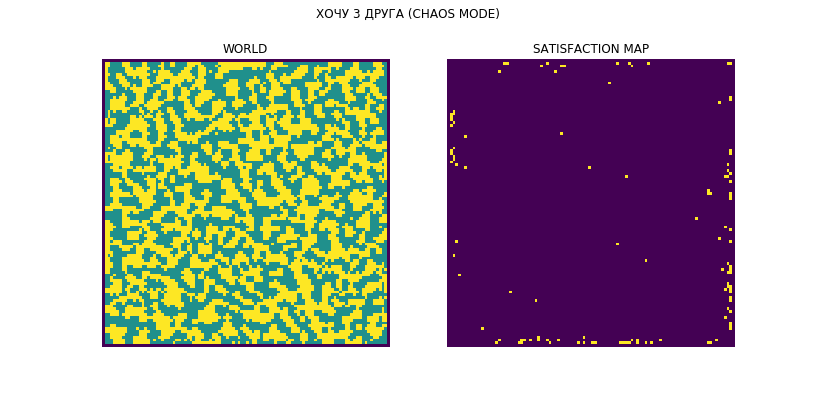
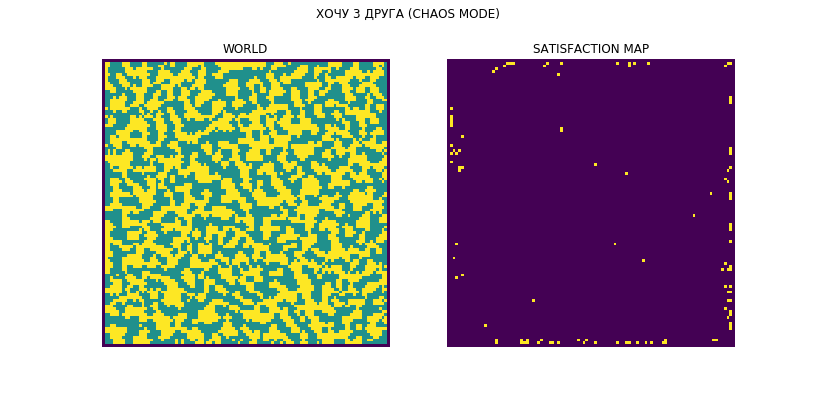
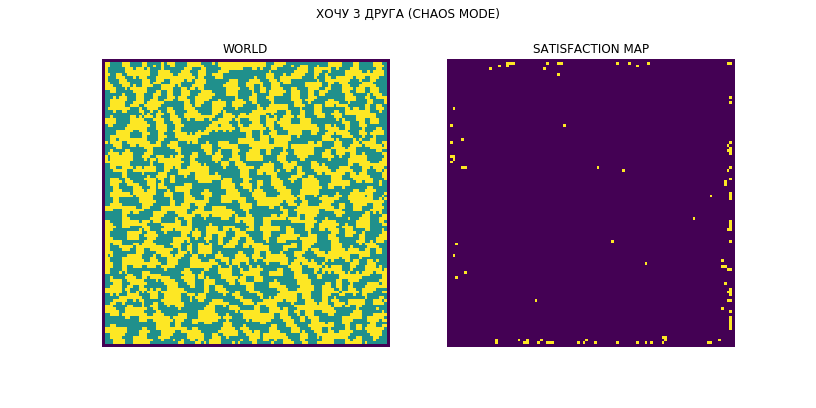
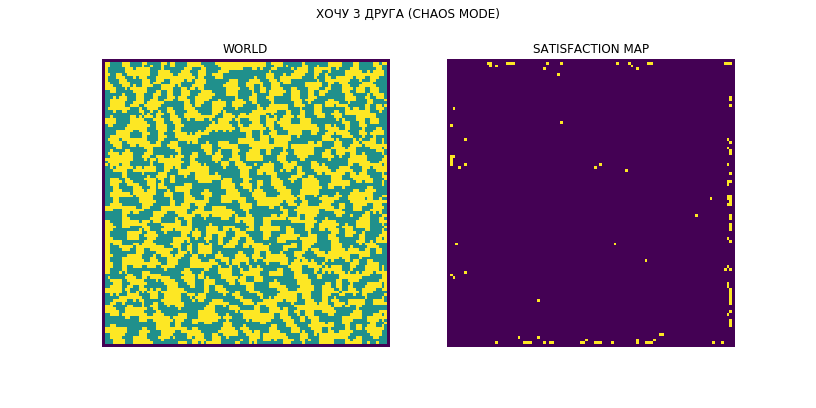
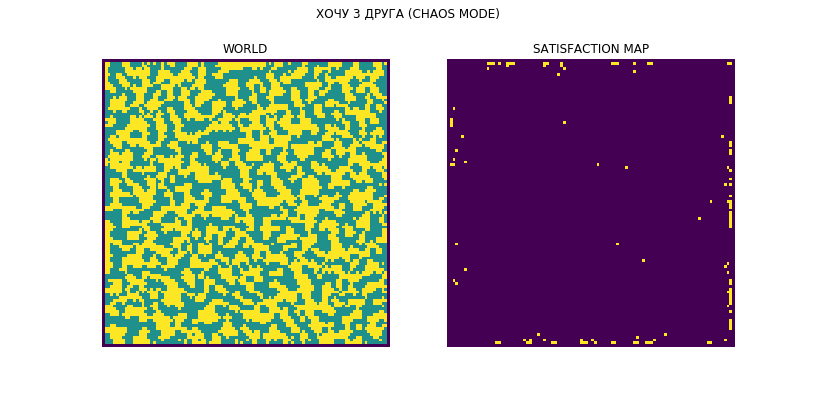
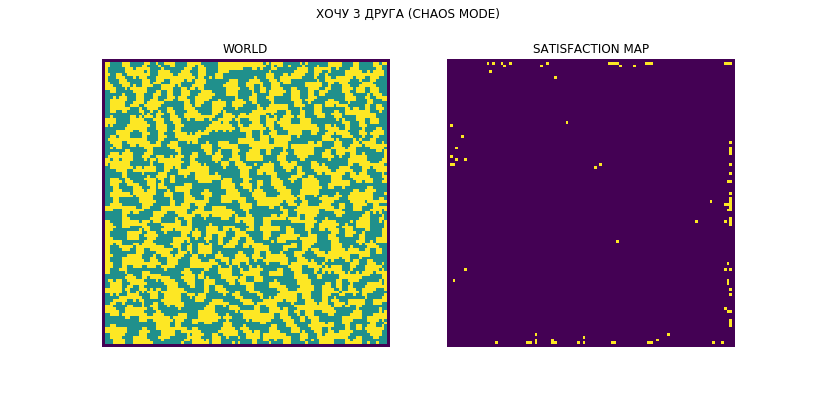
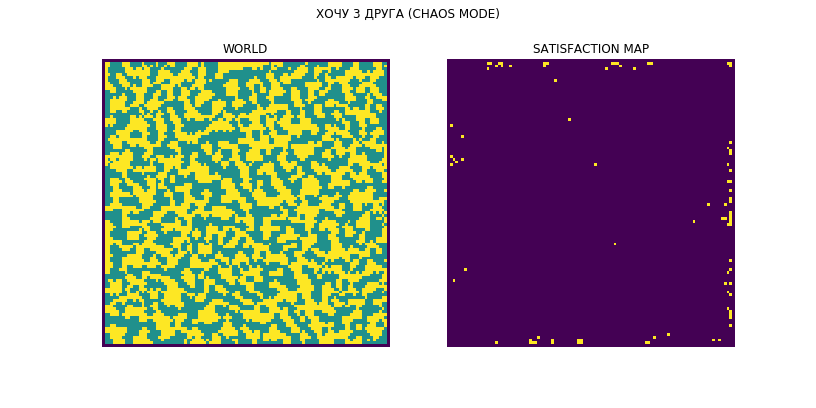
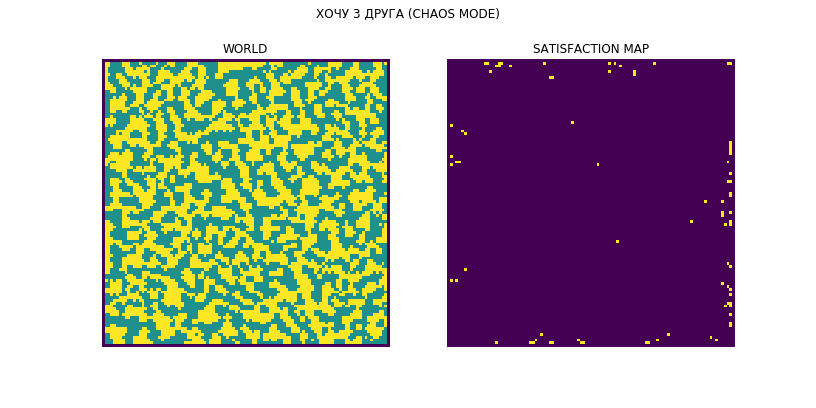
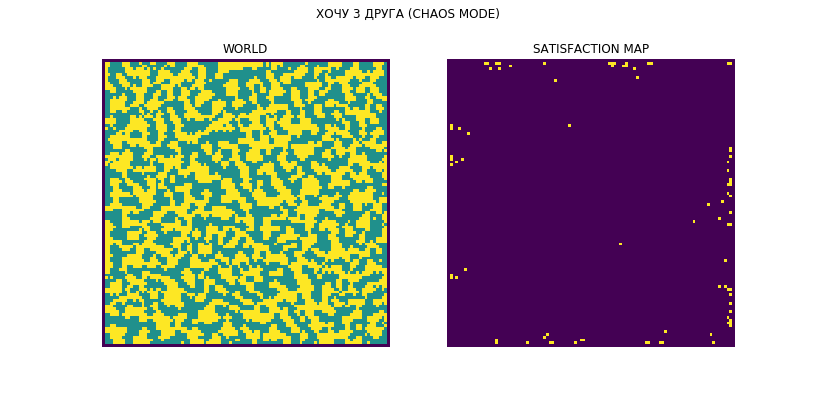
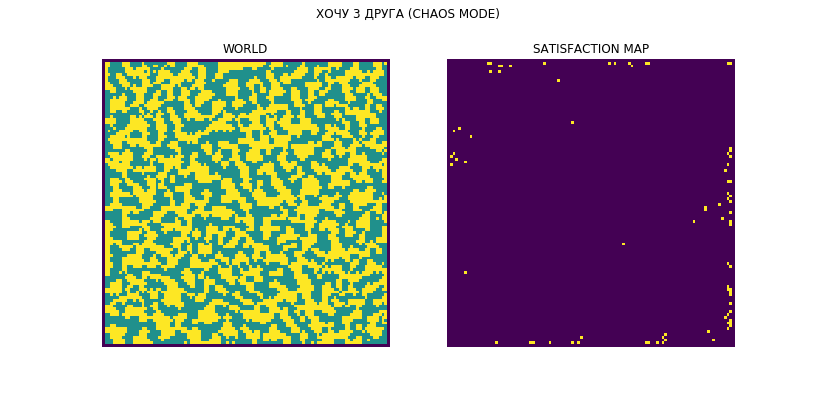
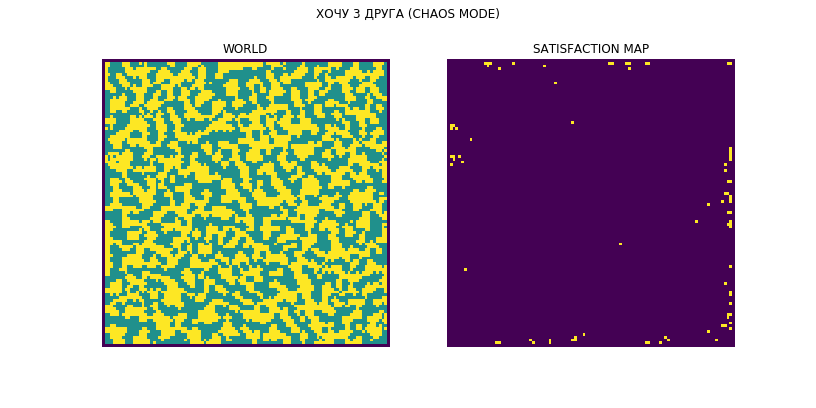
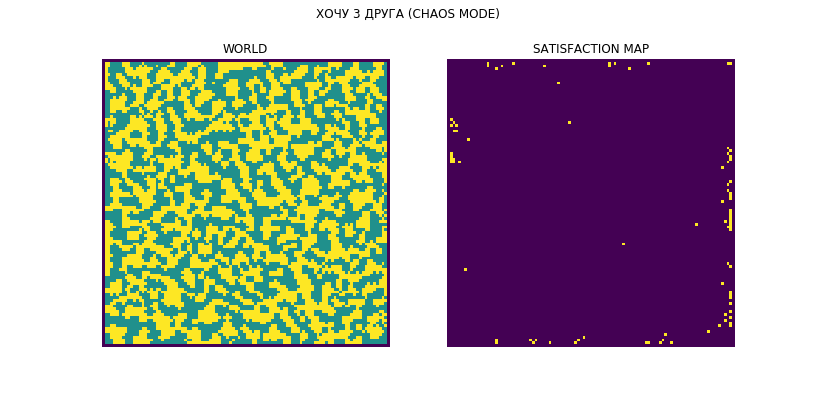
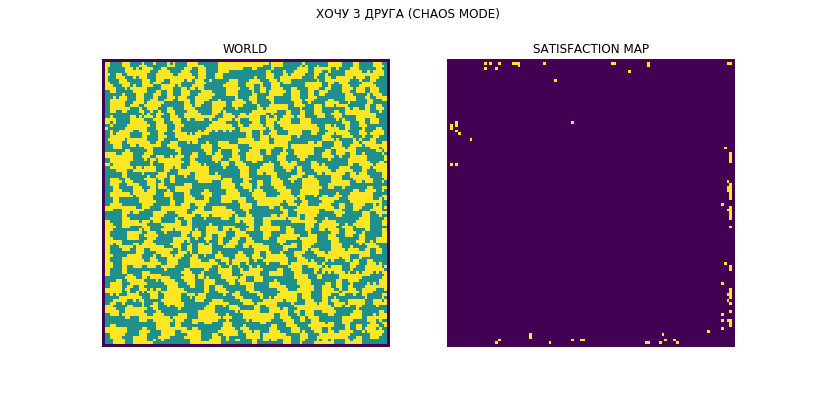
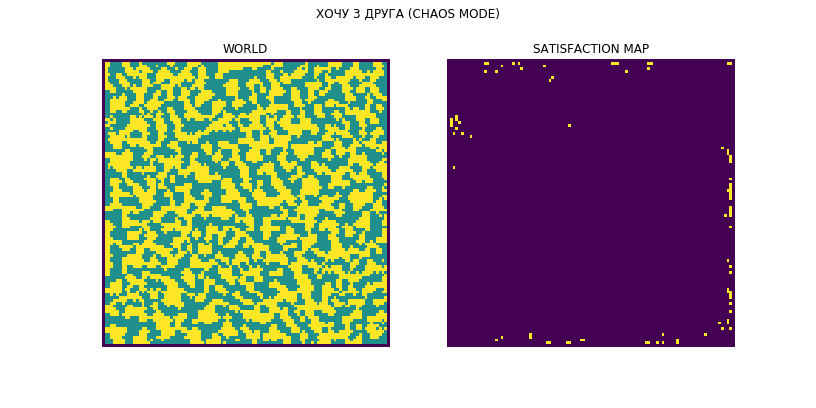
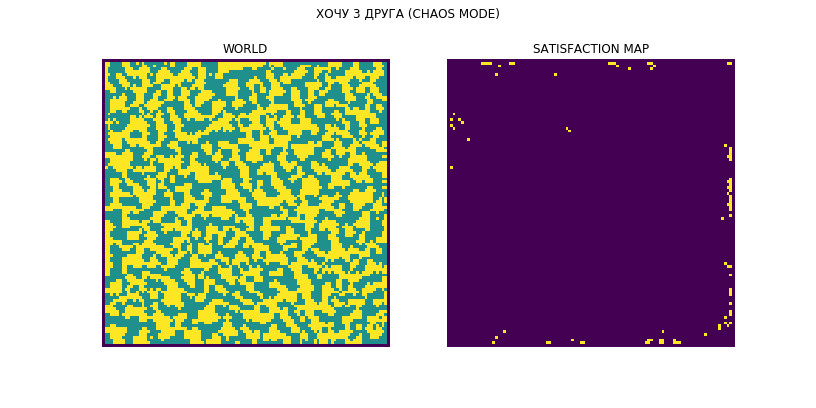
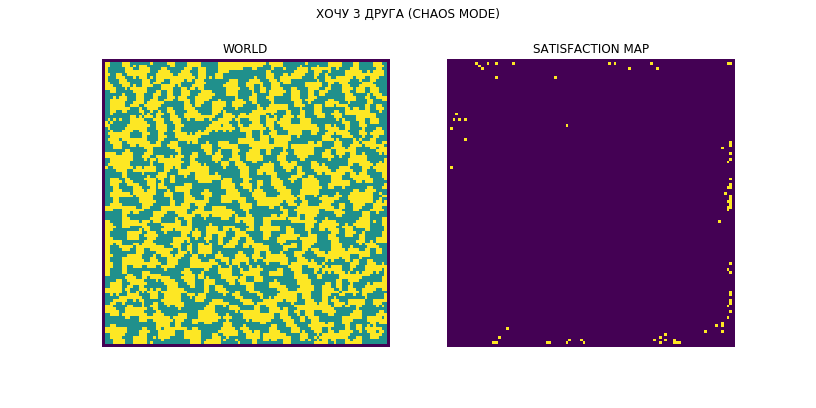
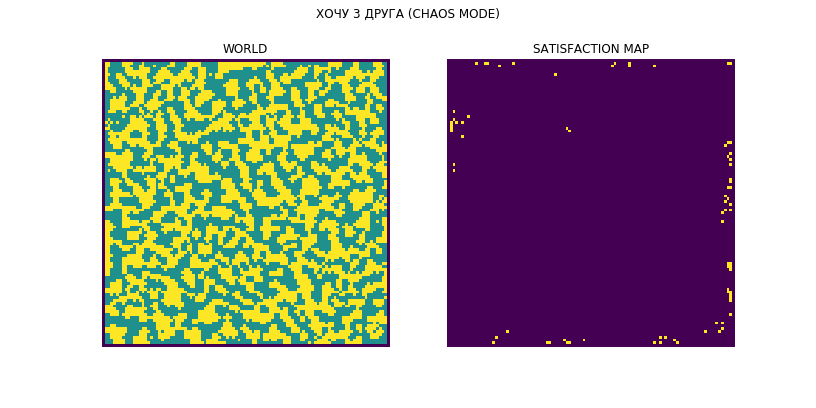
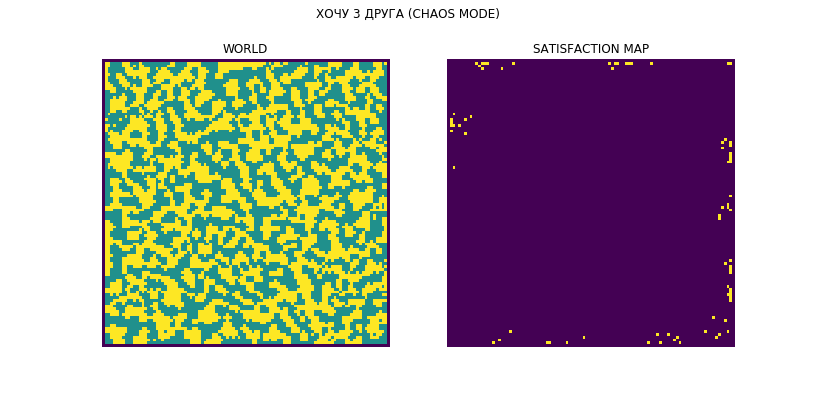
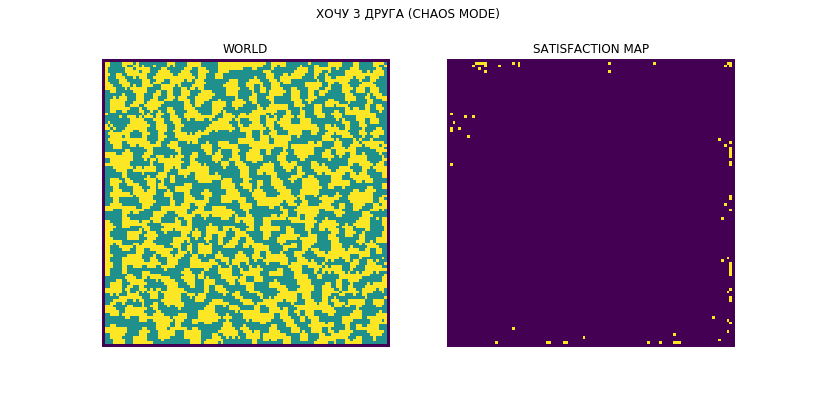
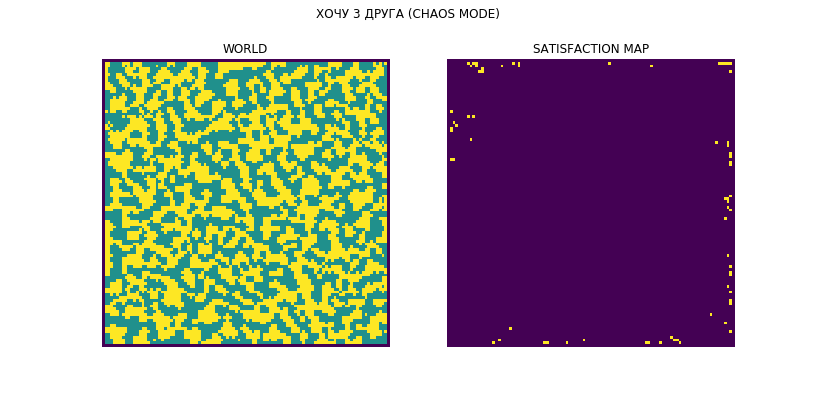
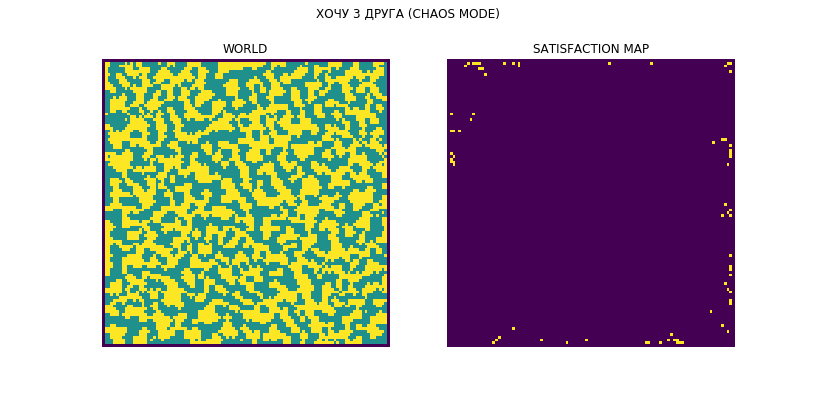
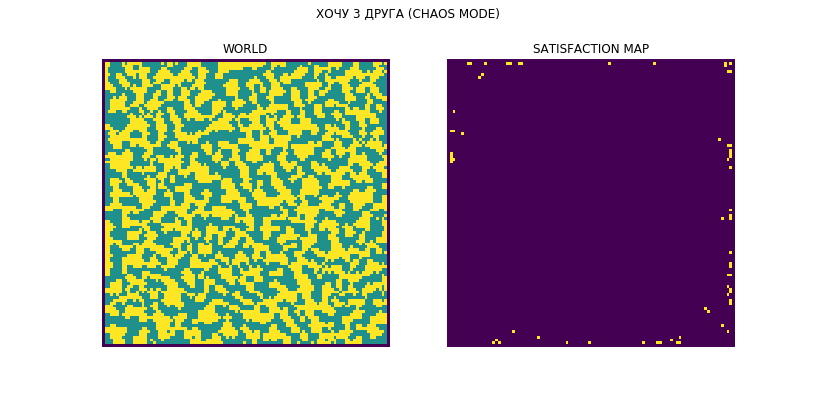
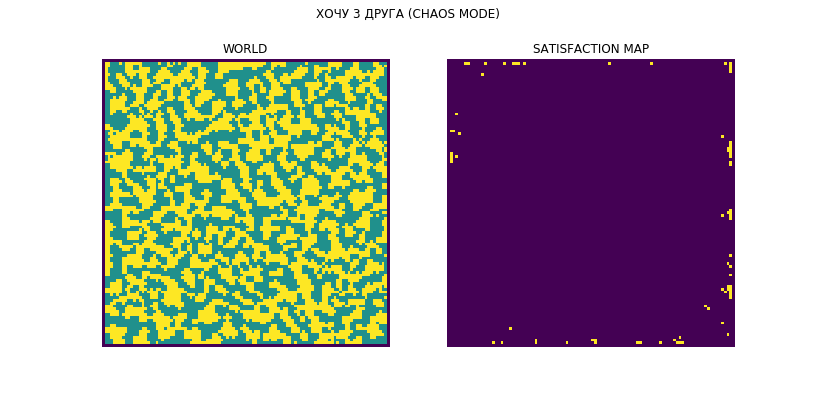
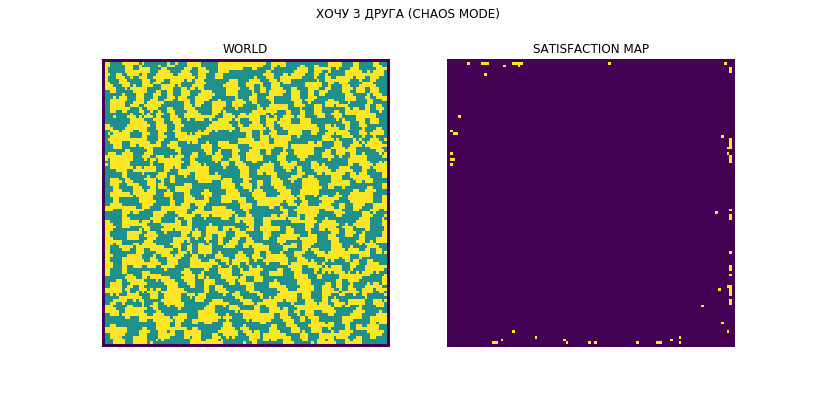
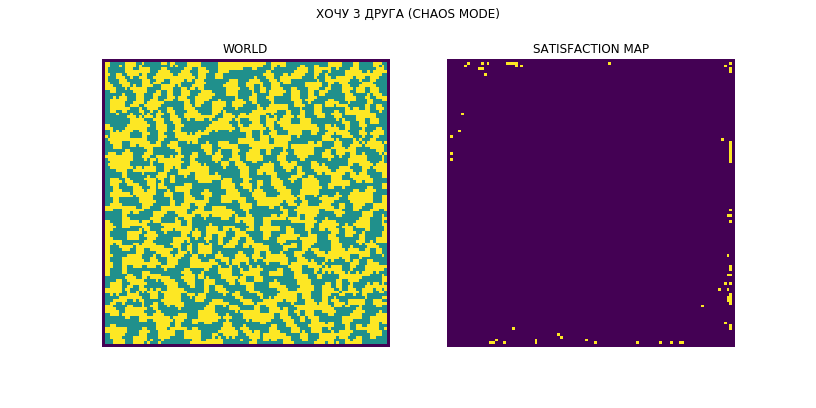
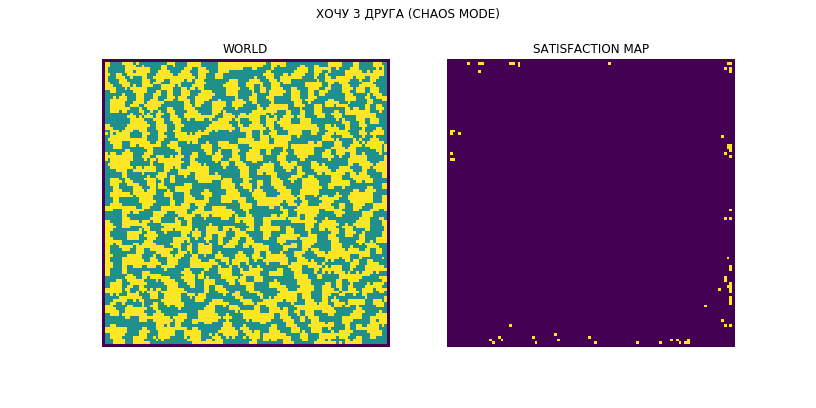
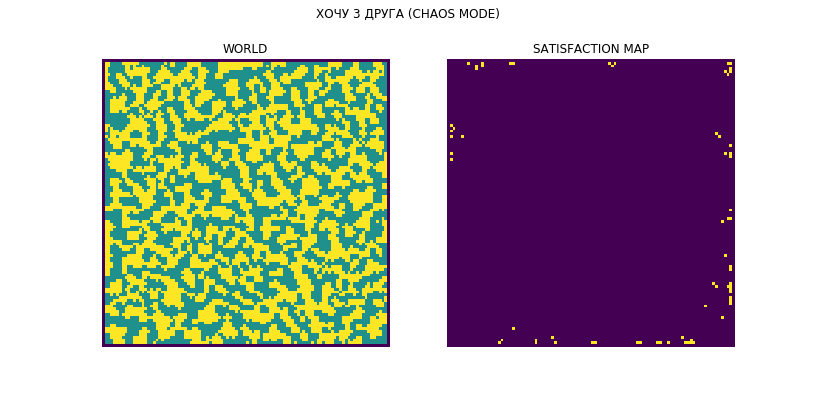
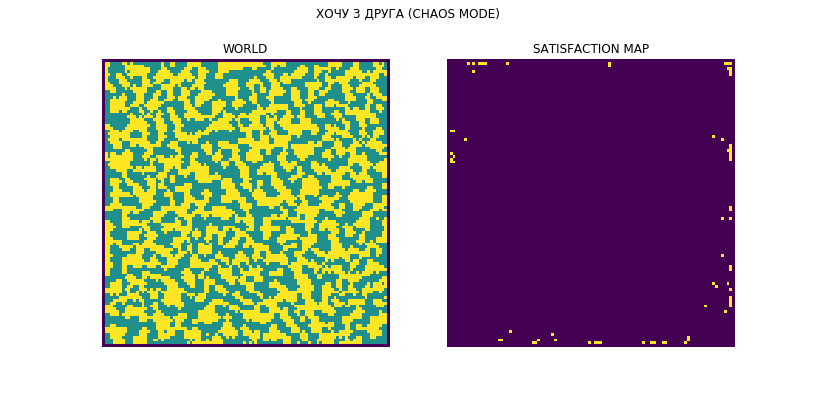
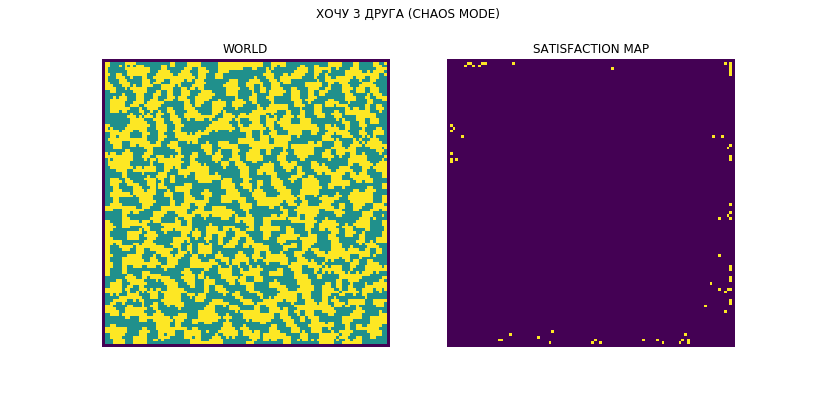
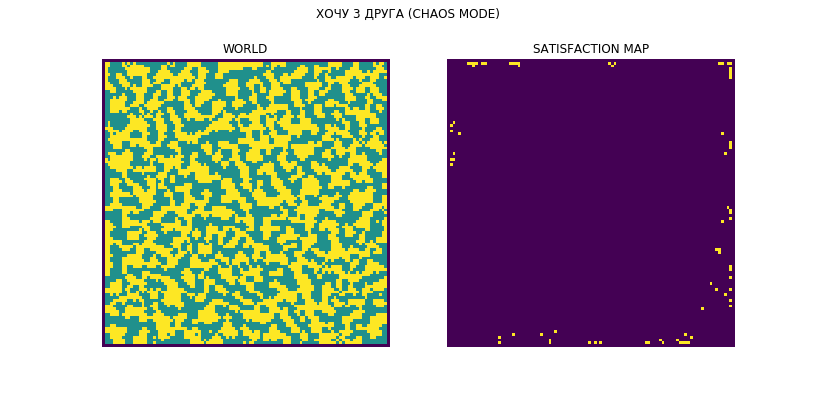
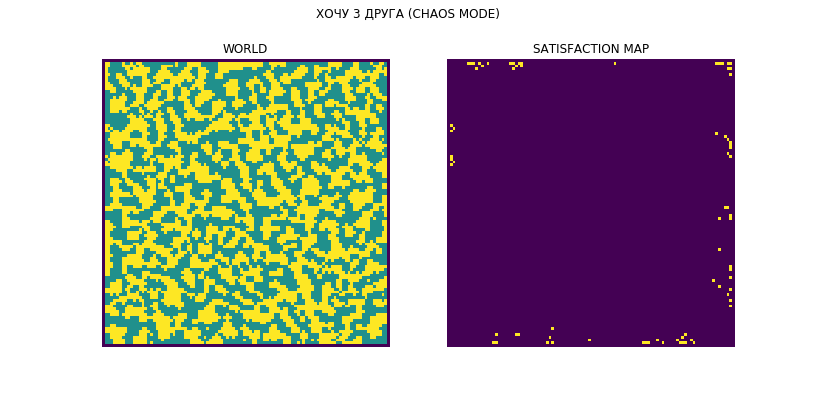
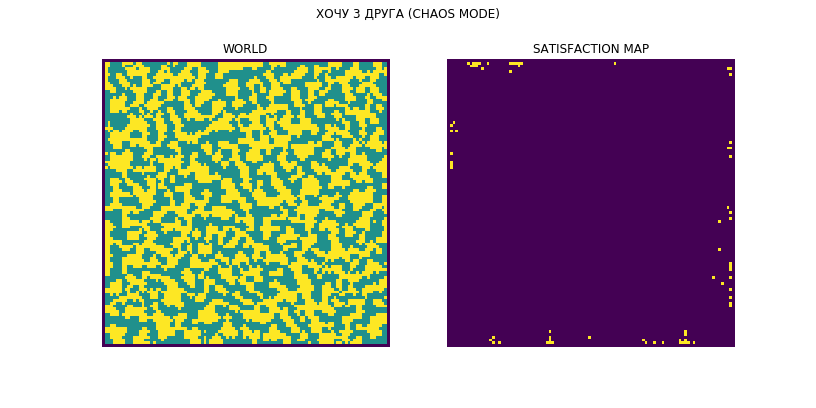
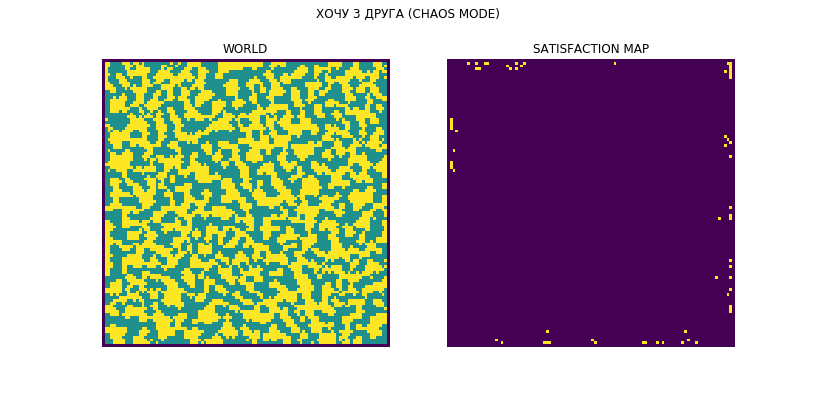
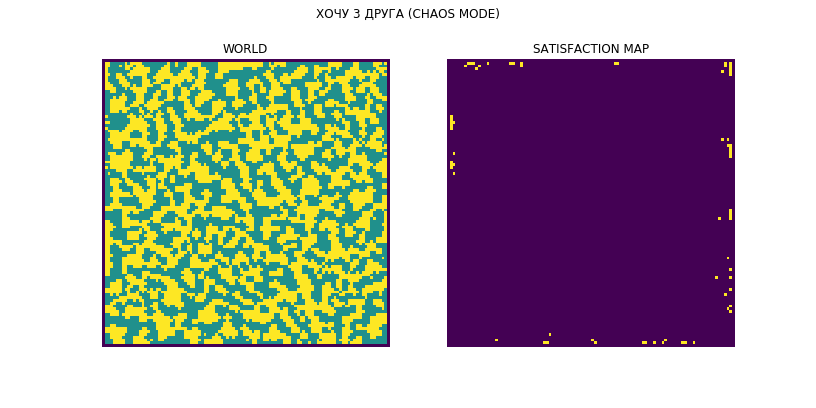
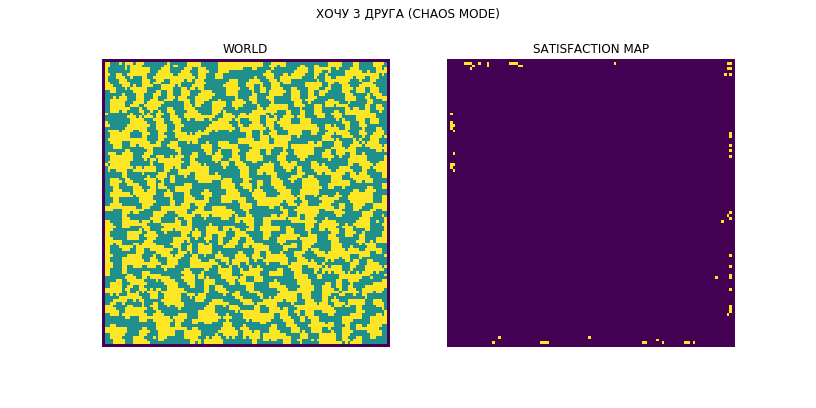
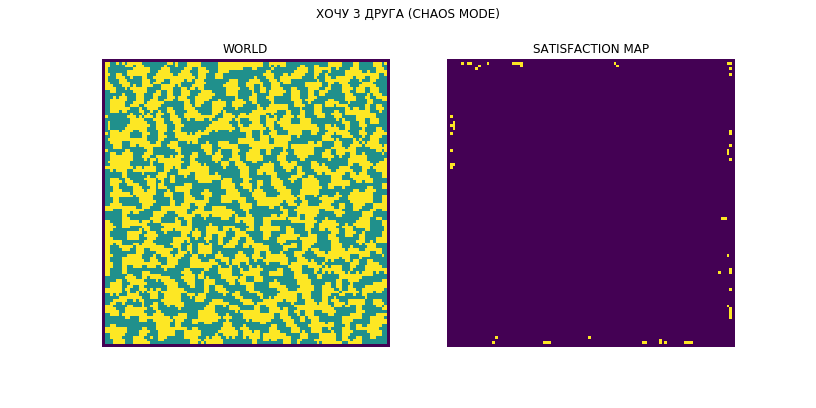
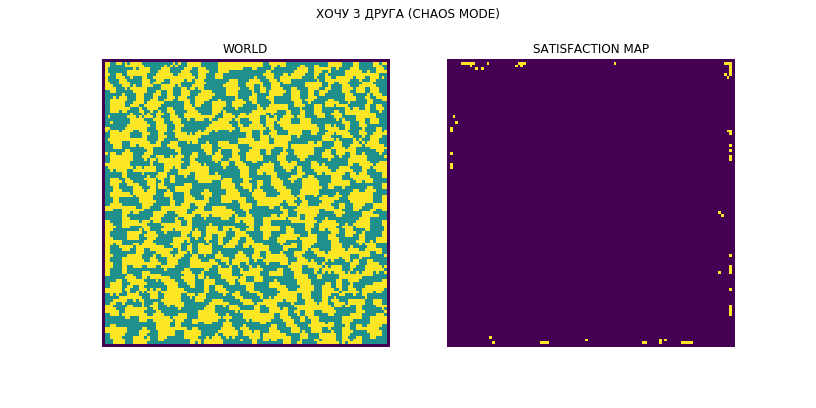
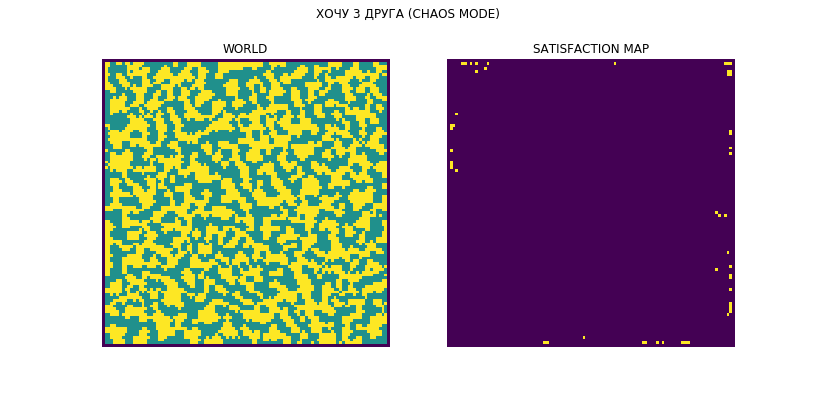
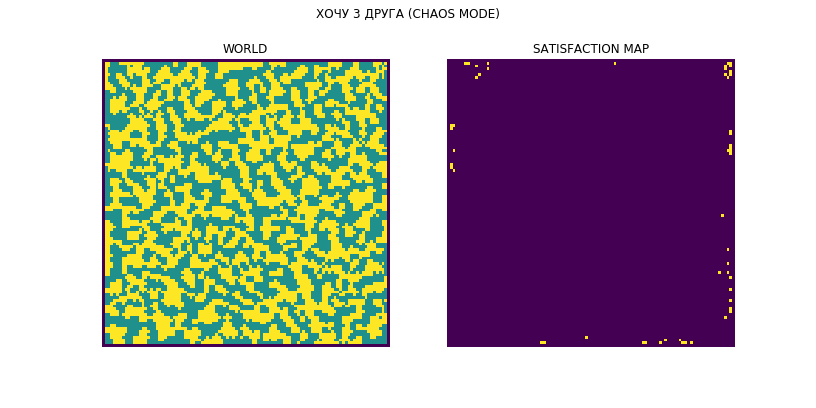
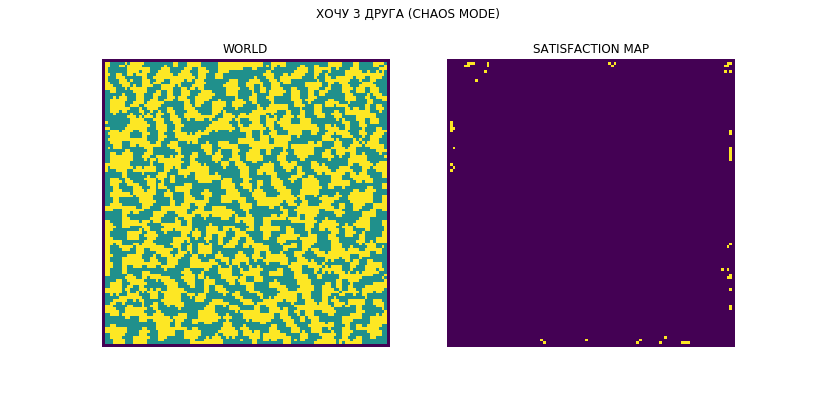
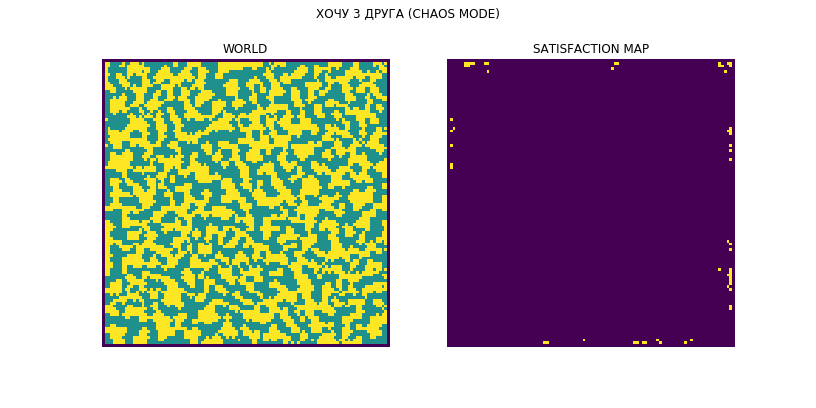
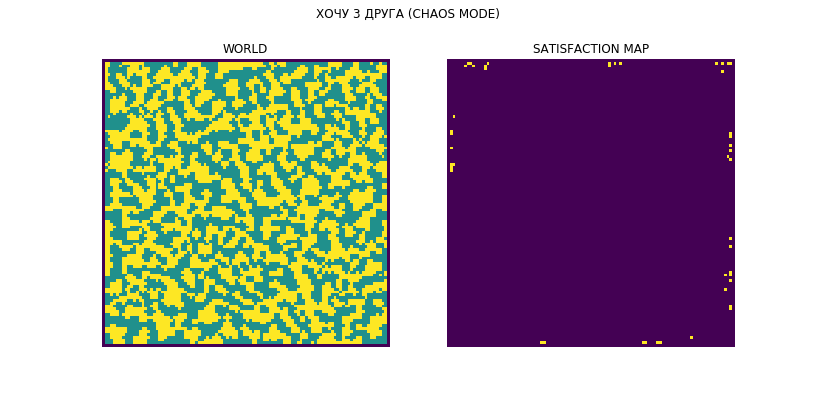
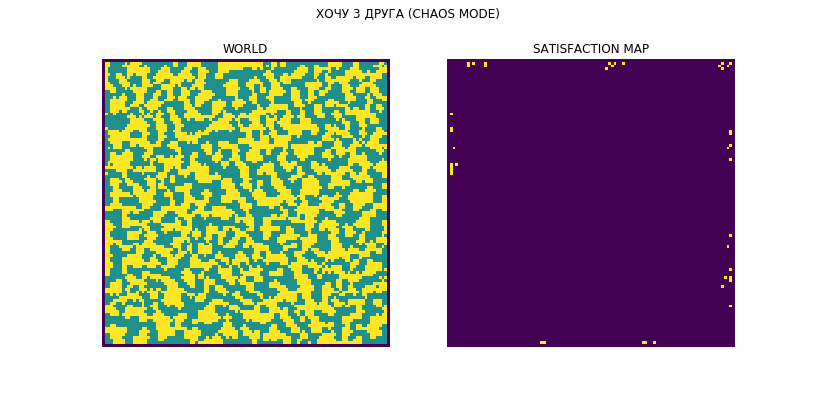
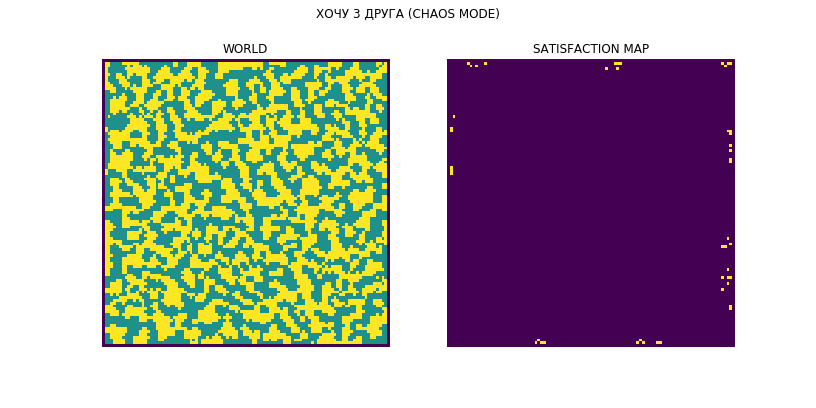
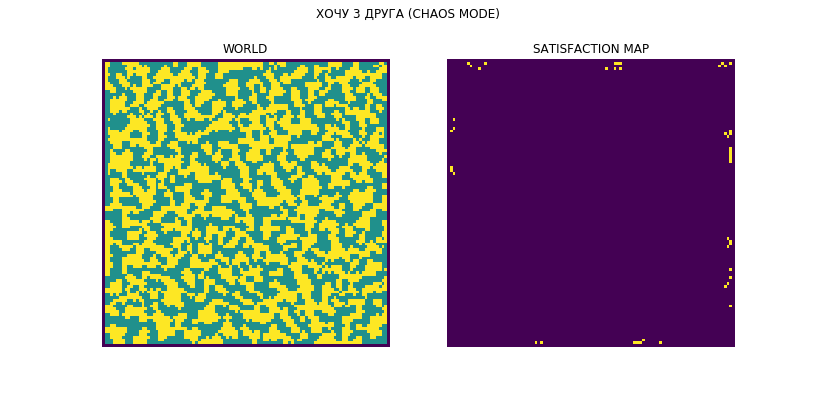
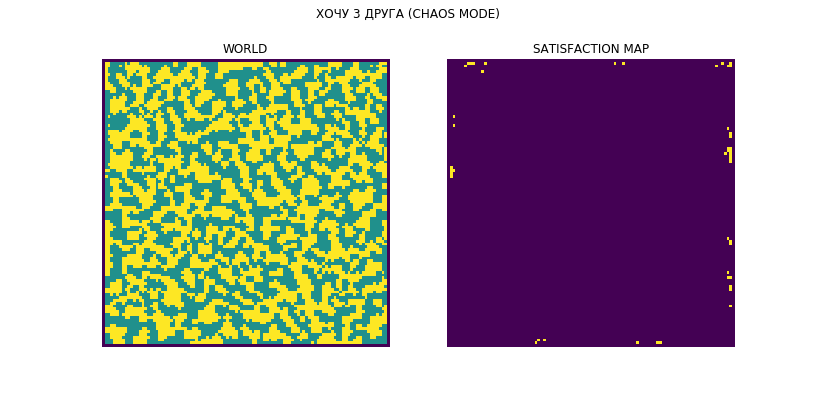
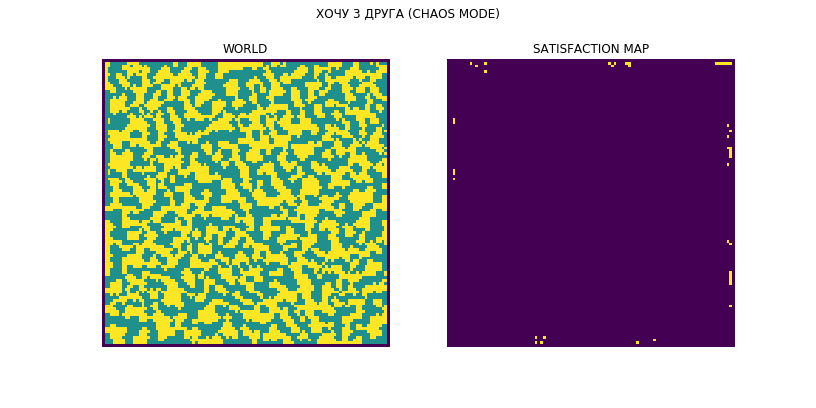
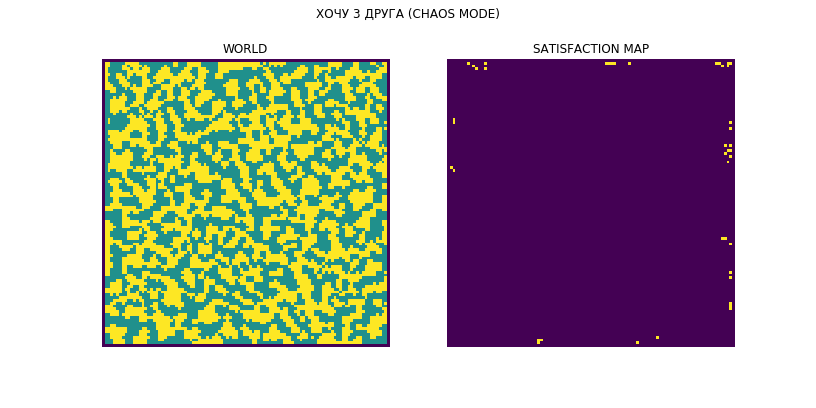
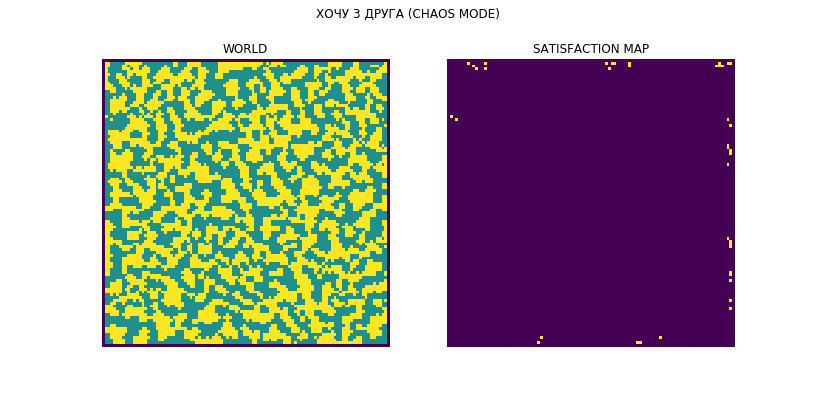
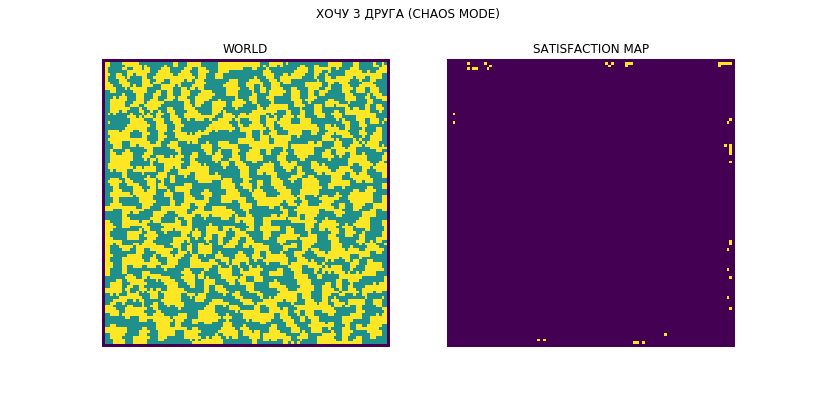
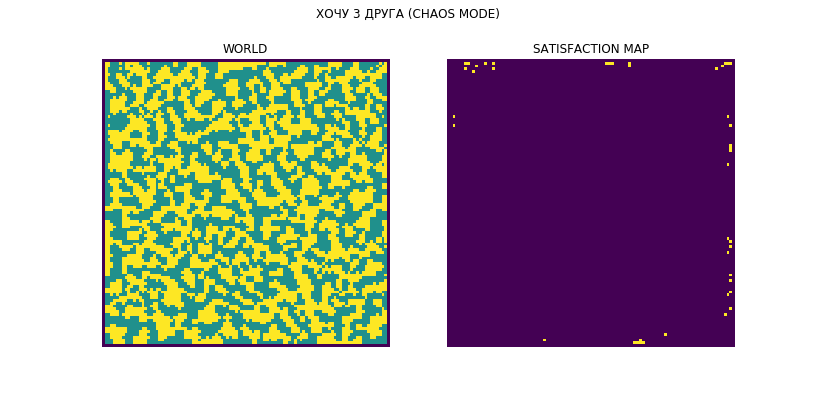
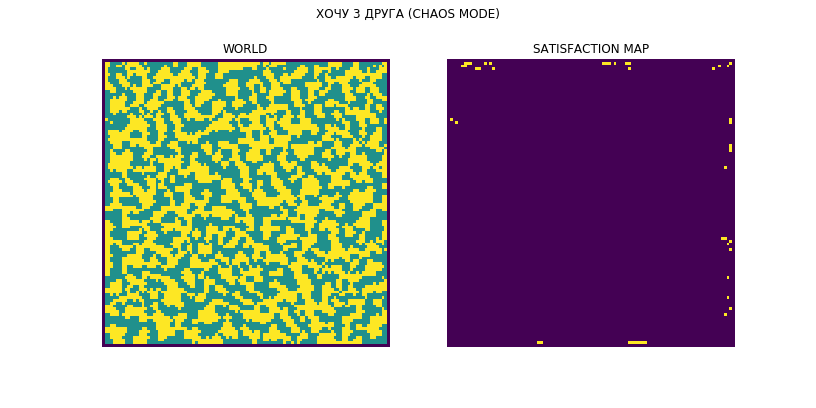
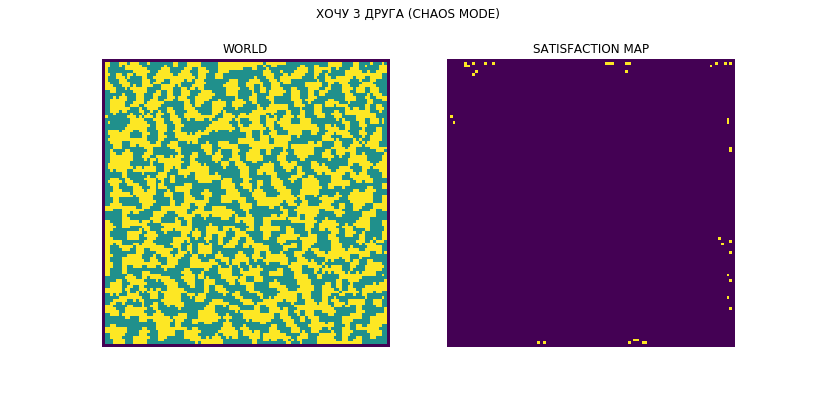
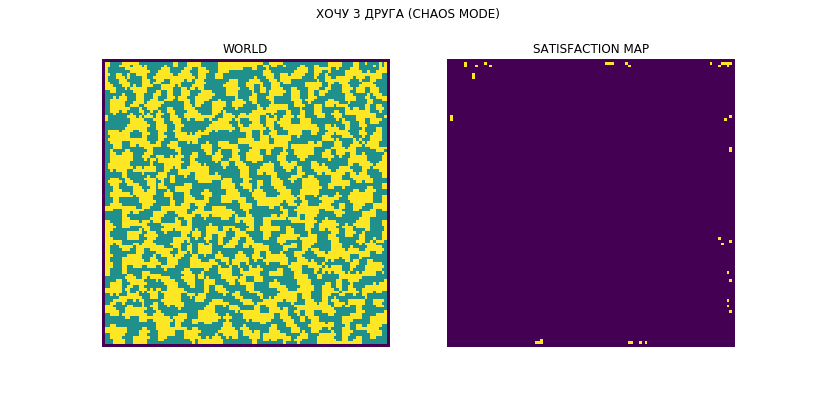
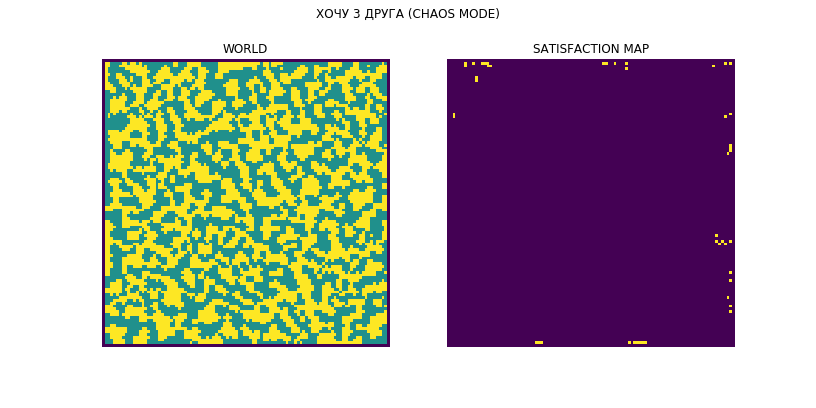
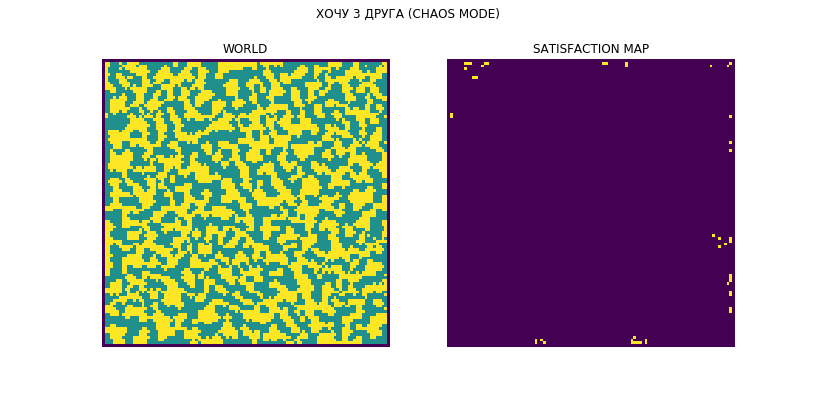
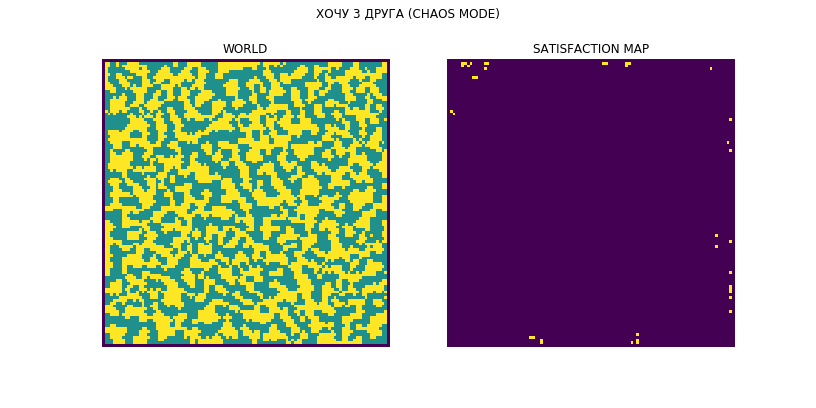
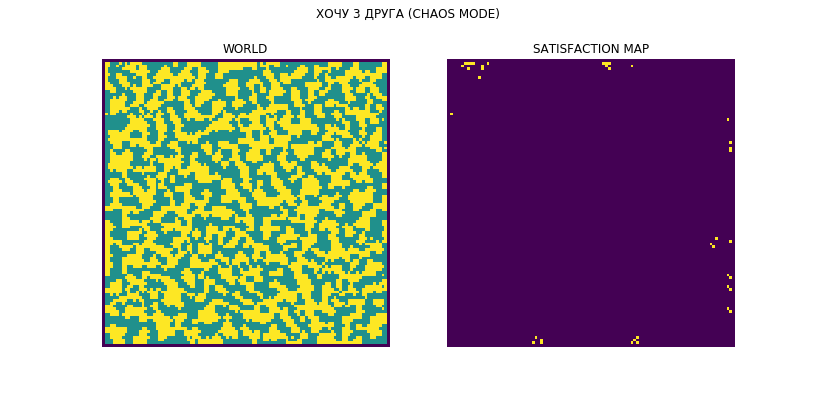
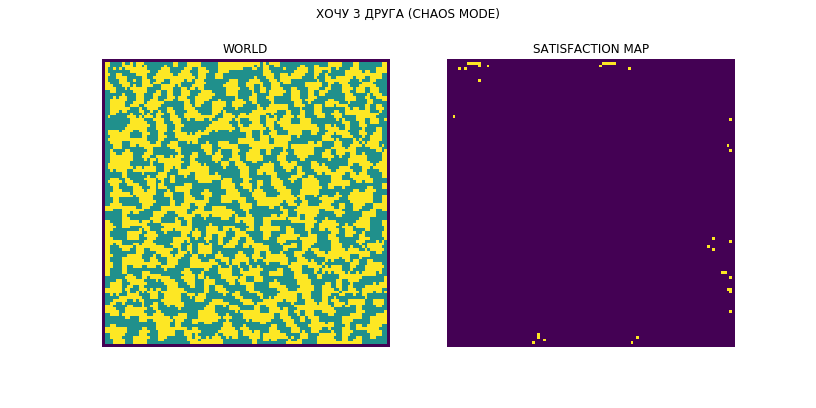
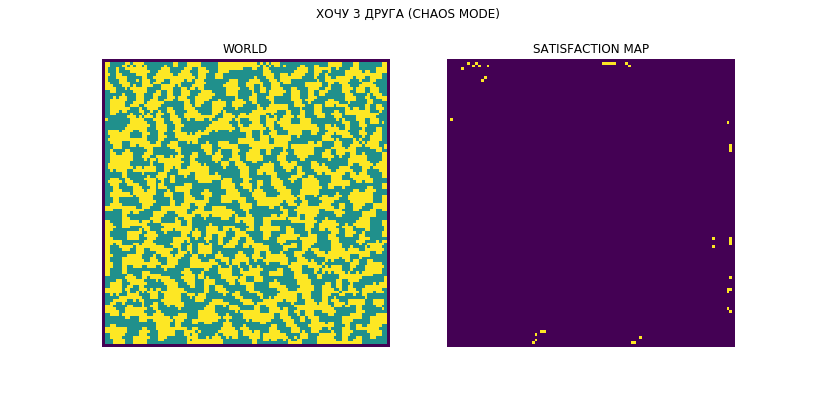
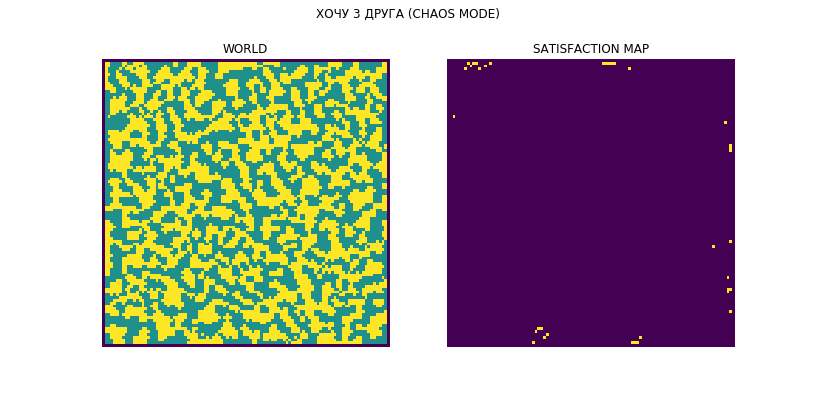
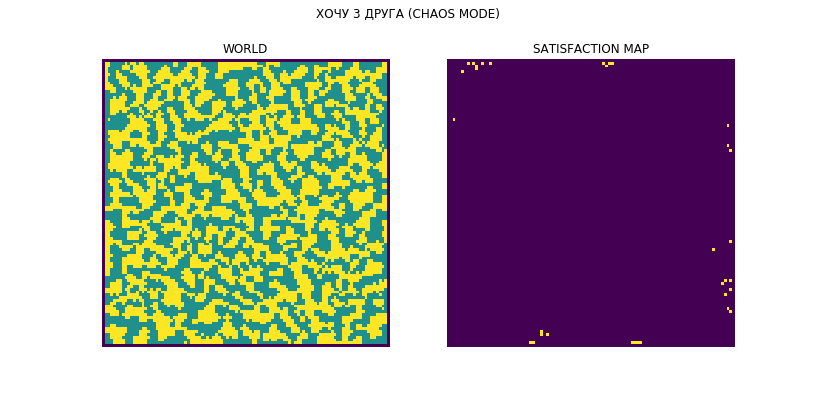
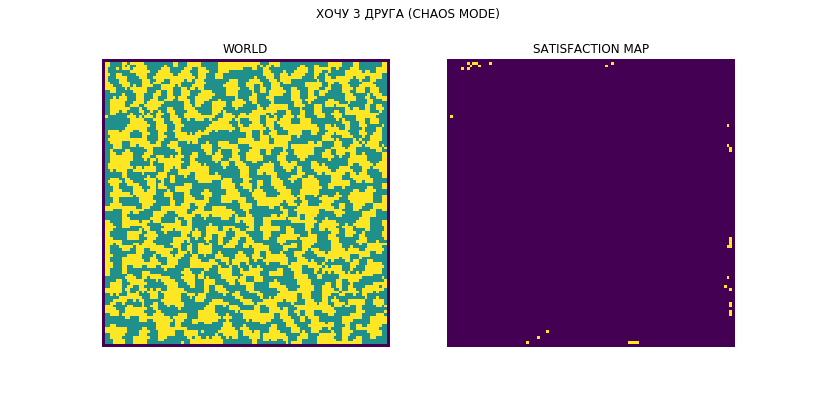
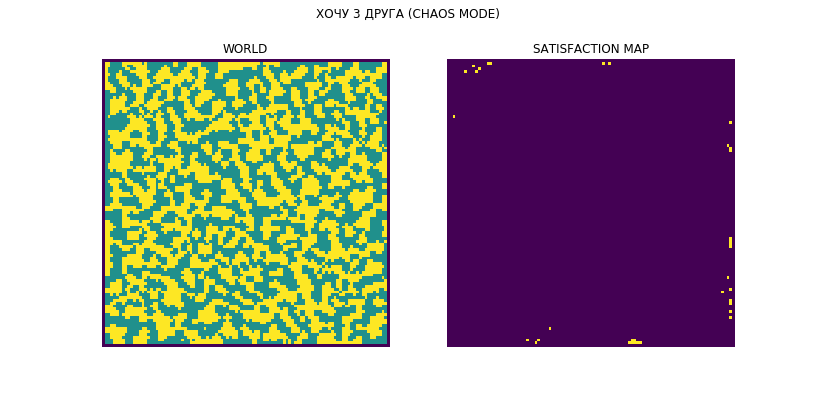
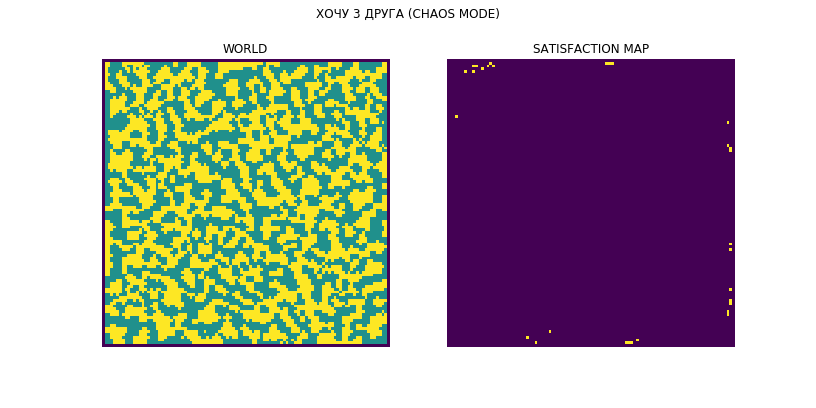

In [3]:
world = Chaos(SATISFACTION_THRESHOLD=3)
for _ in range(100):
    world.iteration()
show_frames("ХОЧУ 3 ДРУГА (CHAOS MODE)", world.world_map, world.dissatisfied_map)

А вот начиная с четырёх стабилизация, кажется, за горами... Отображается каждый 100-ый кадр.

100%|████████████████████████████████████| 10000/10000 [04:08<00:00, 40.24it/s]



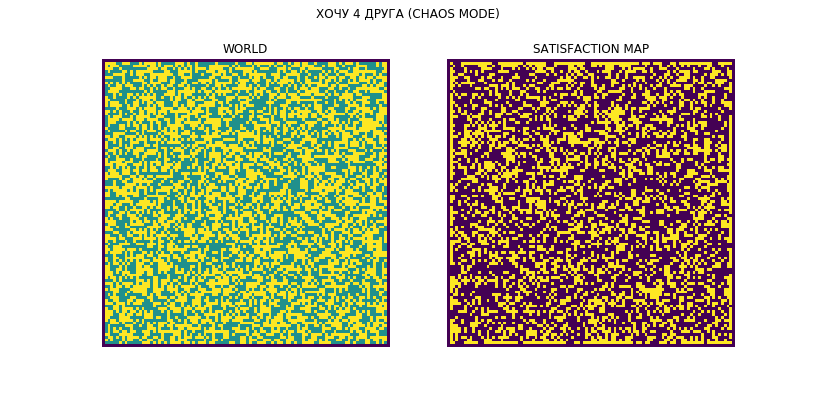
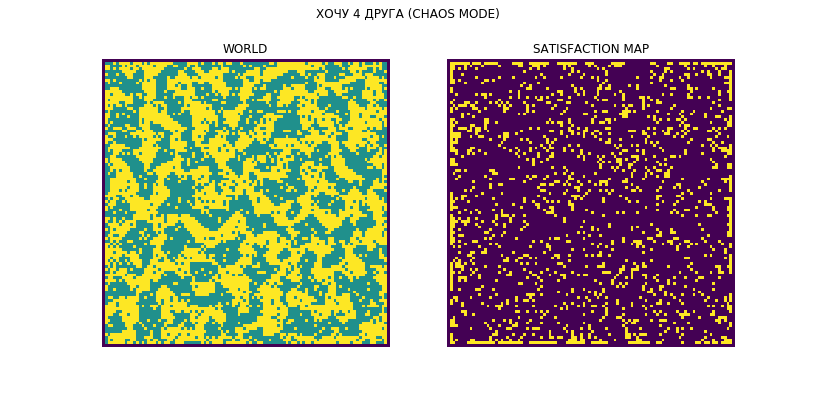
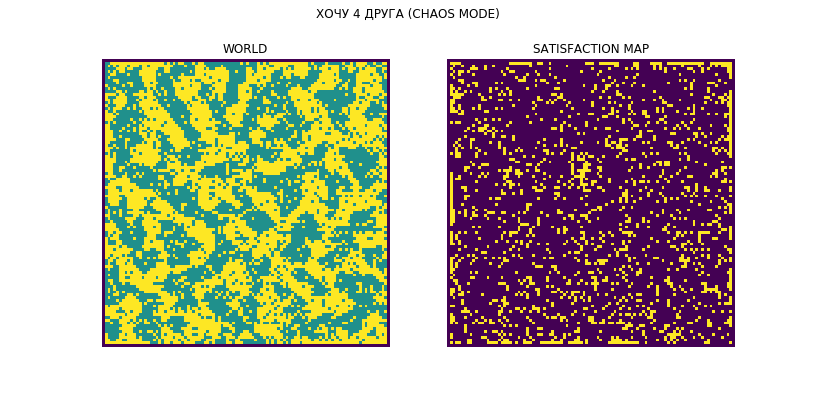
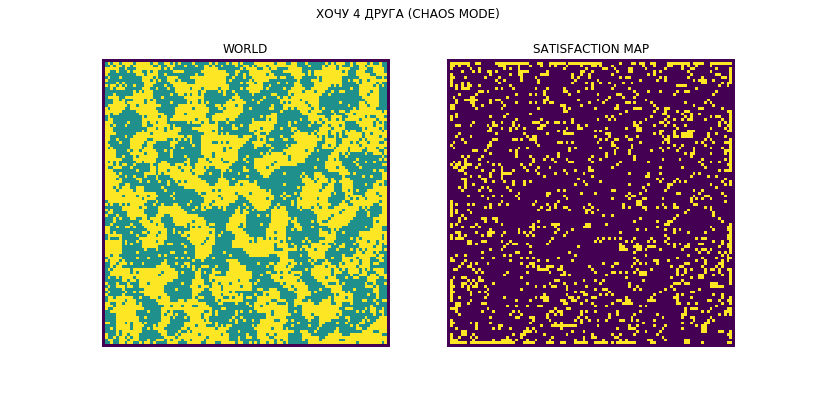
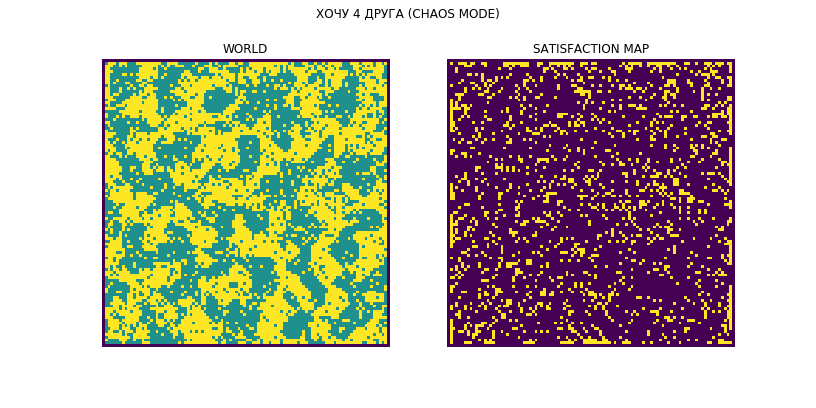
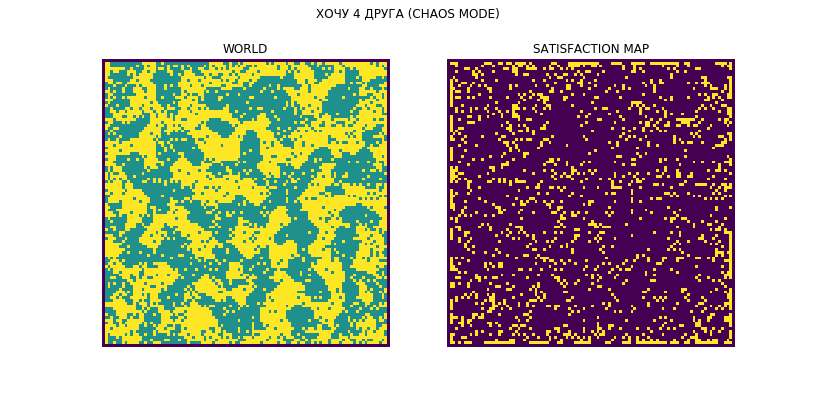
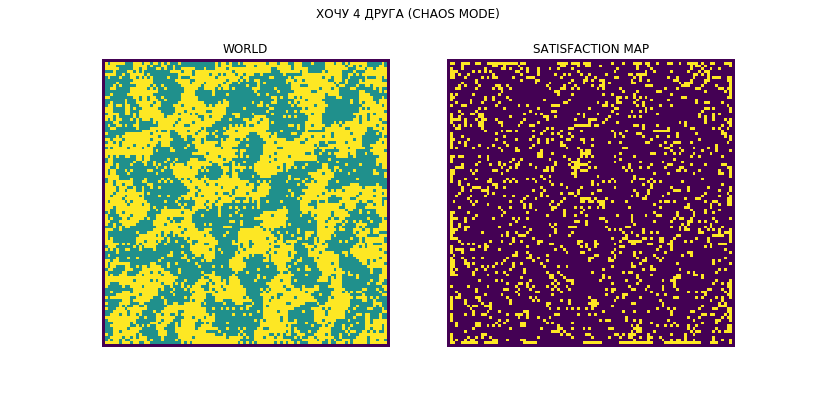
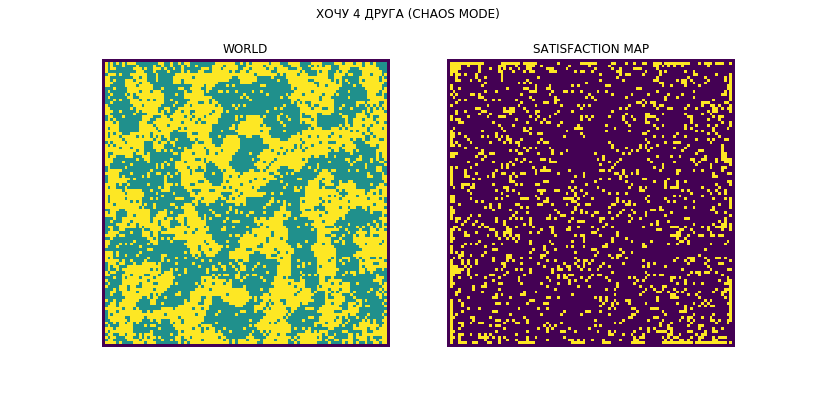
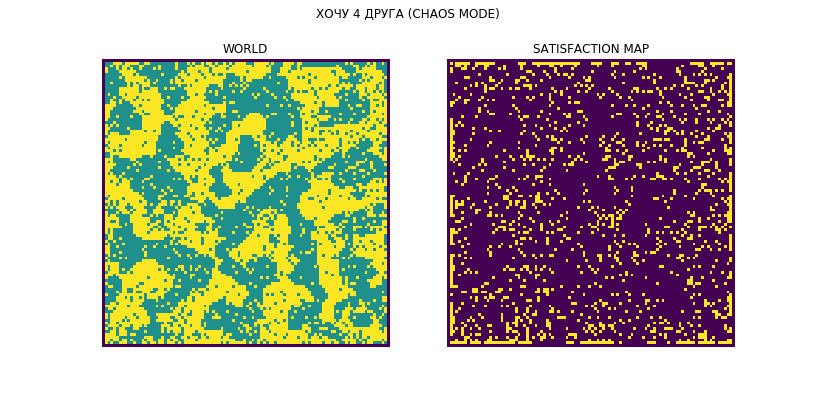
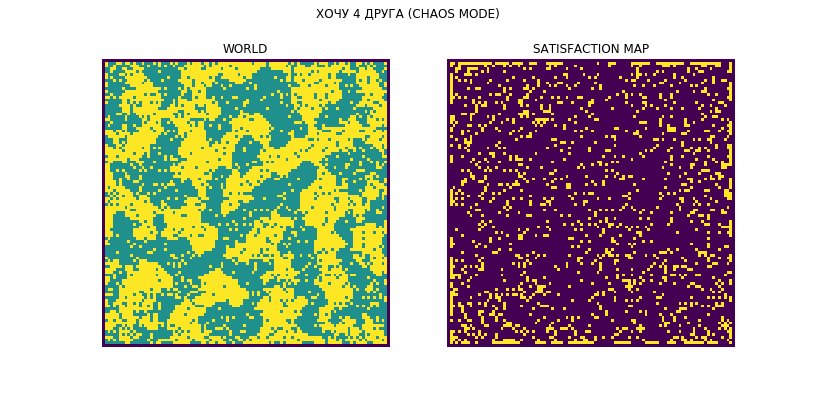
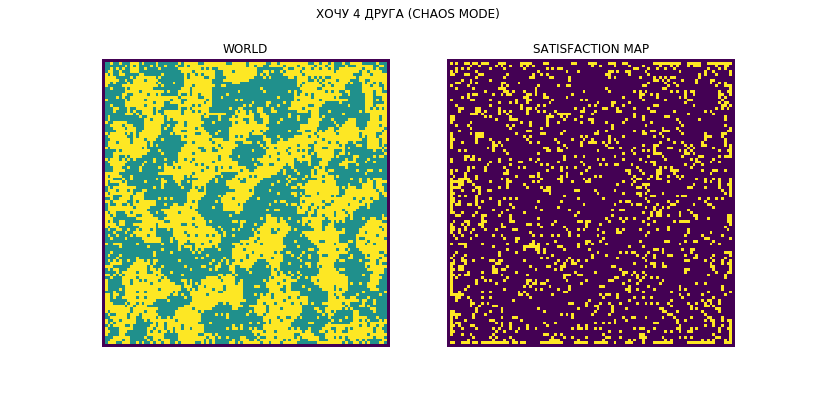
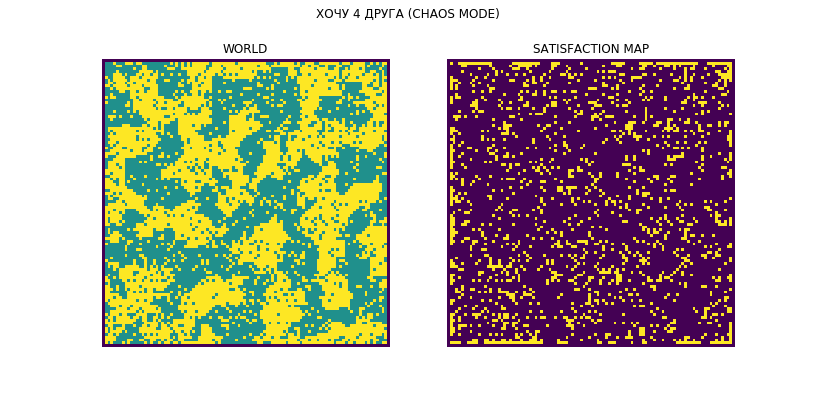
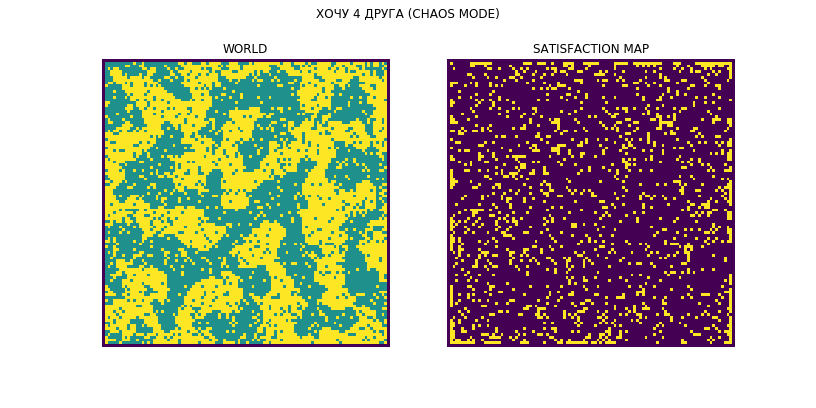
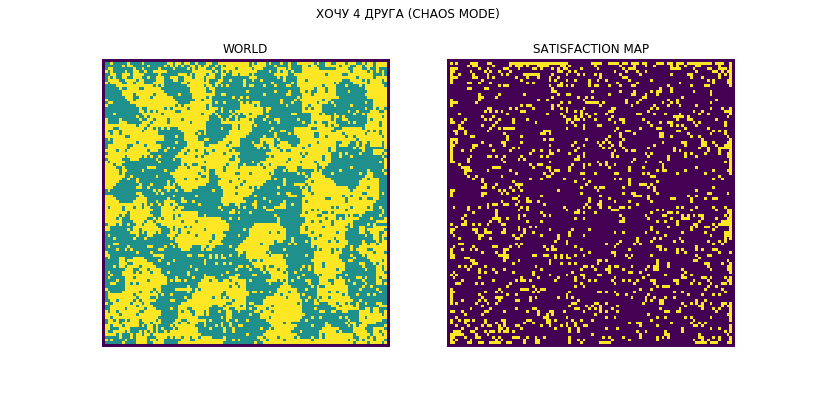
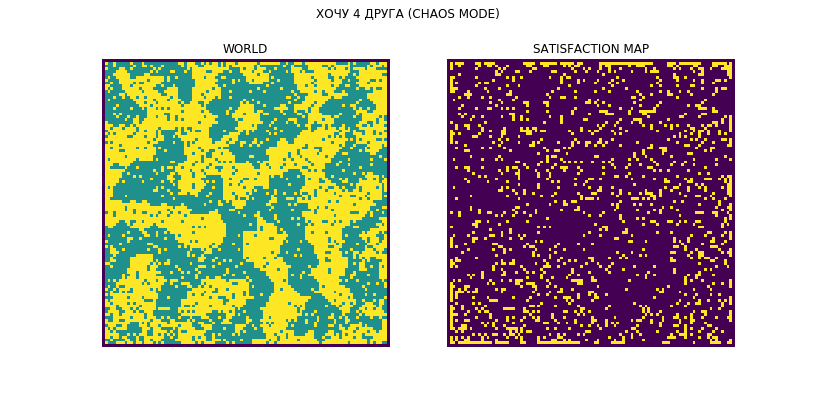
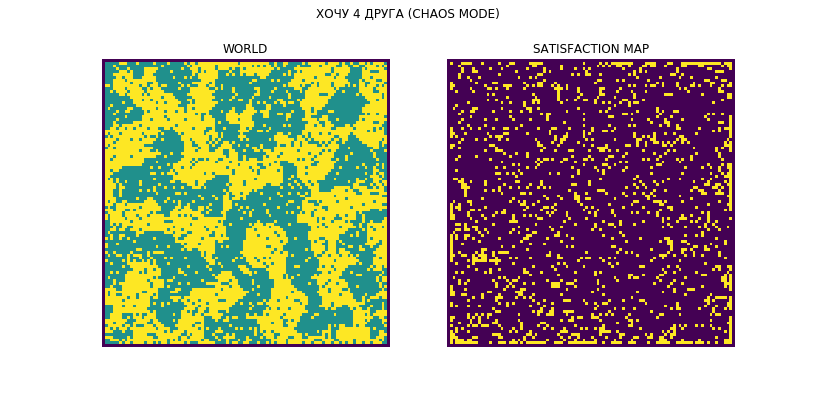
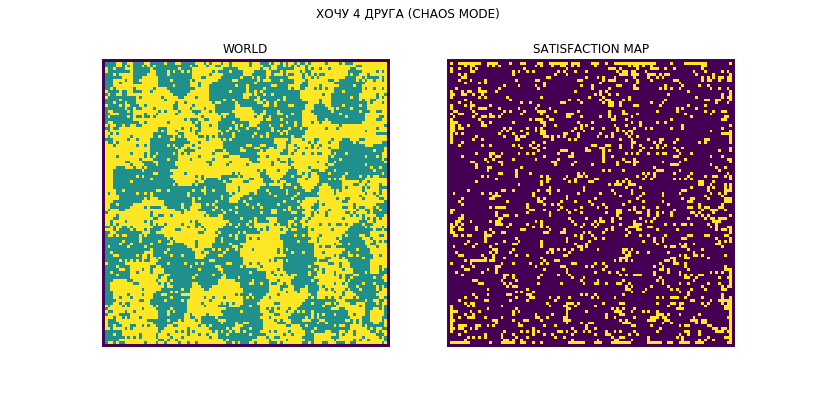
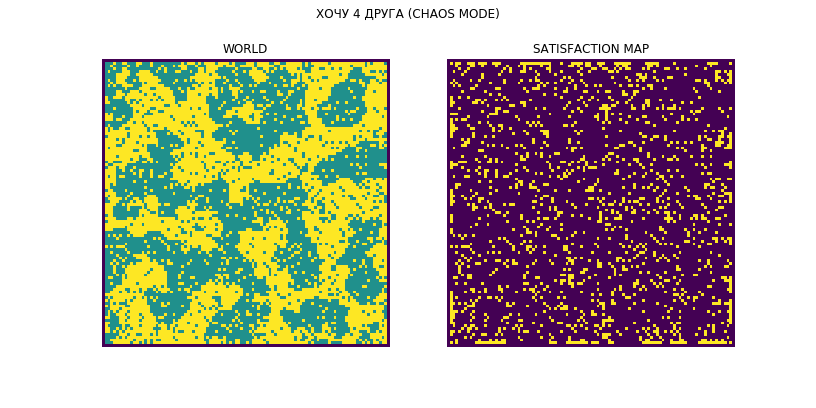
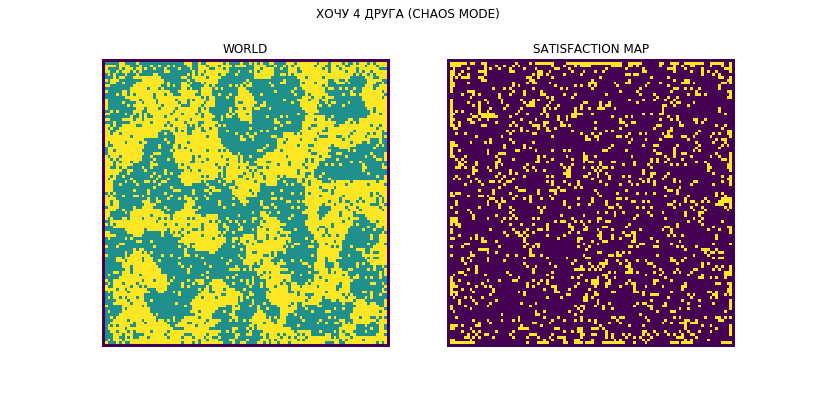
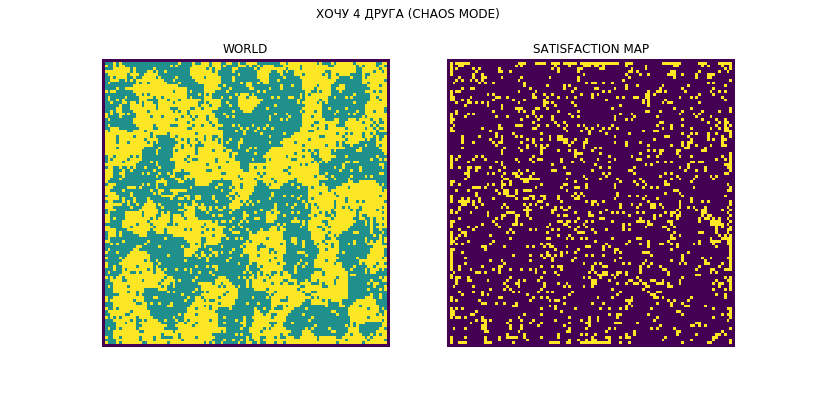
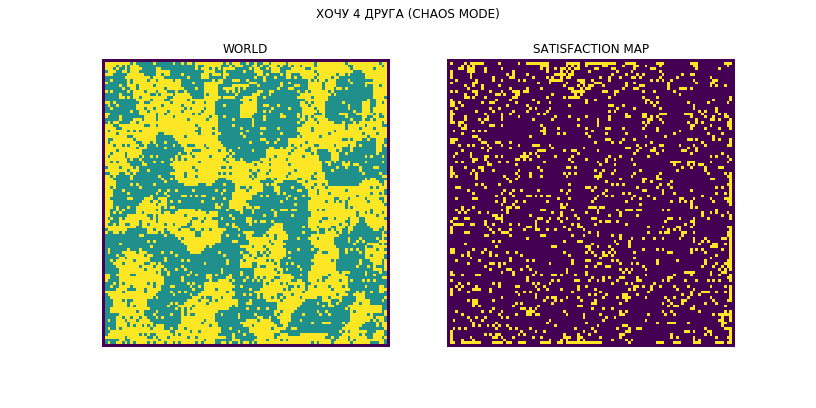
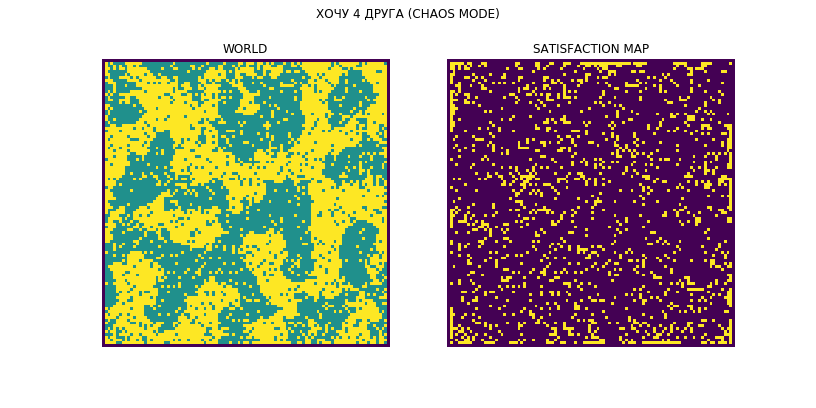
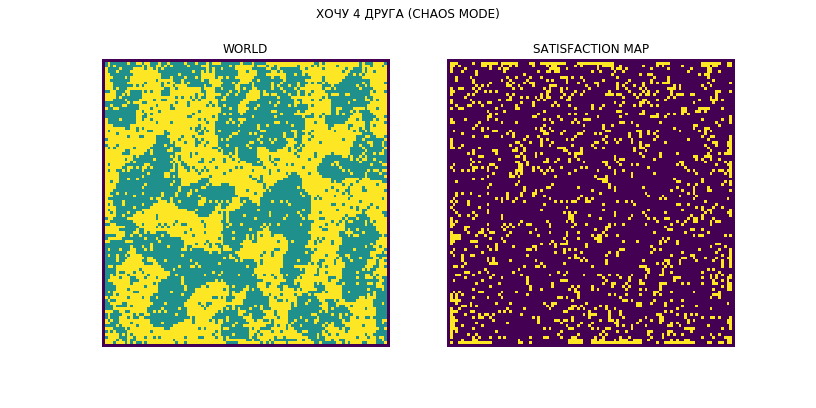
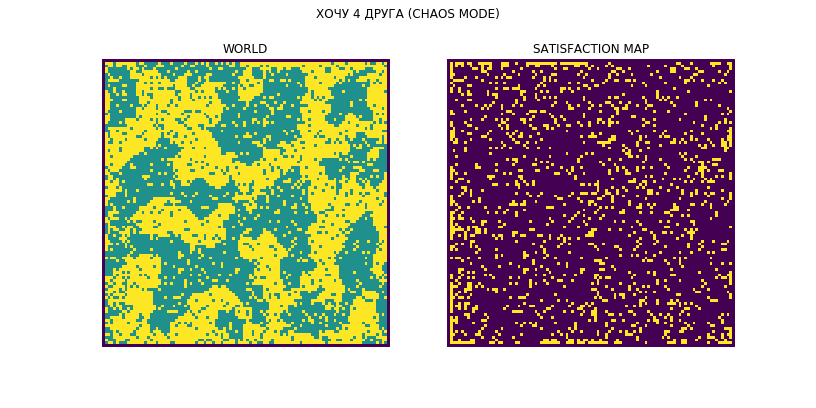
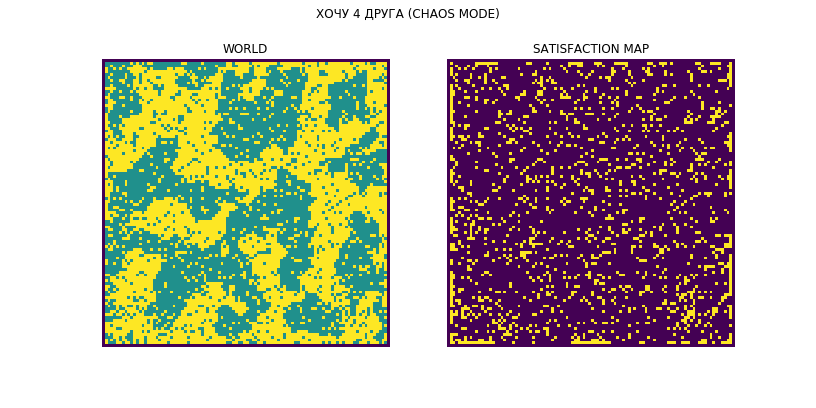
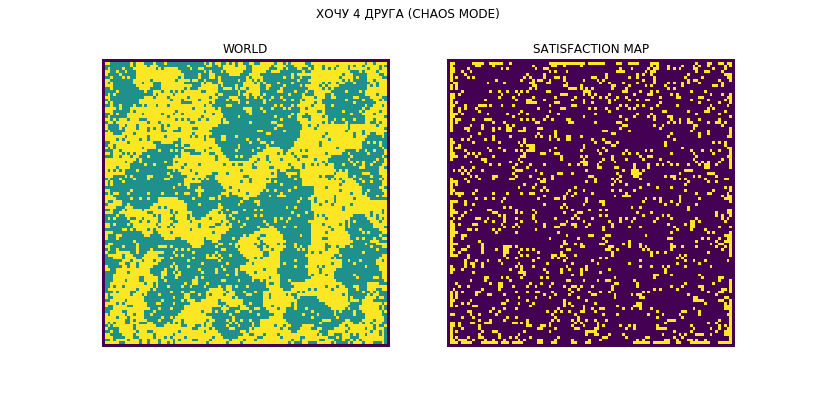
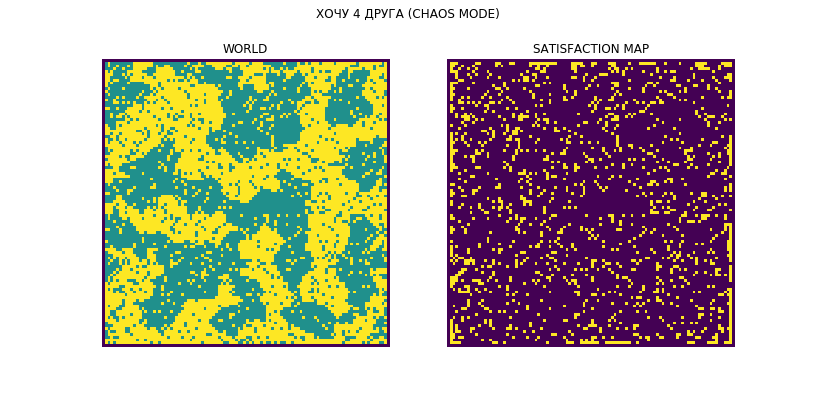
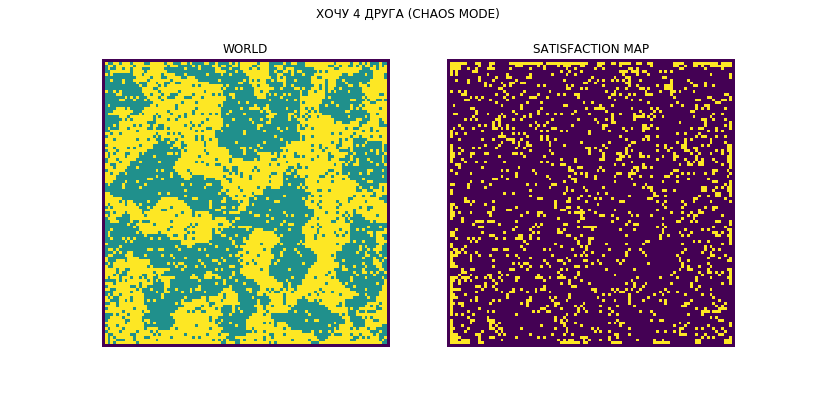
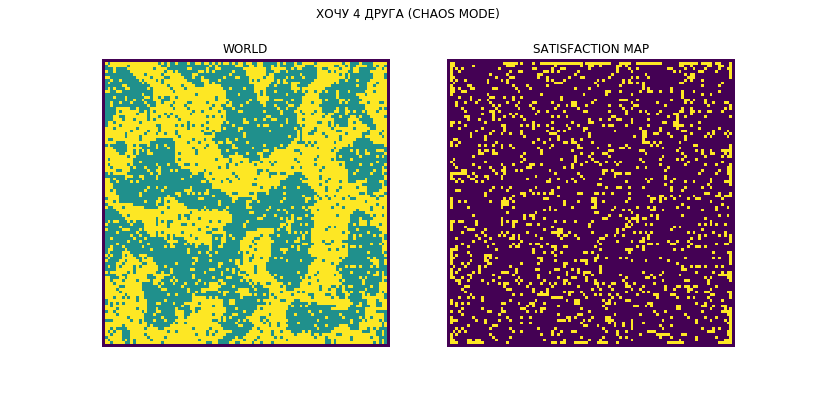
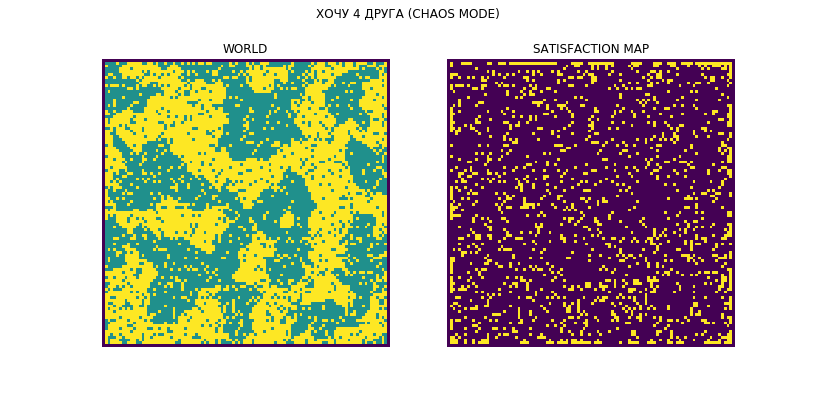
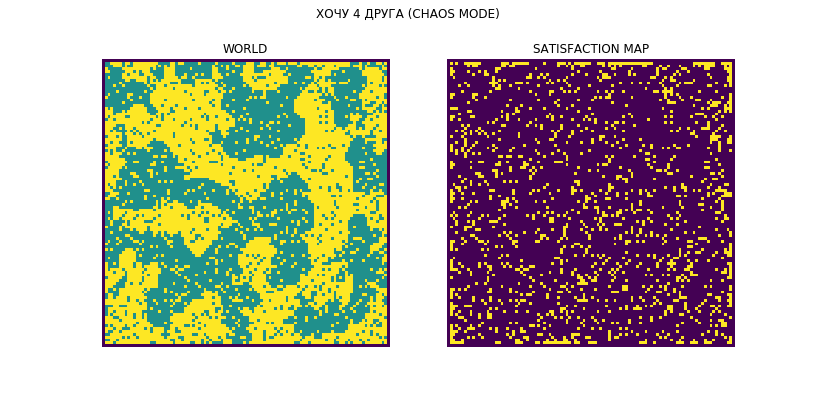
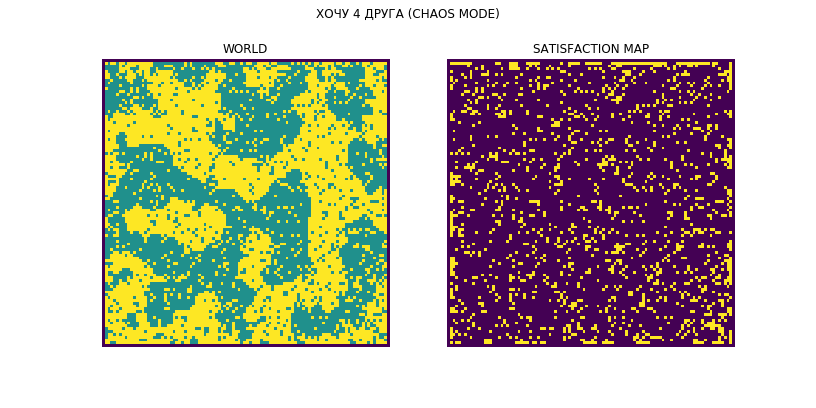
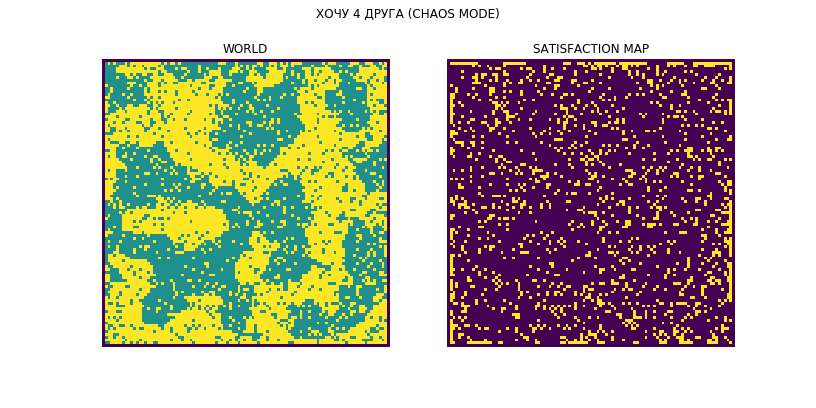
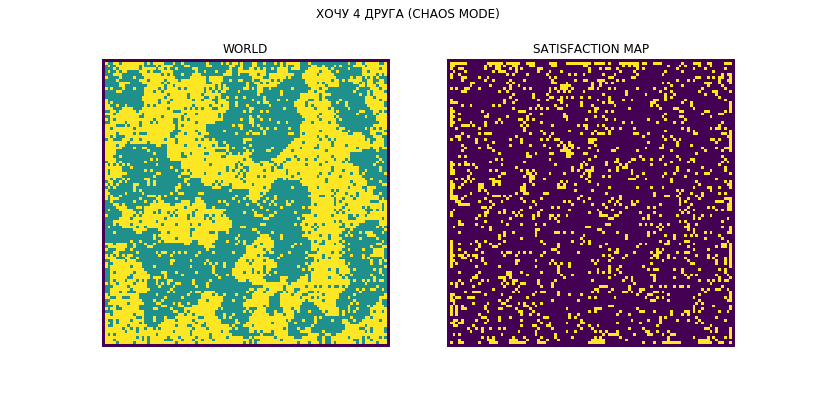
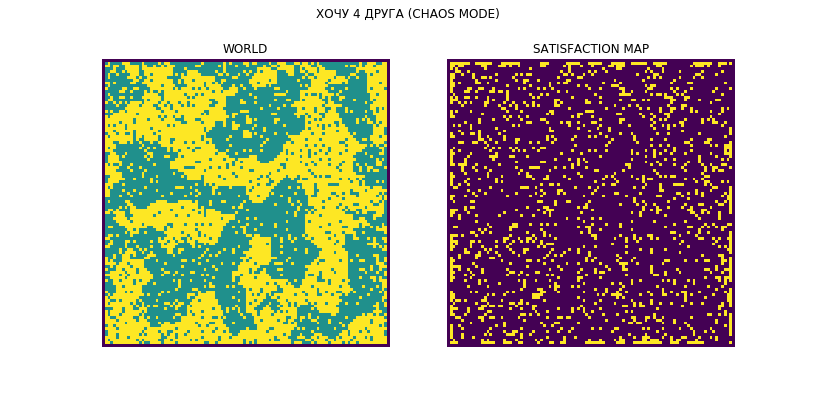
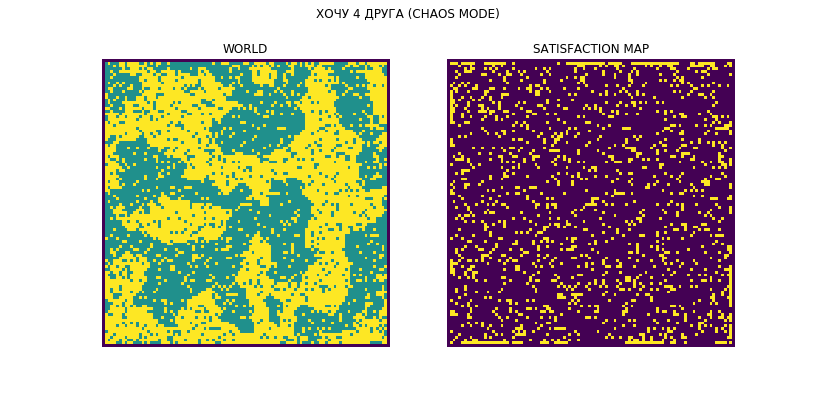
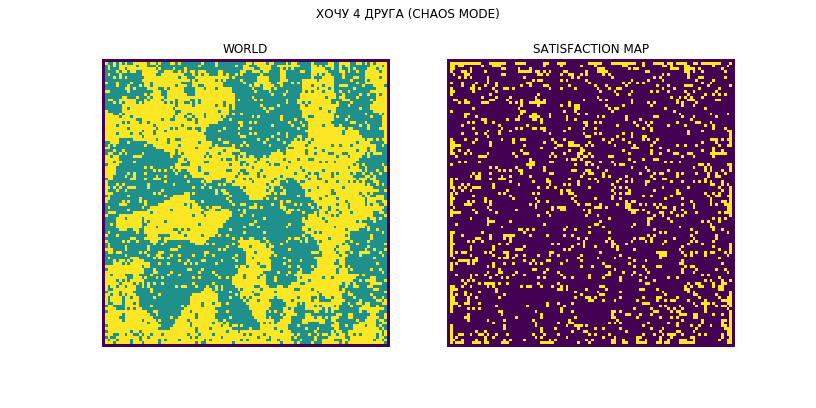
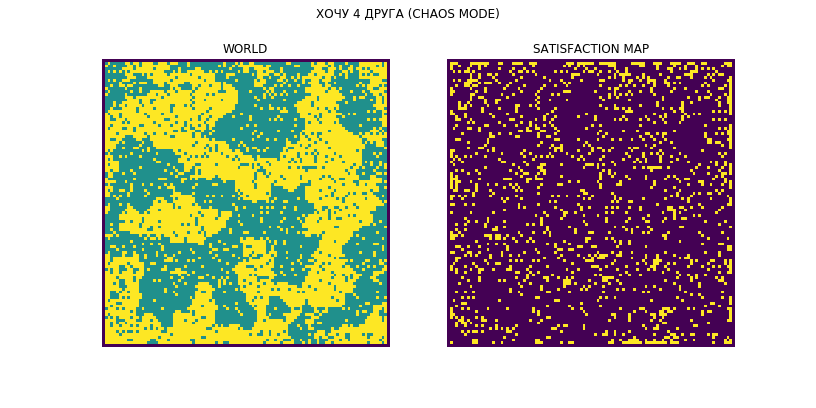
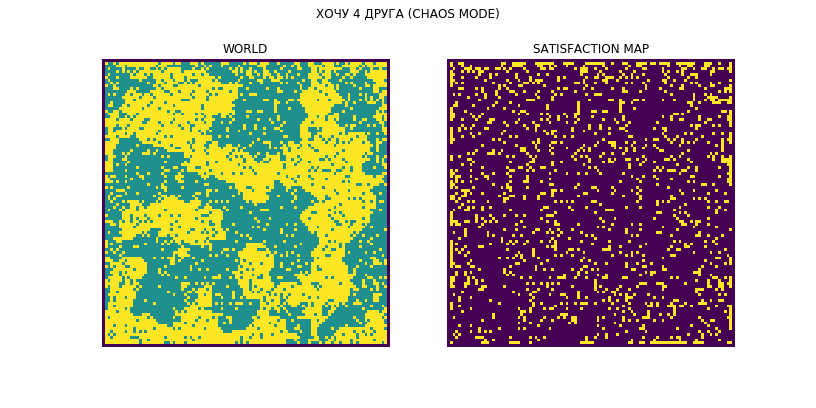
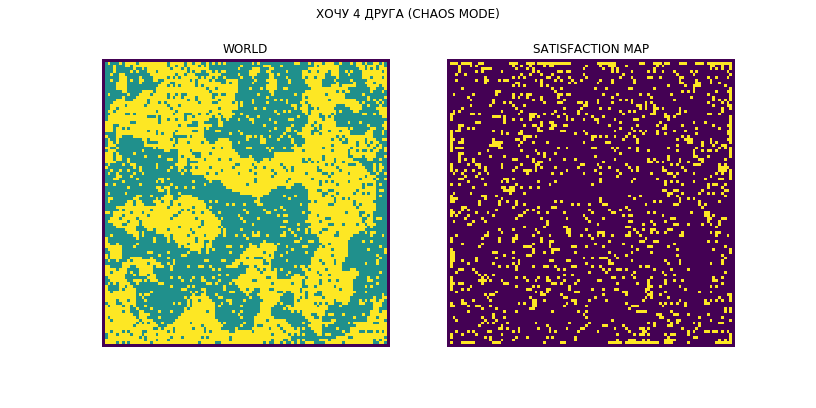
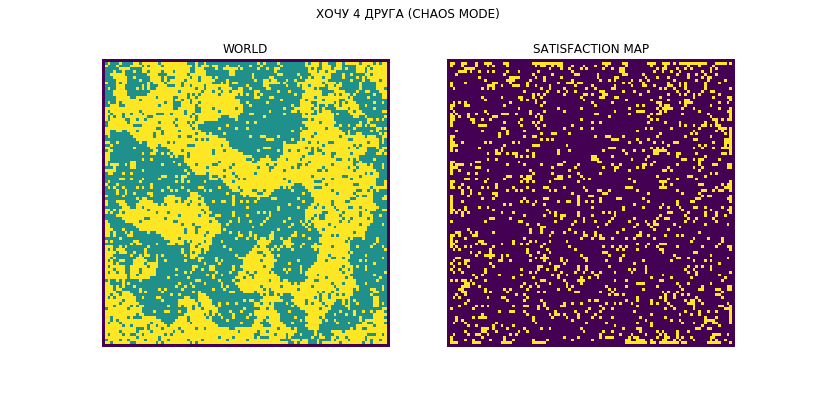
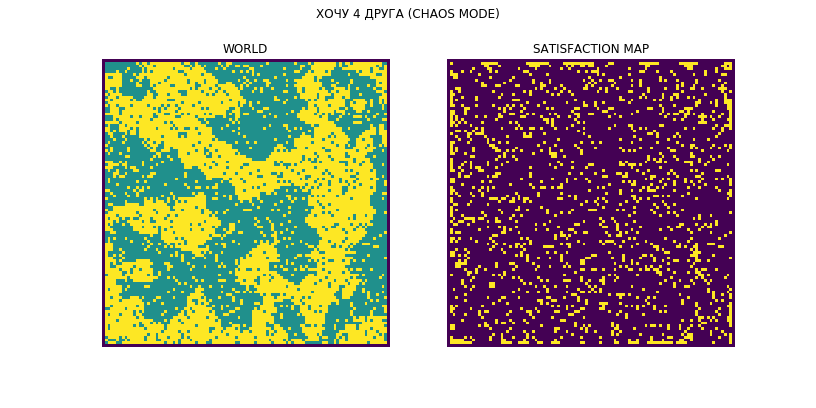
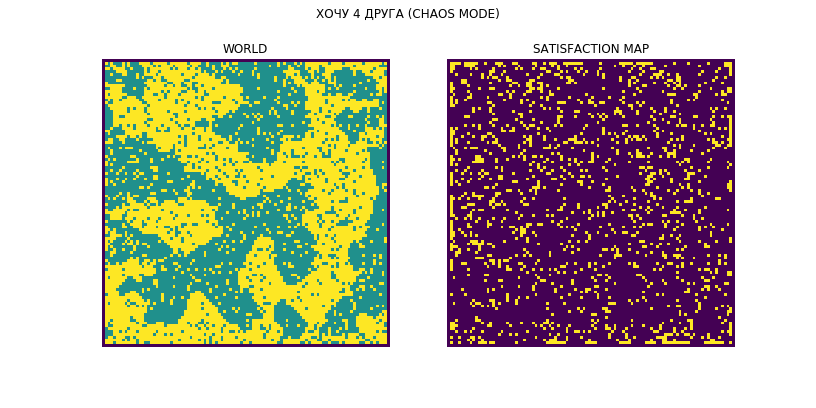
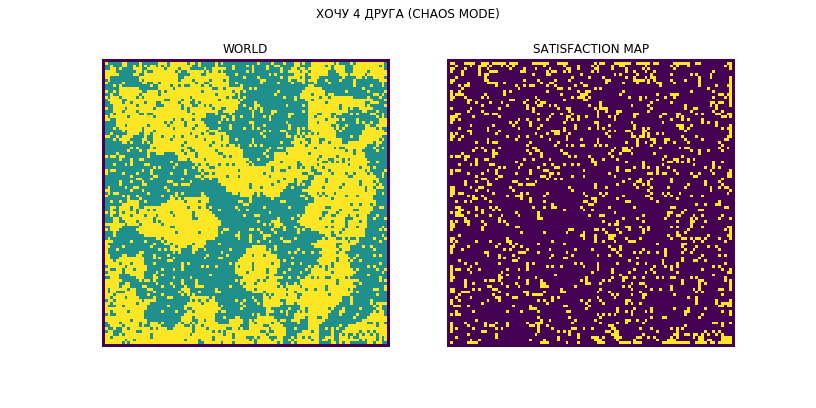
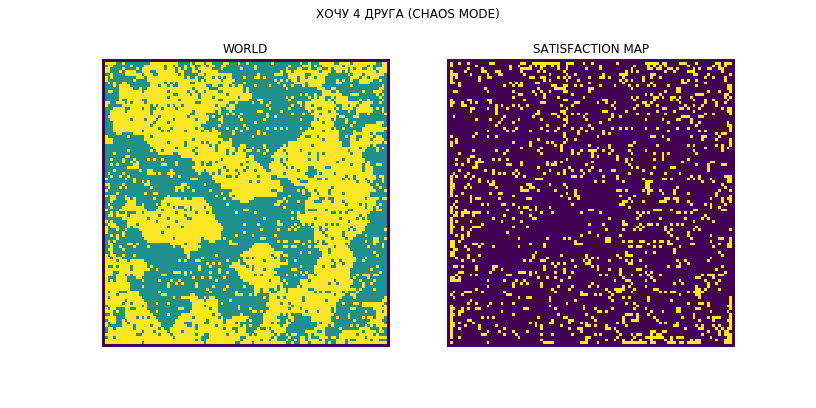
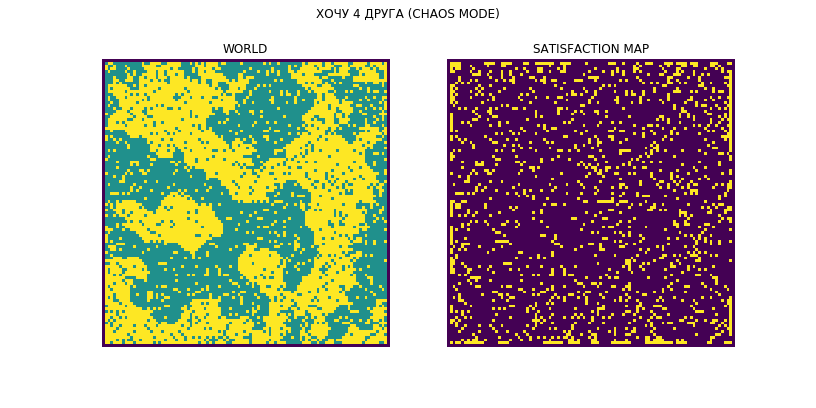
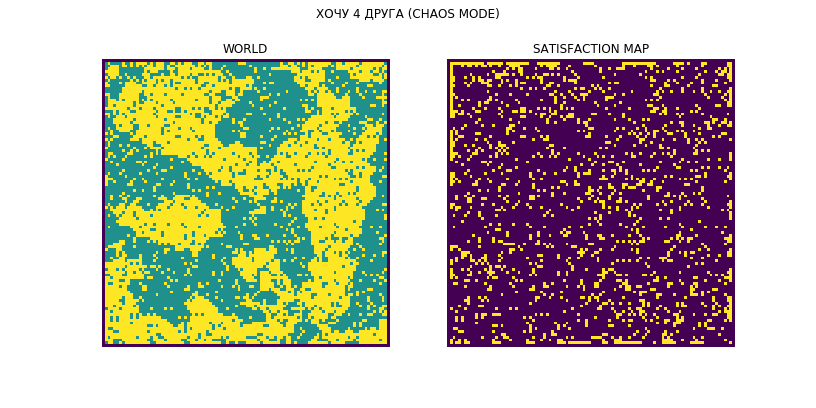
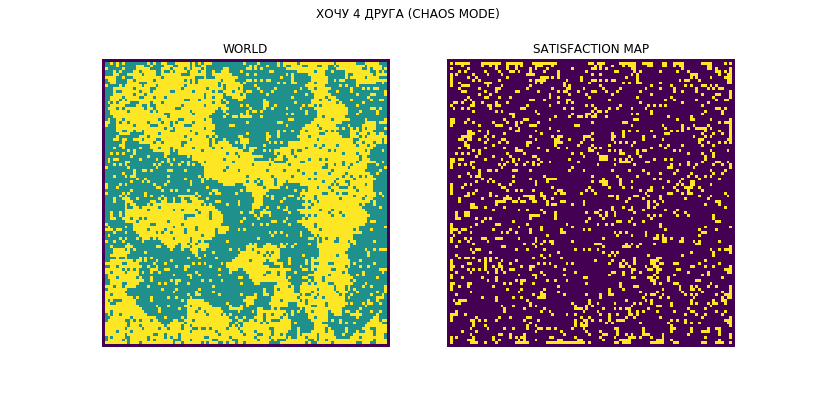
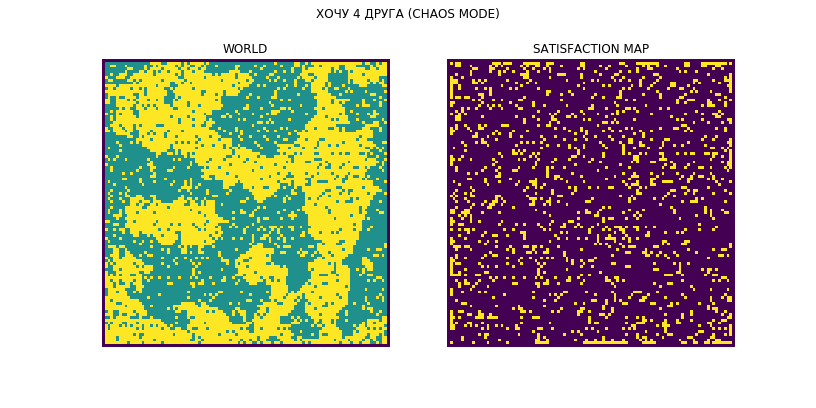
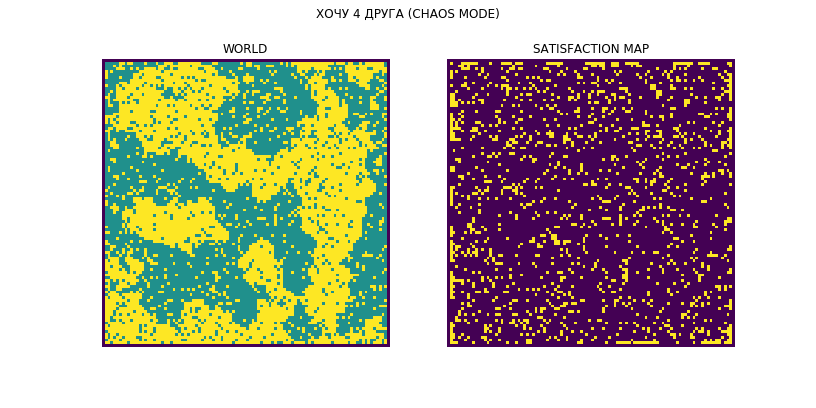
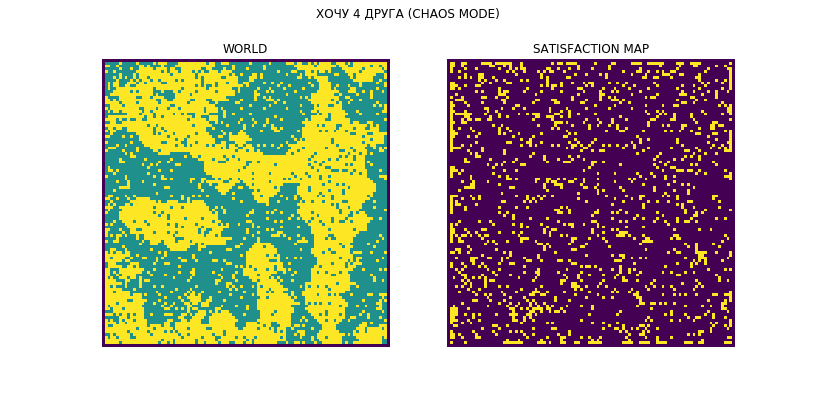
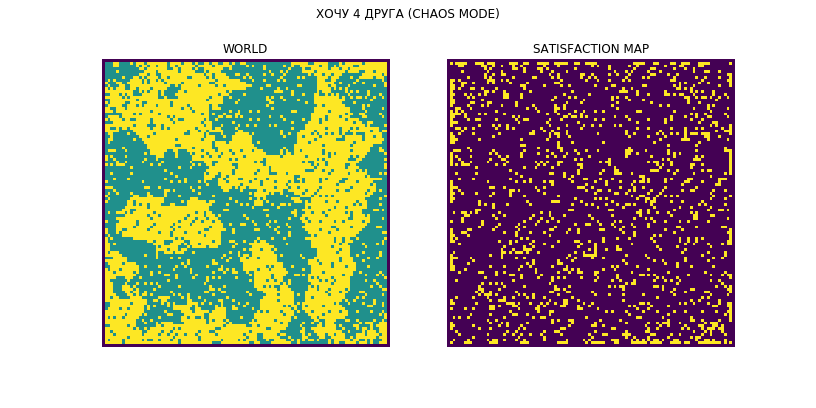
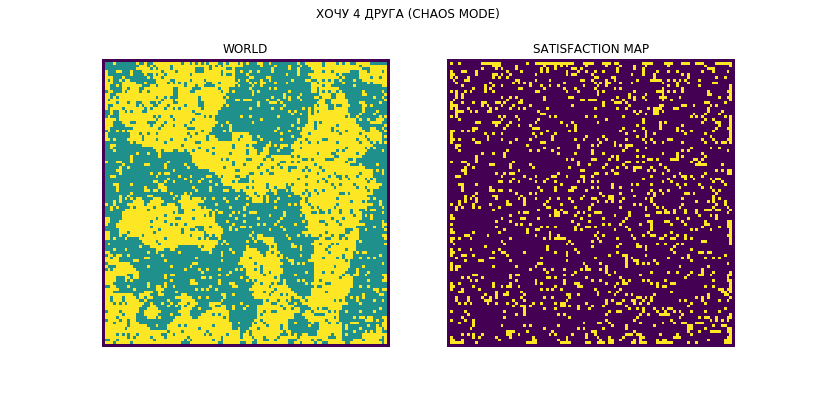
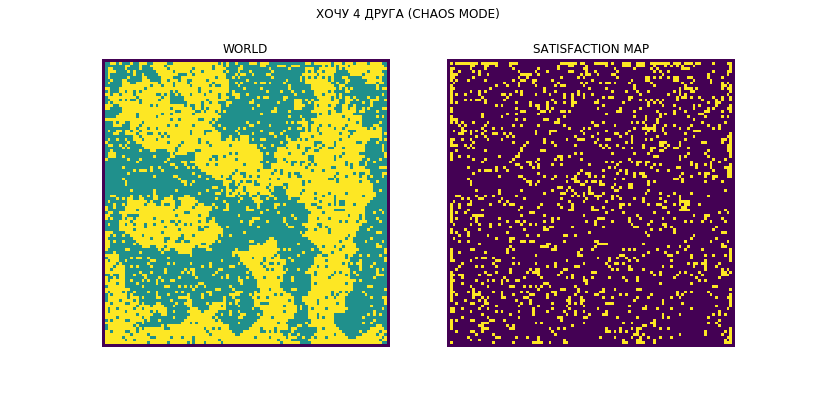
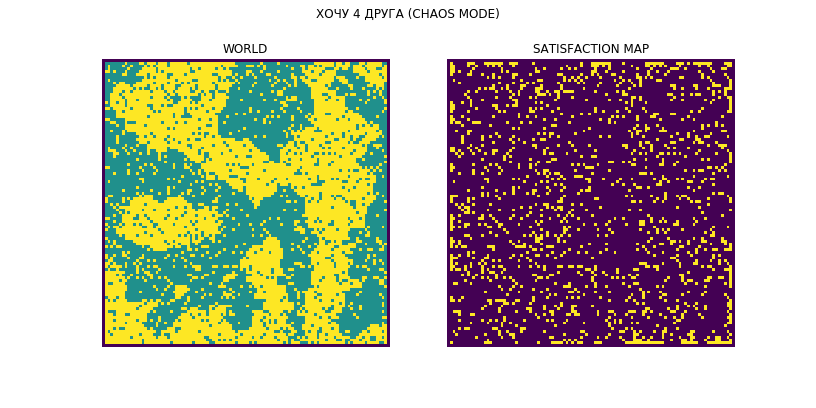
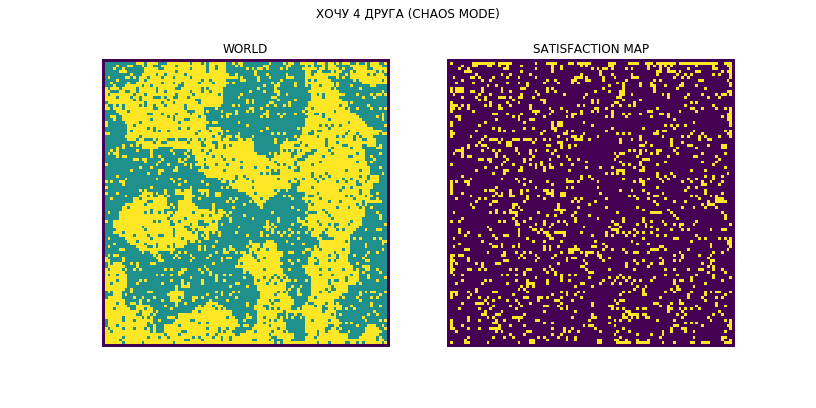
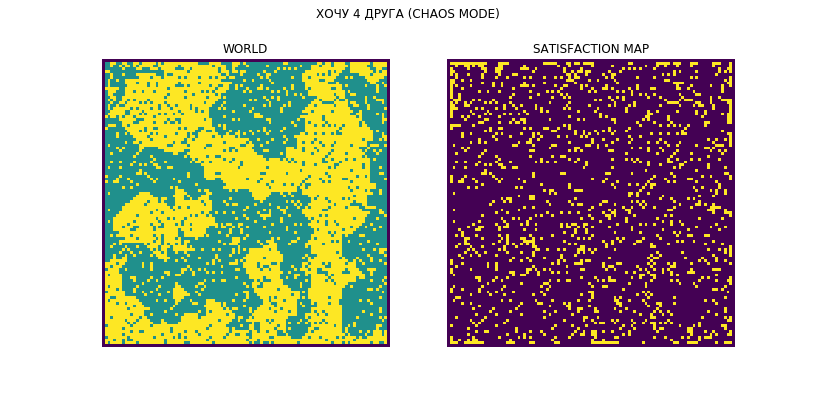
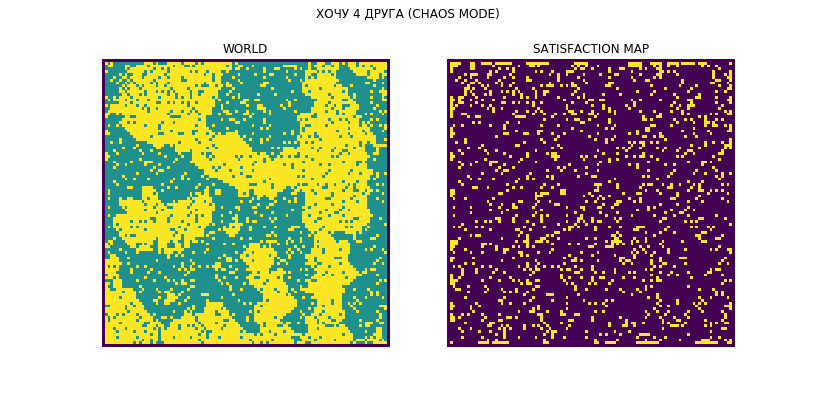
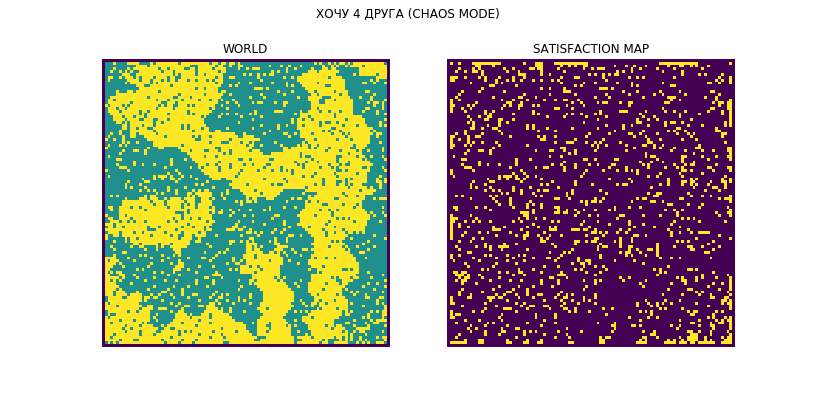
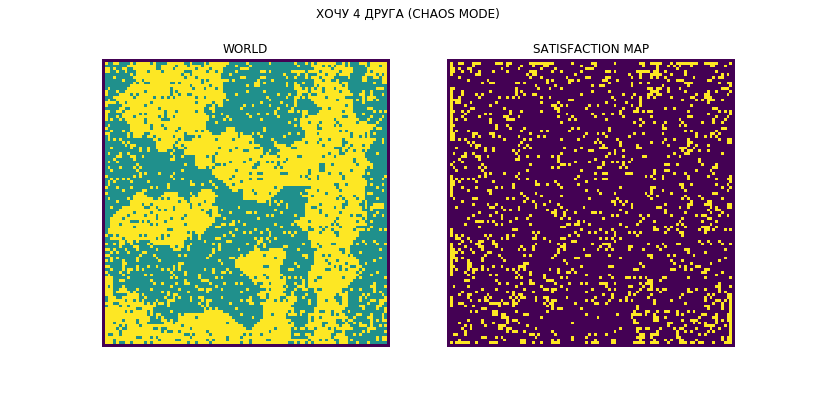
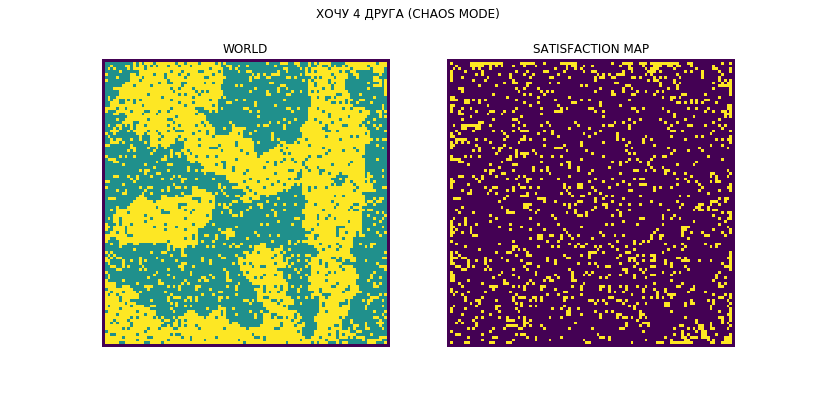
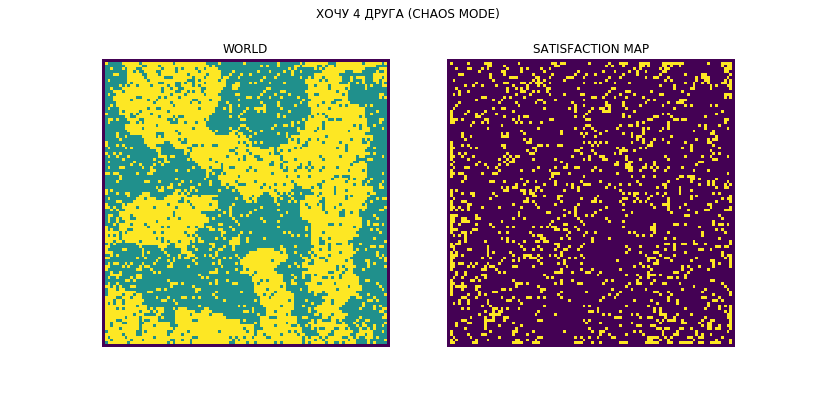
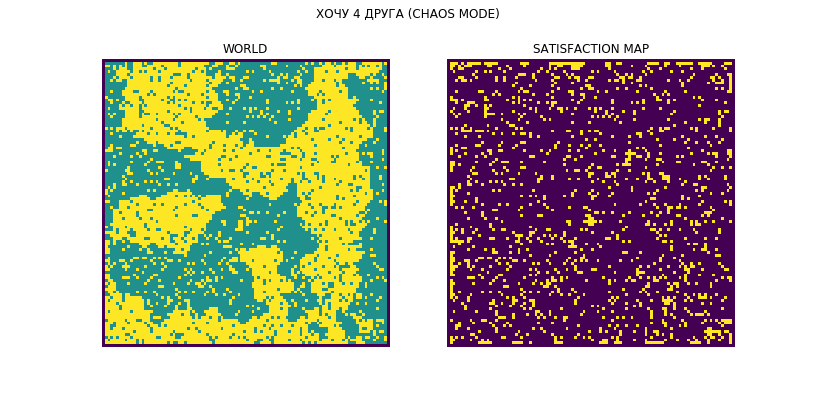
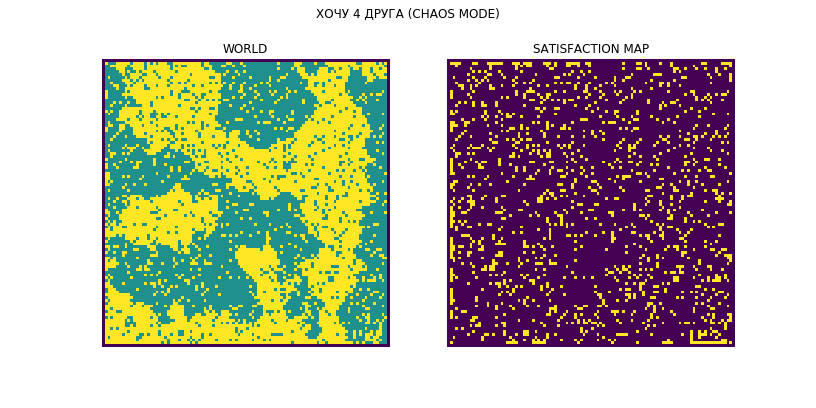
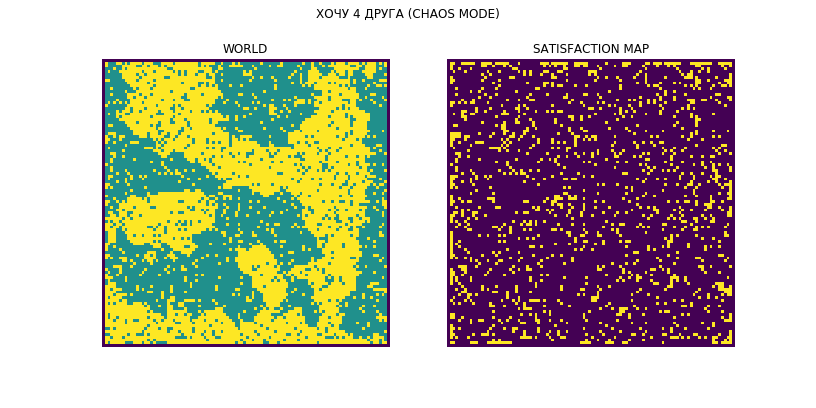
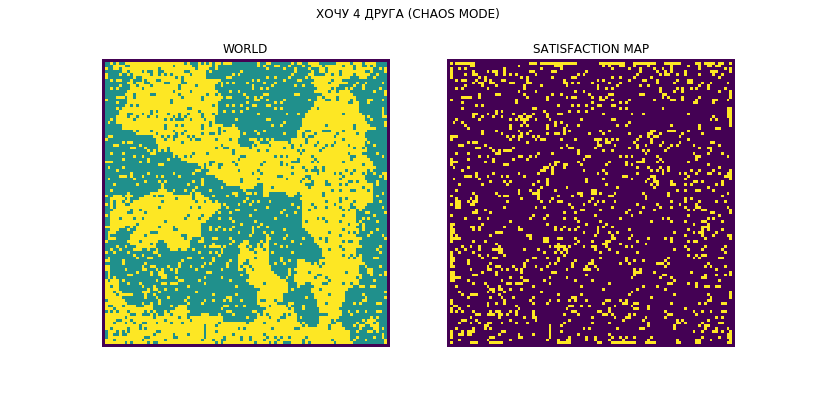
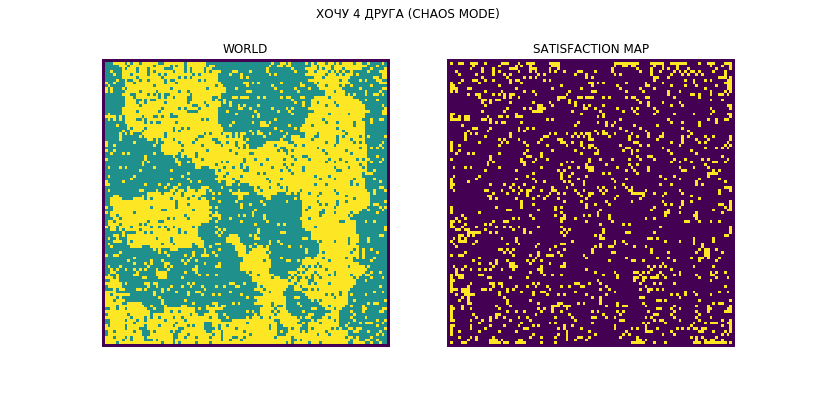
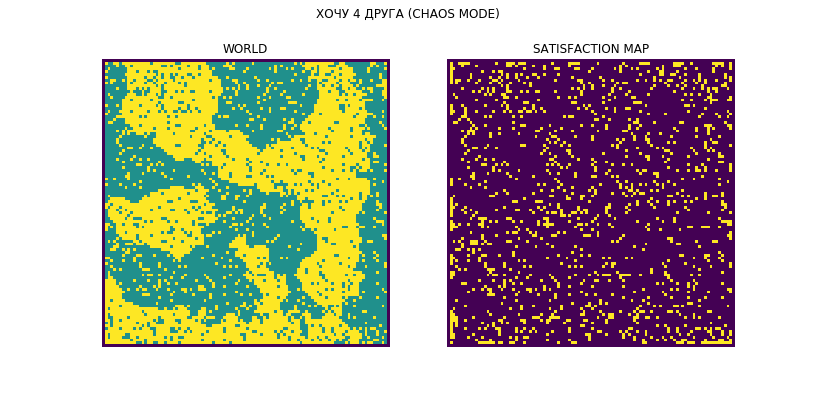
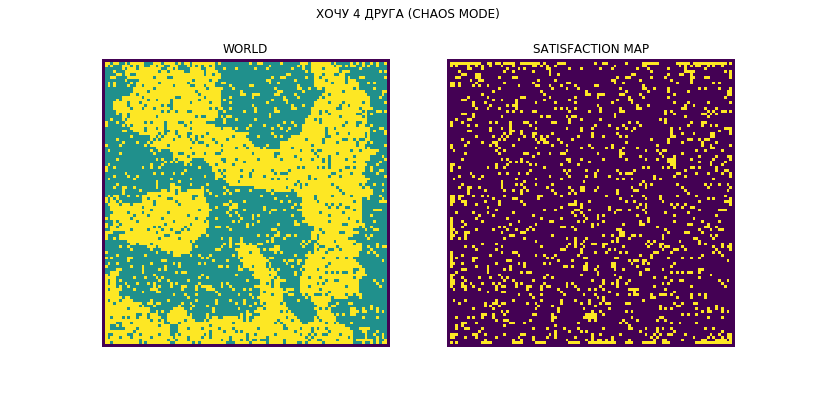
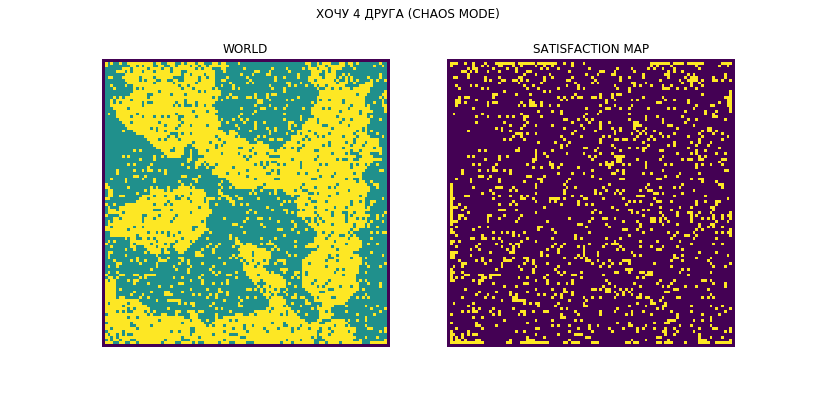
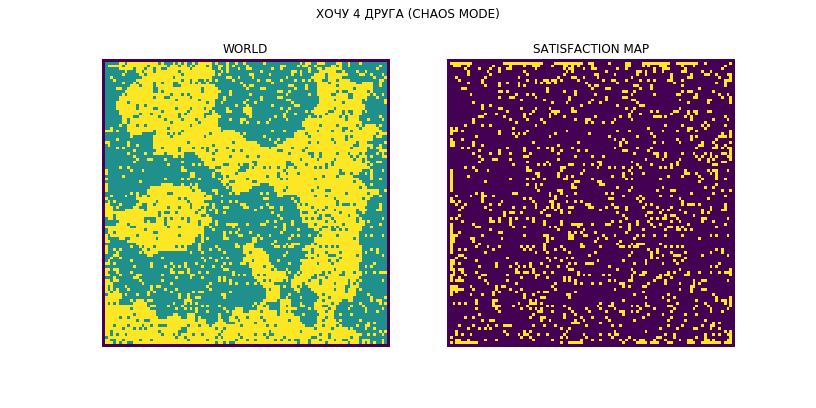
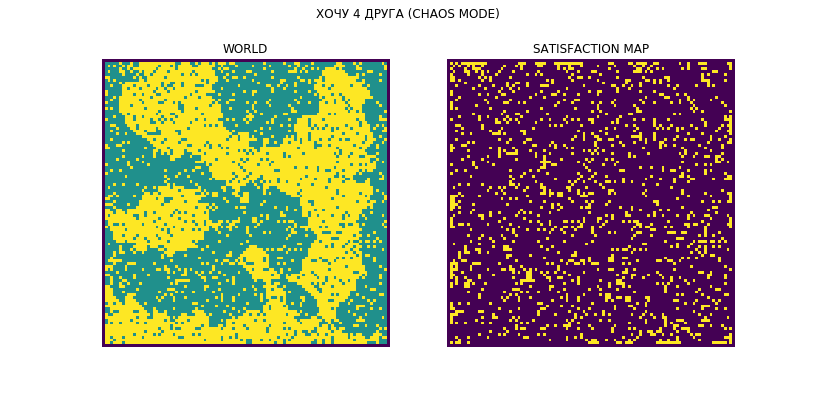
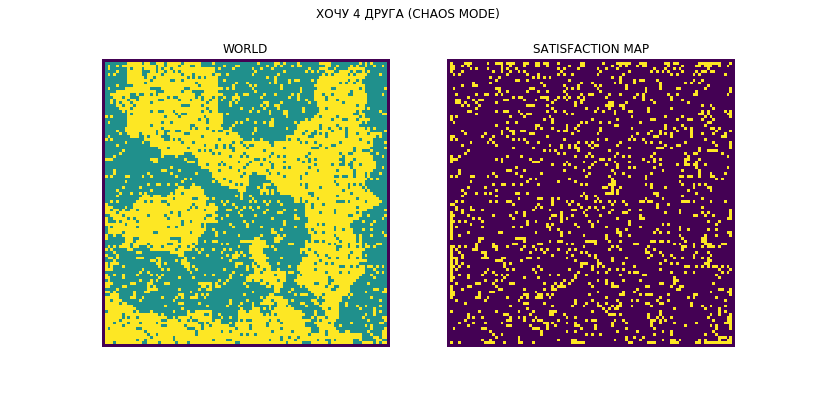
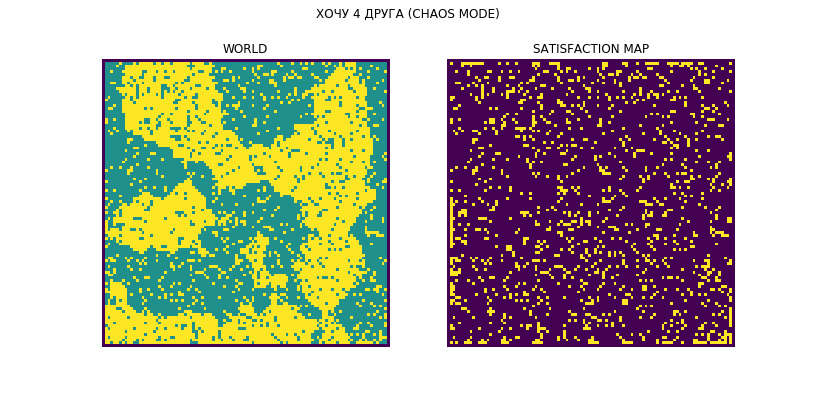
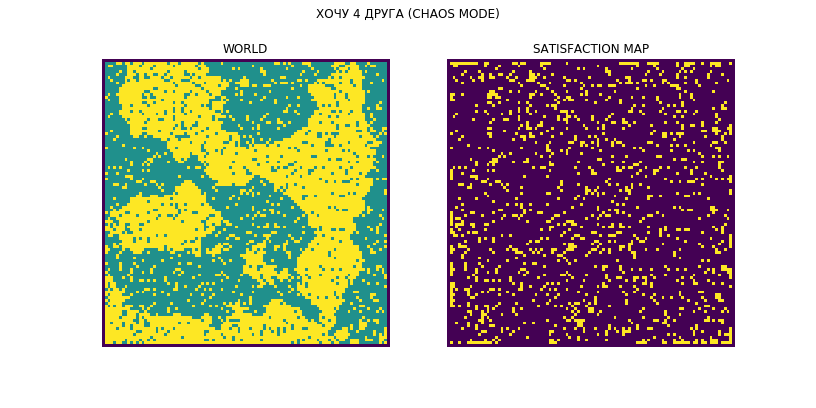
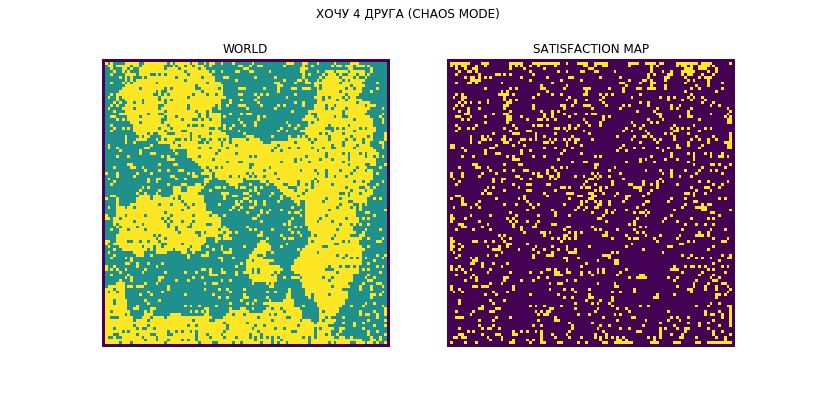
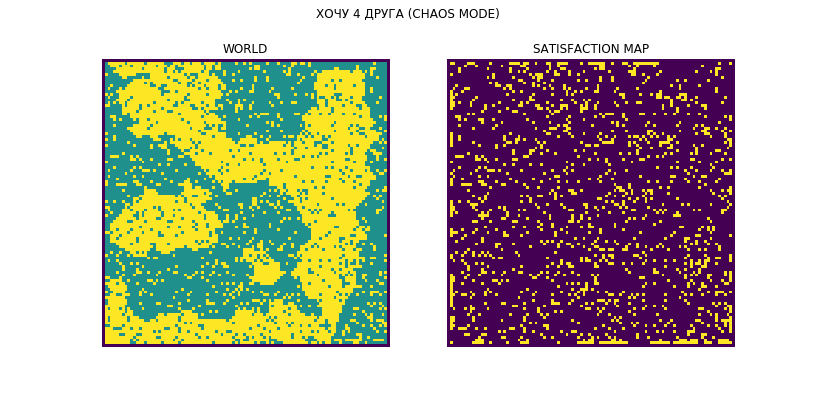
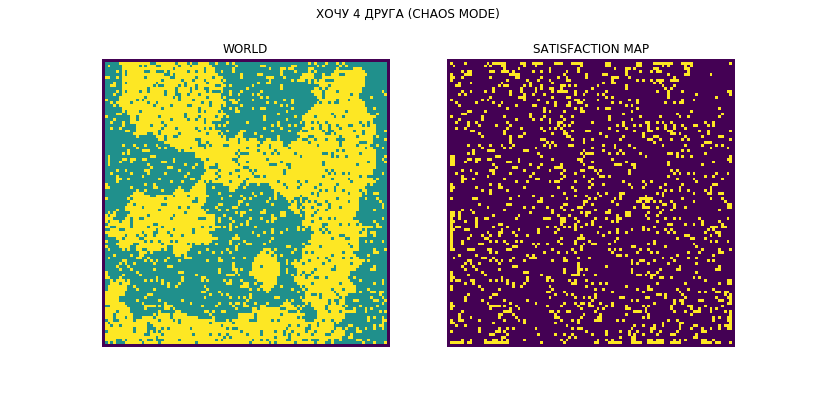
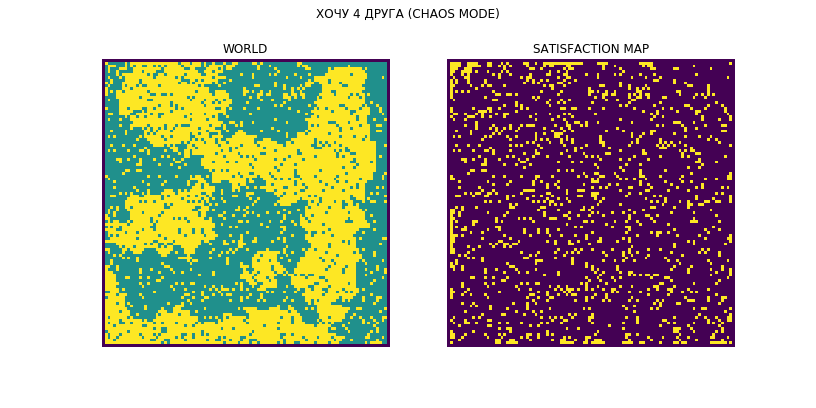
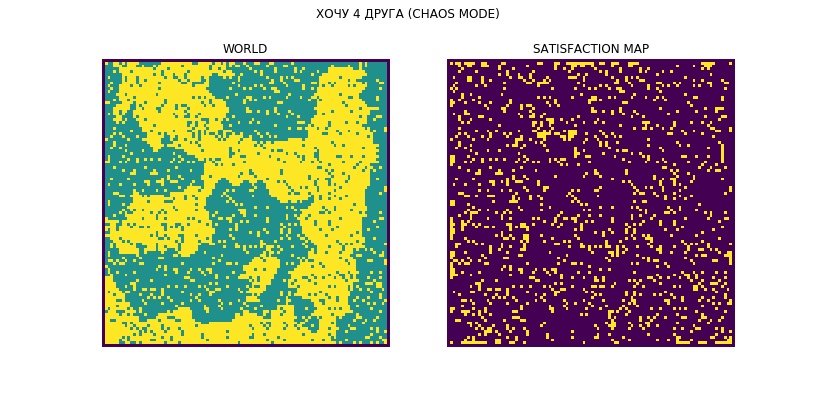
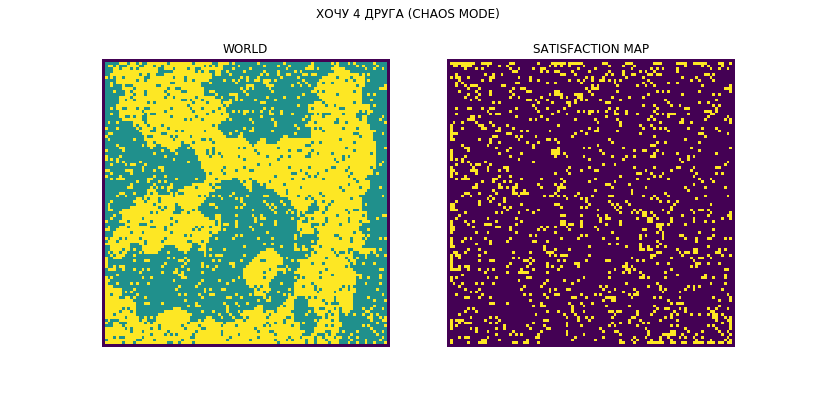
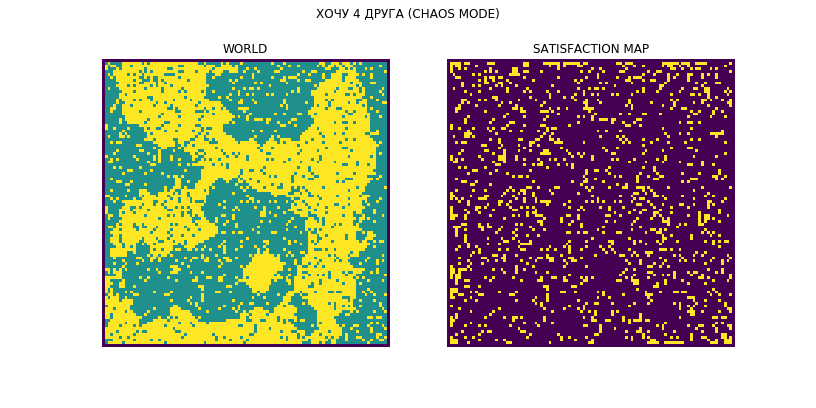
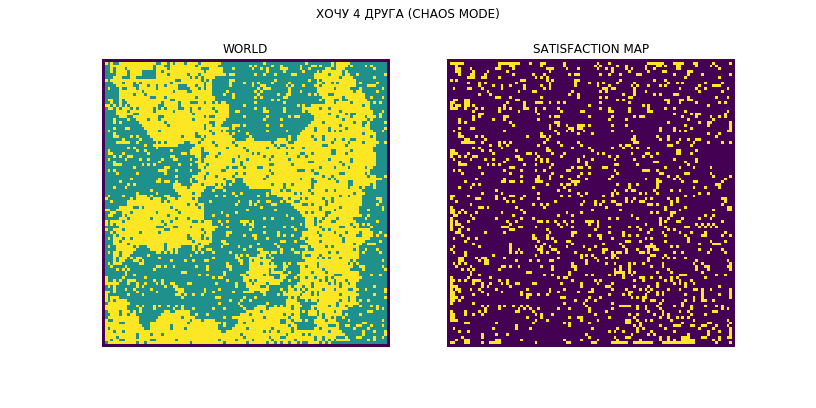
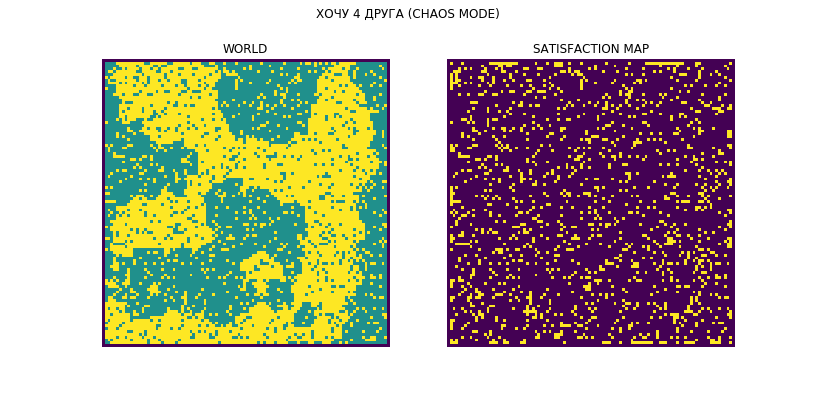
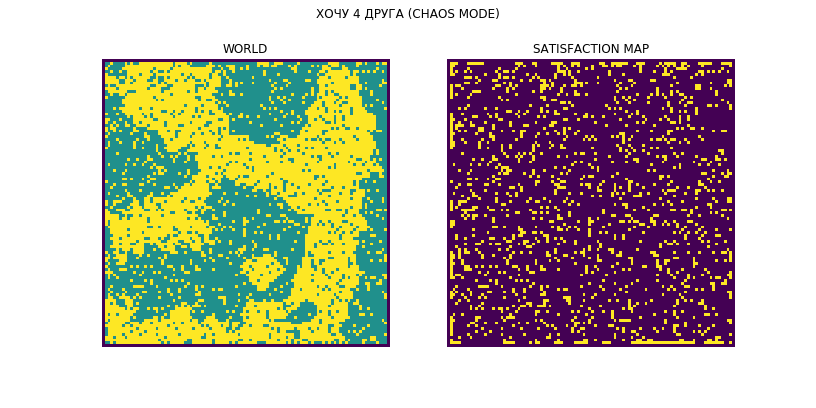
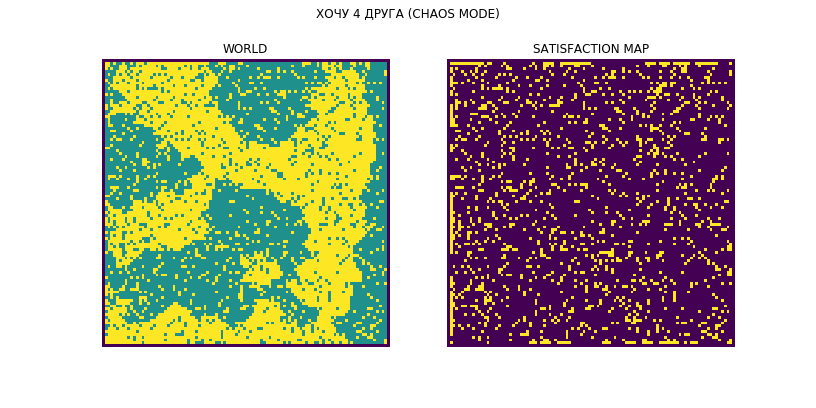
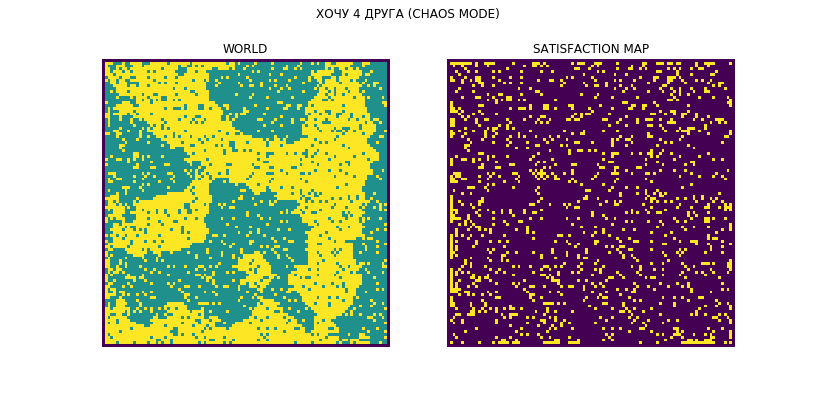
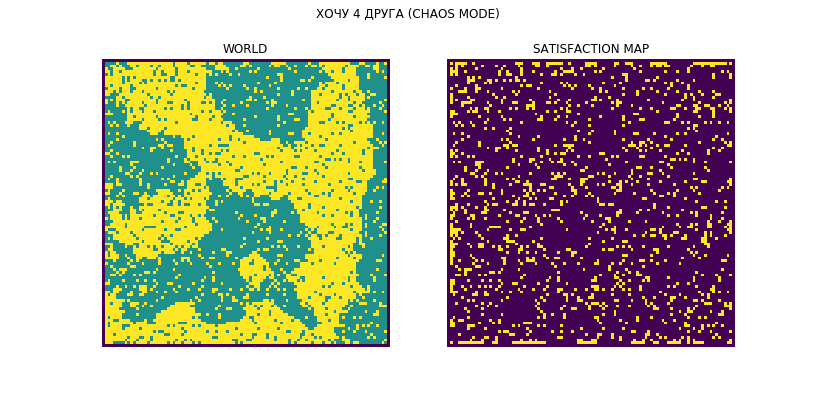
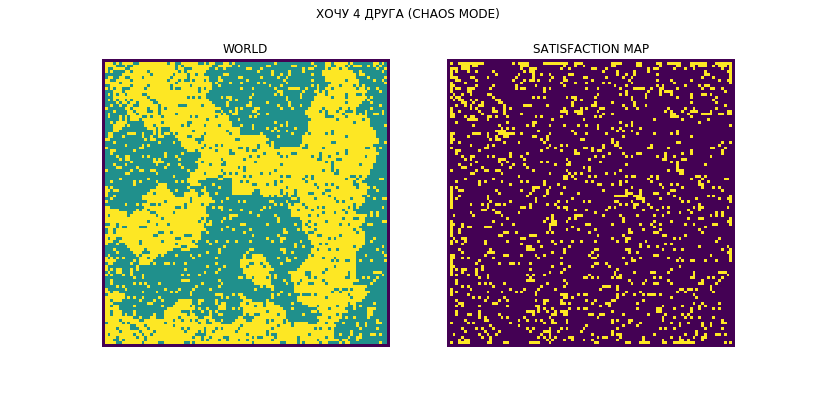
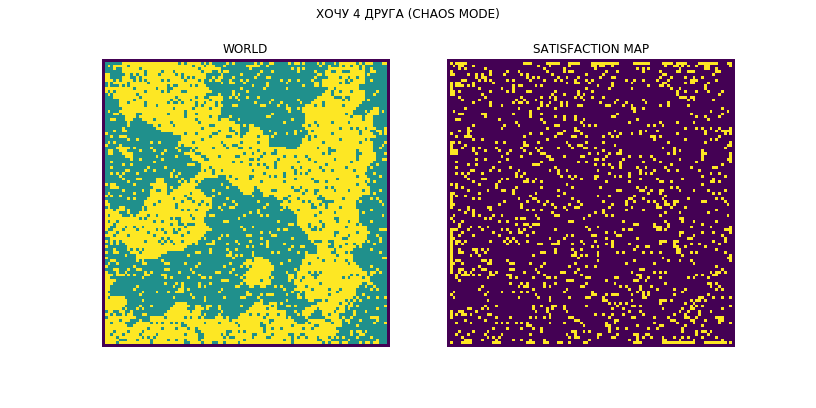
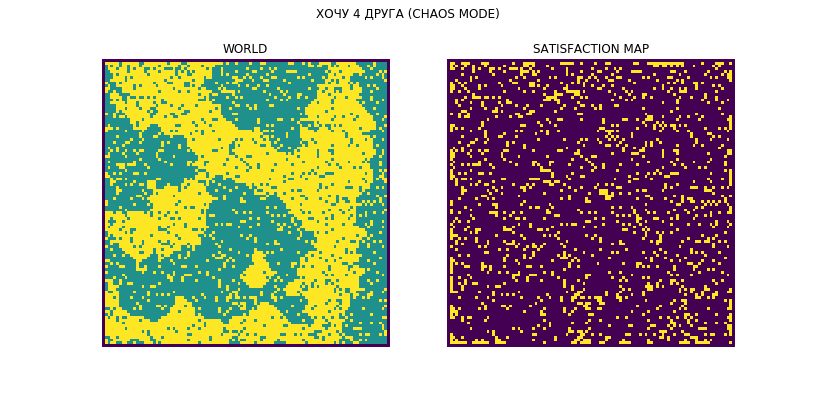
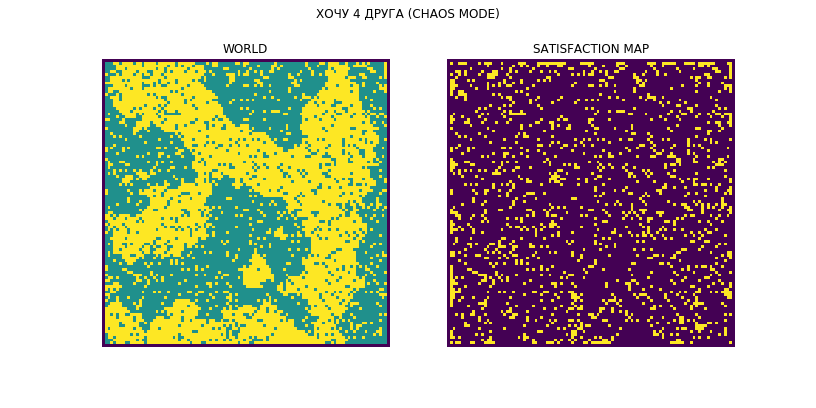
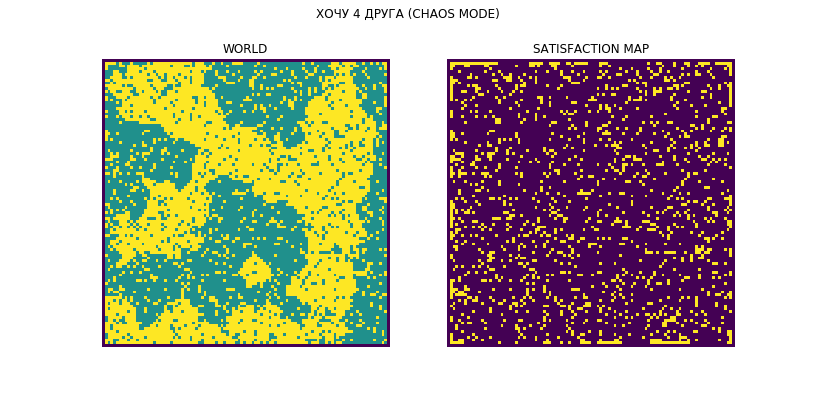
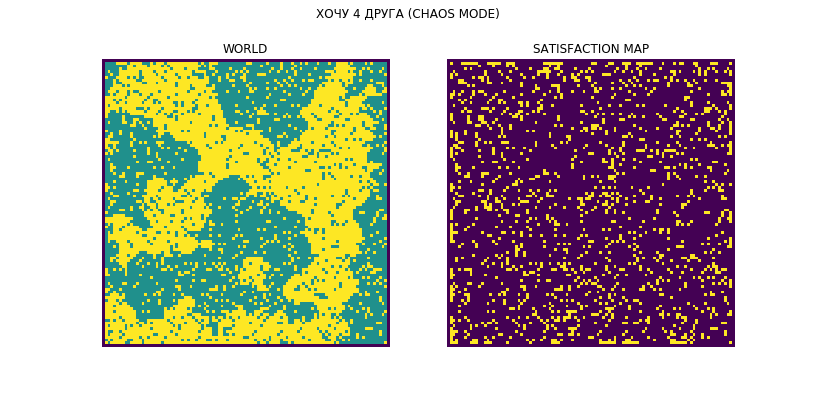
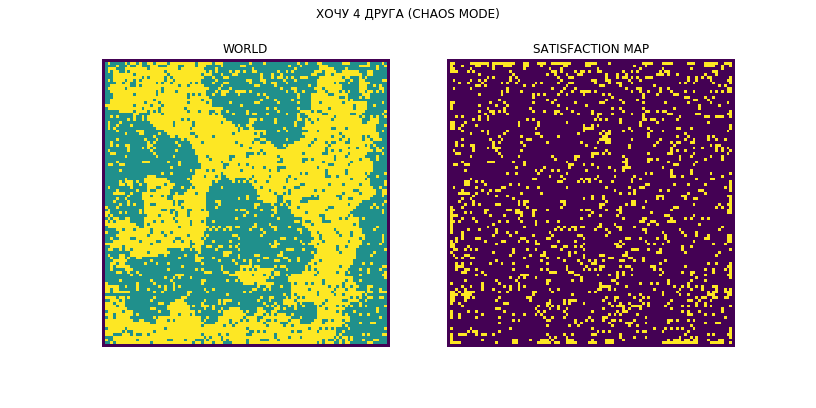
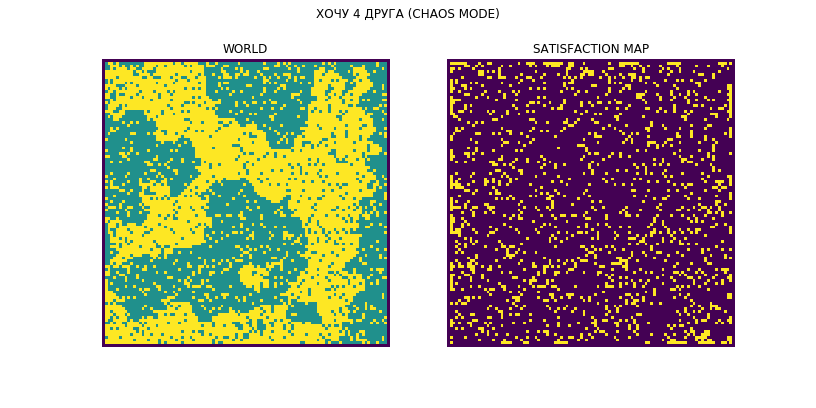
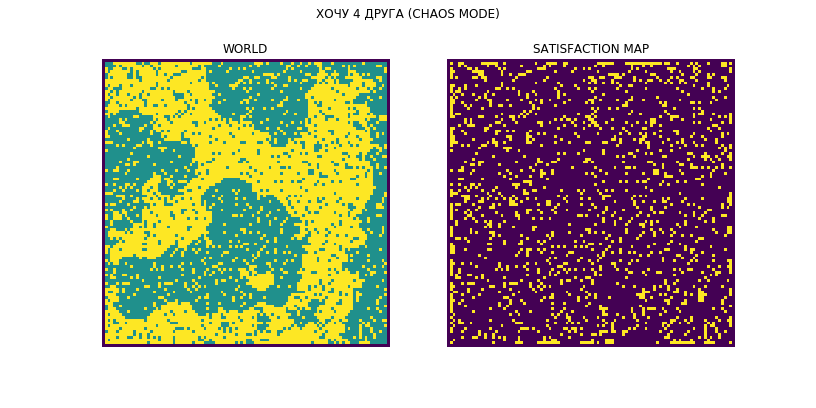
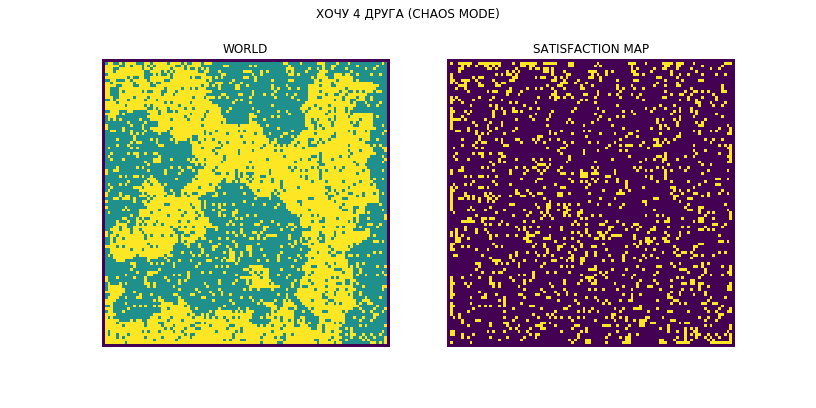
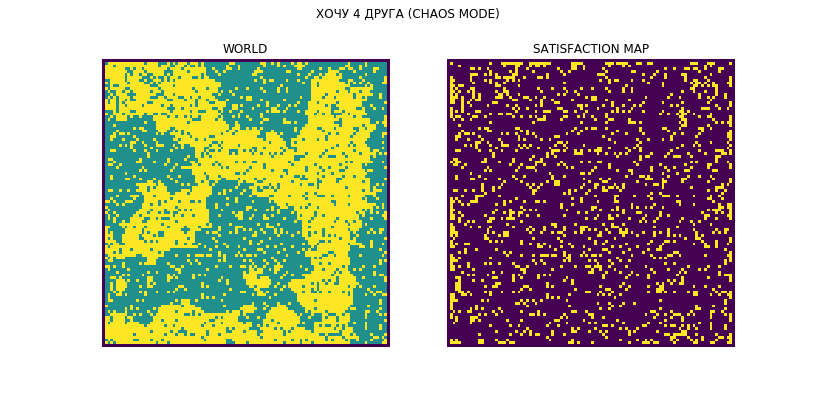
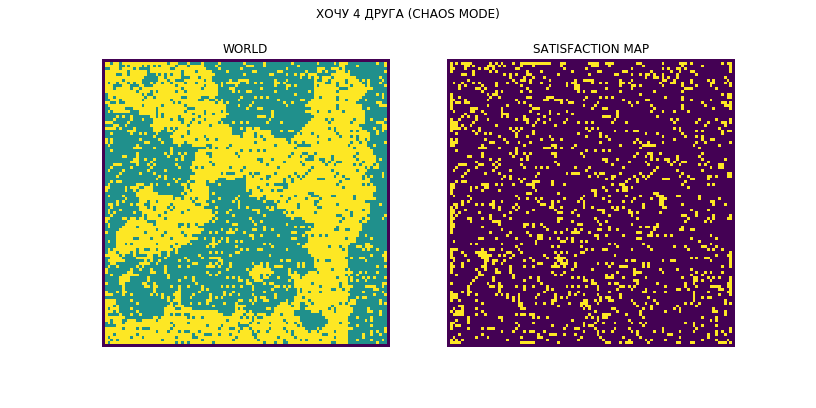

In [16]:
world = Chaos(SATISFACTION_THRESHOLD=4)
for _ in tqdm(range(10000)):
    world.iteration()
show_frames("ХОЧУ 4 ДРУГА (CHAOS MODE)", world.world_map[::100], world.dissatisfied_map[::100])

А вот на пороге 5 формирование каких-либо структур уже не прослеживается - кажется, зародыши быстро погибают, поскольку недовольны практически все, и все совершают рандомные телодвижения.


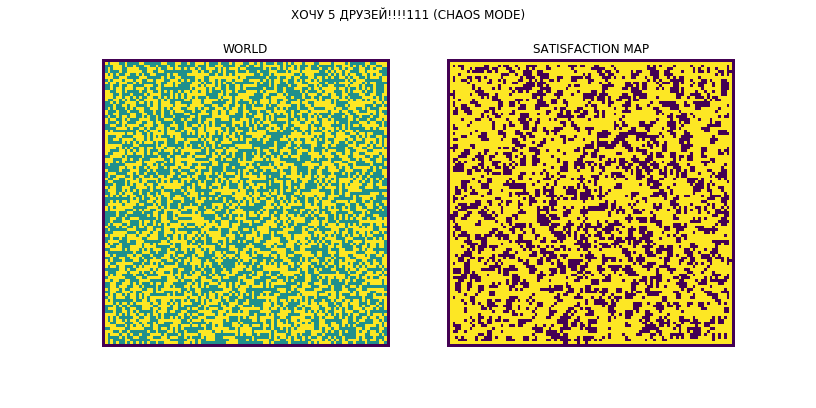
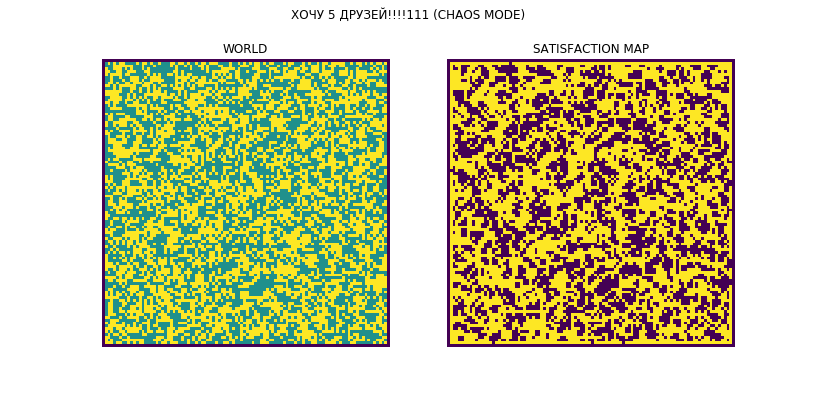
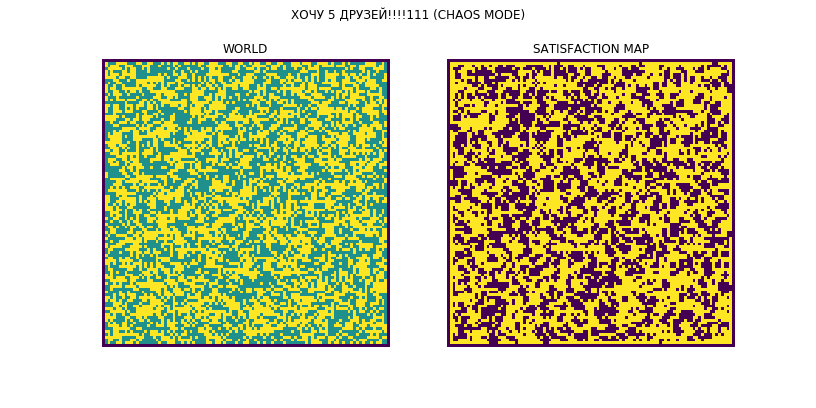
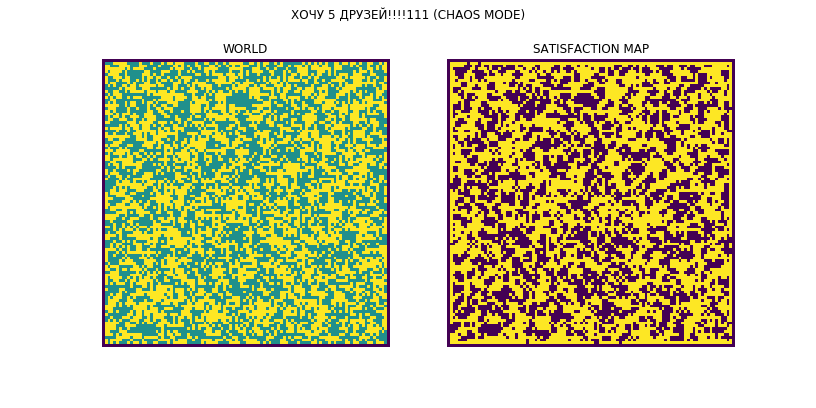
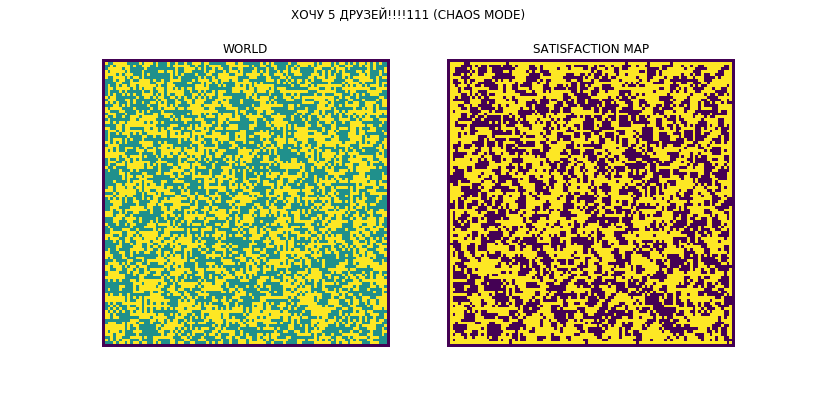
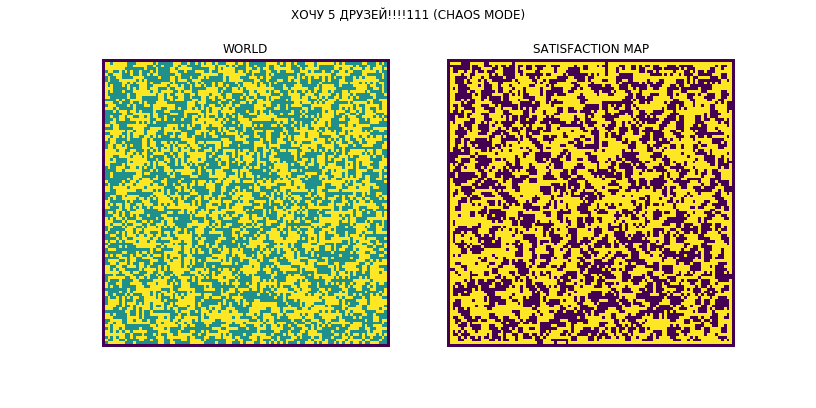
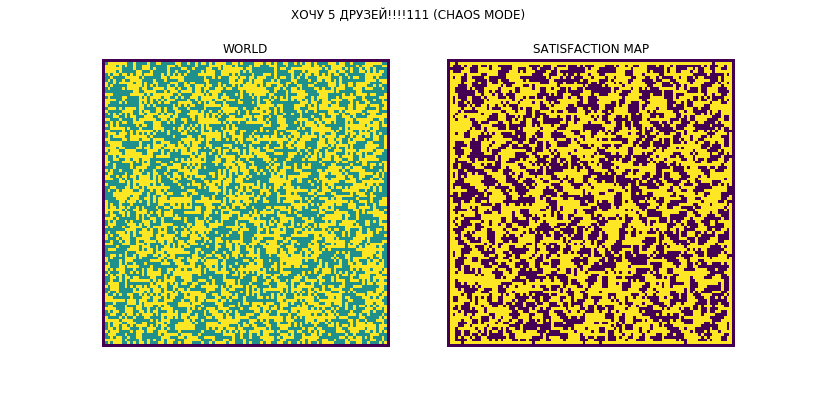
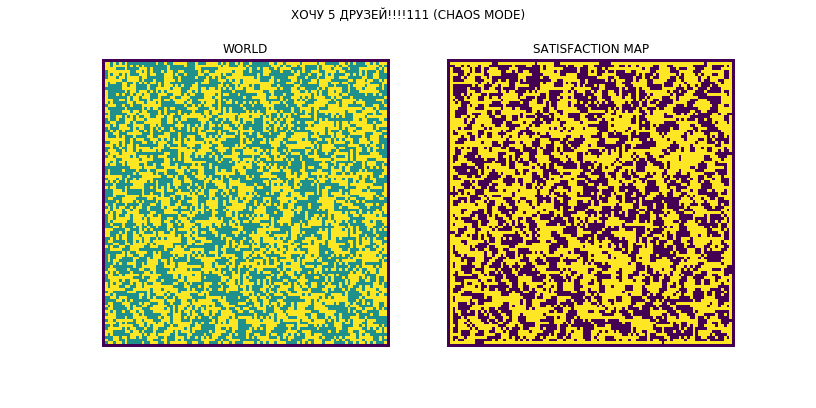
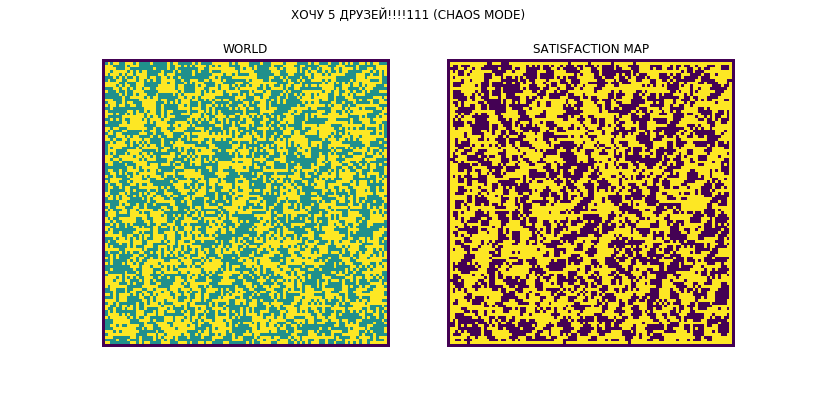
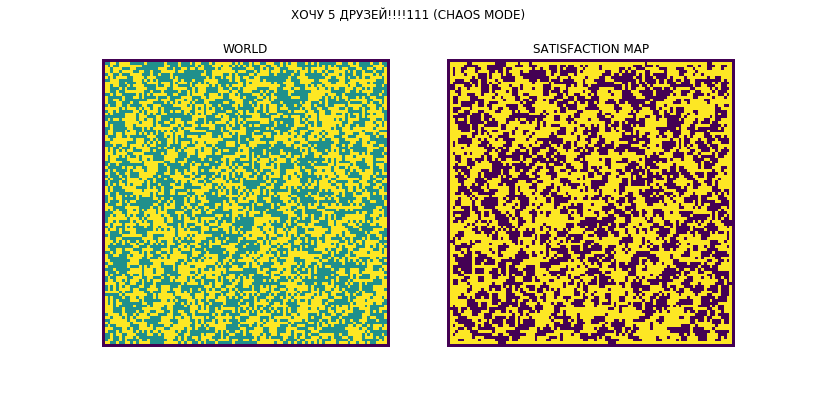
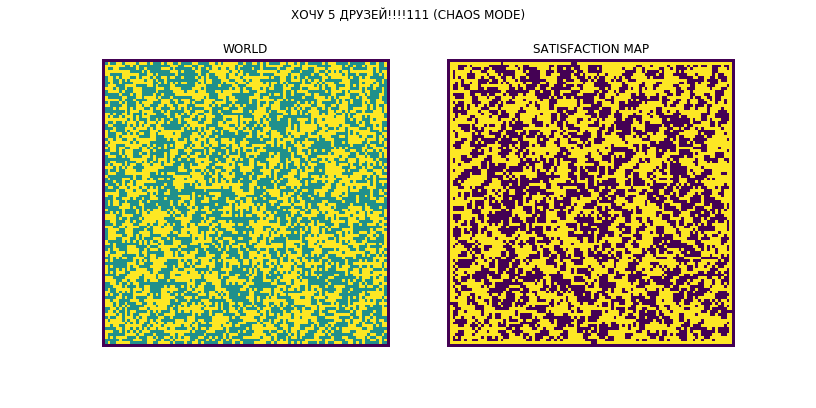
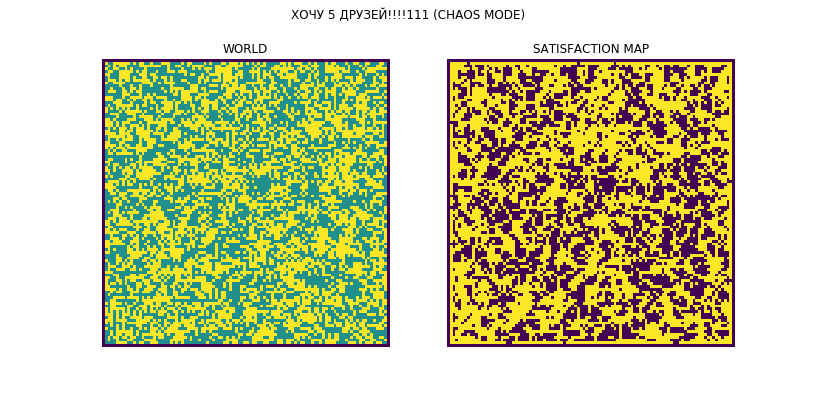
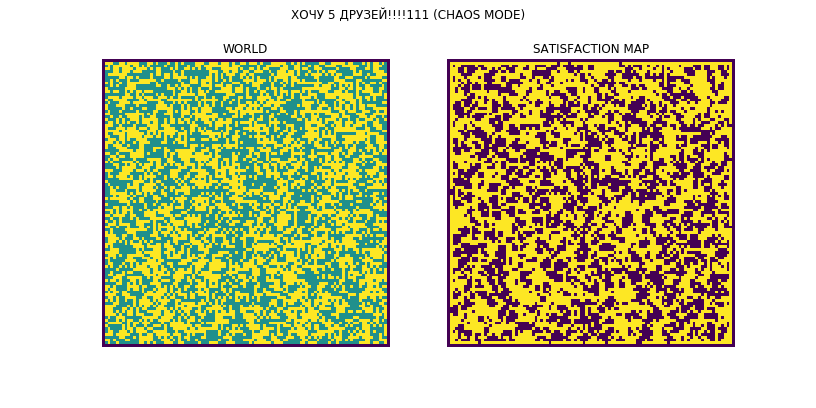
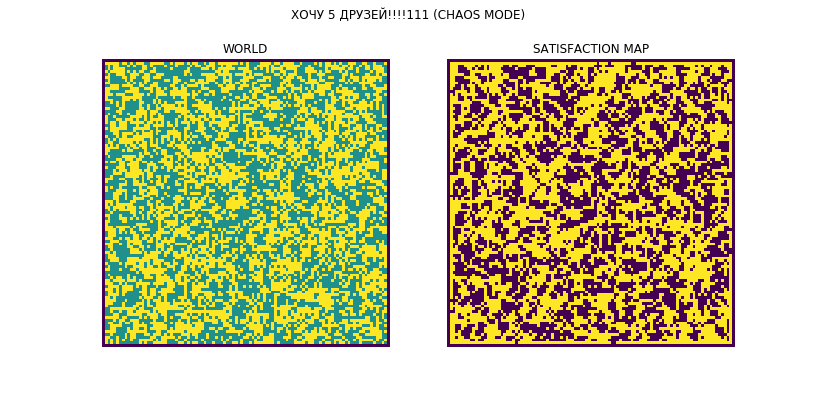
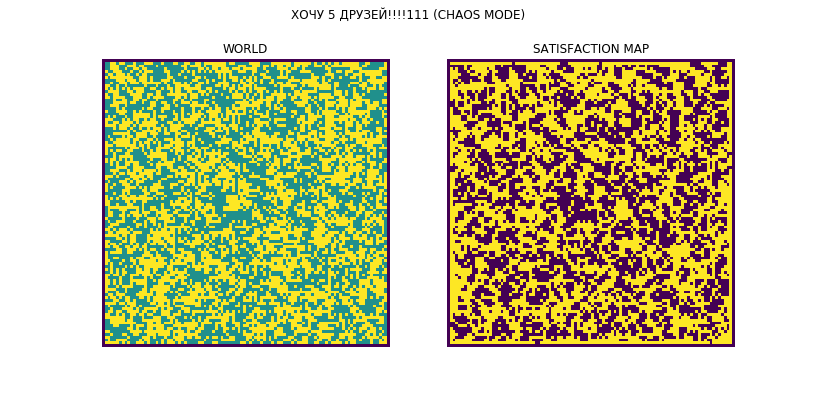
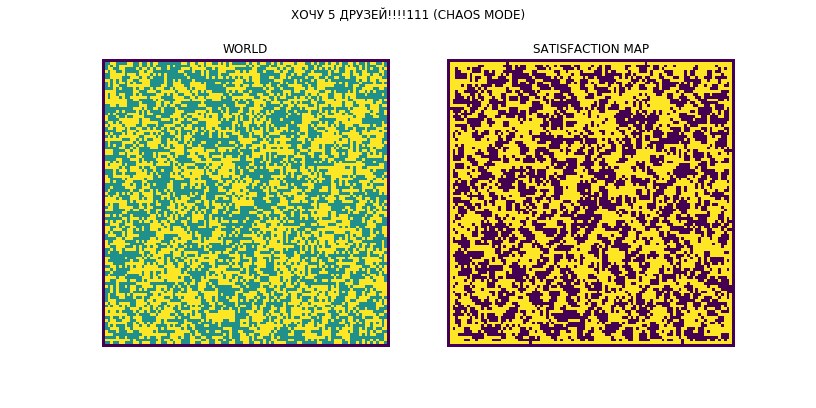
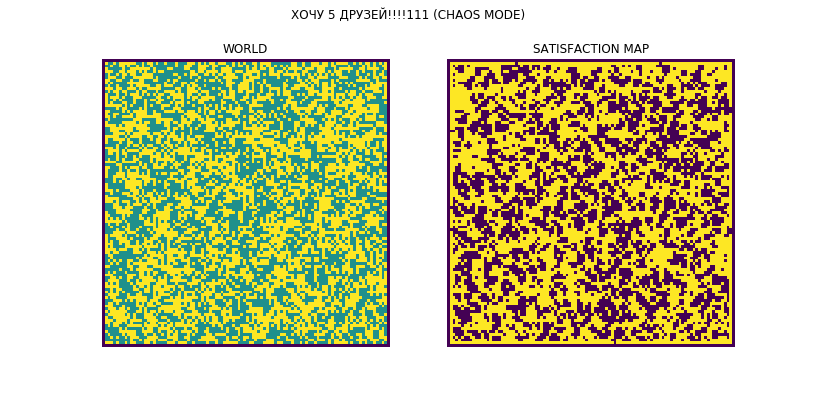
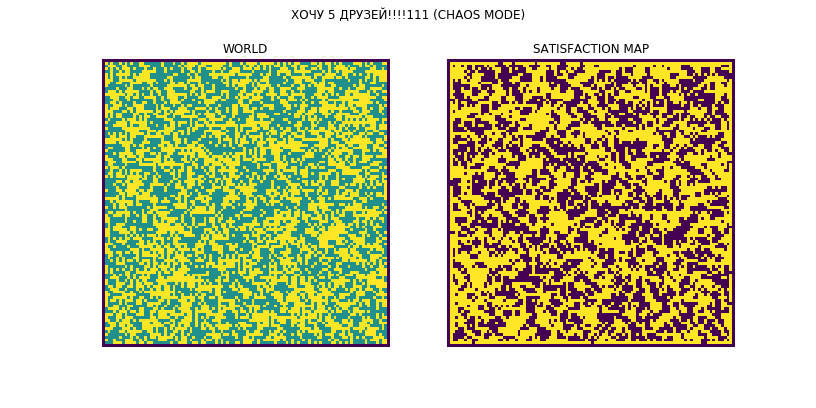
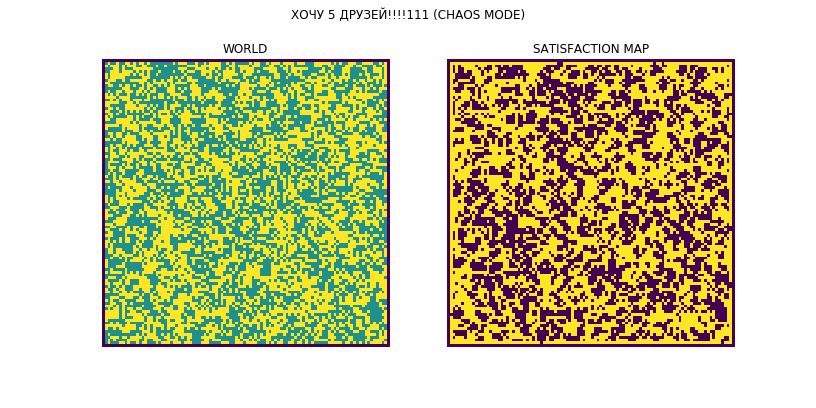
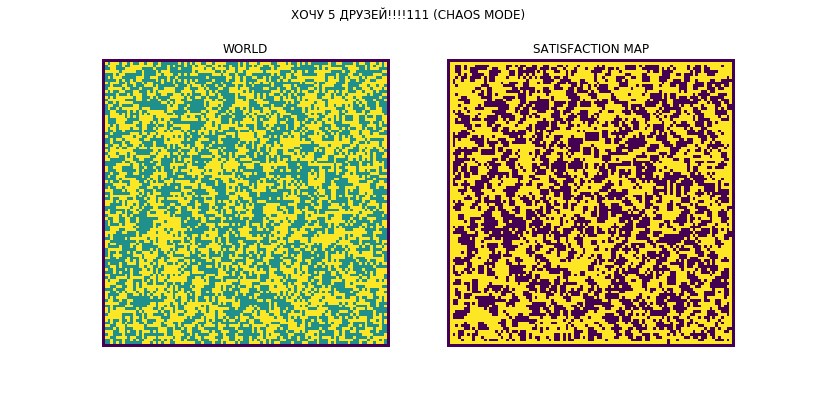
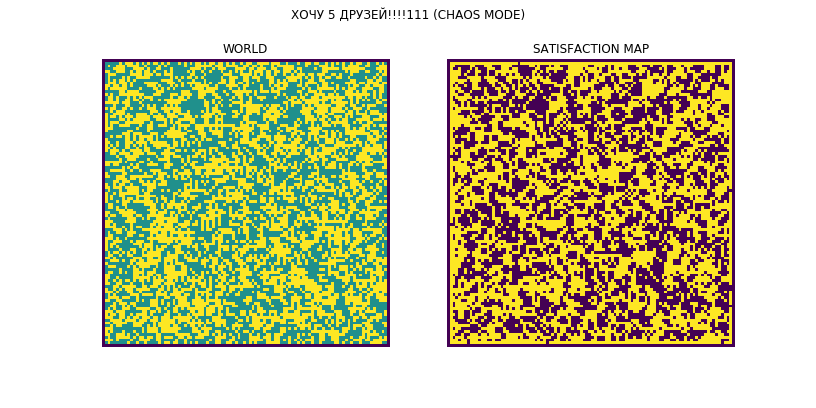
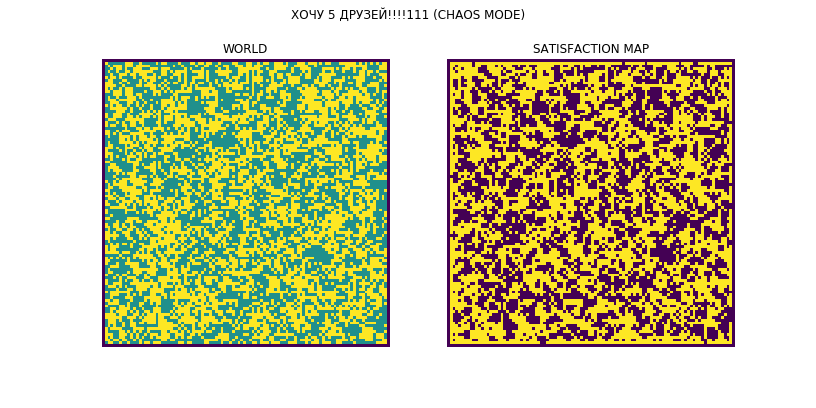
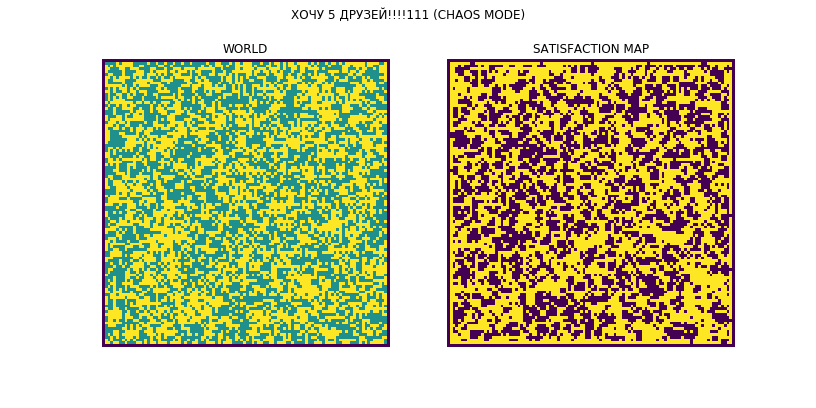
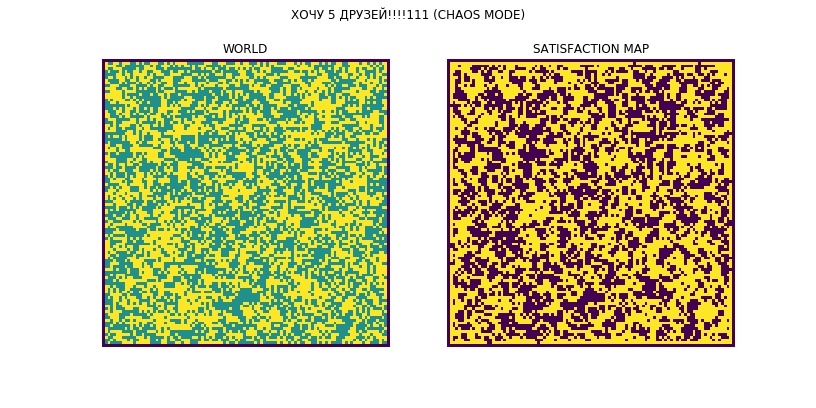
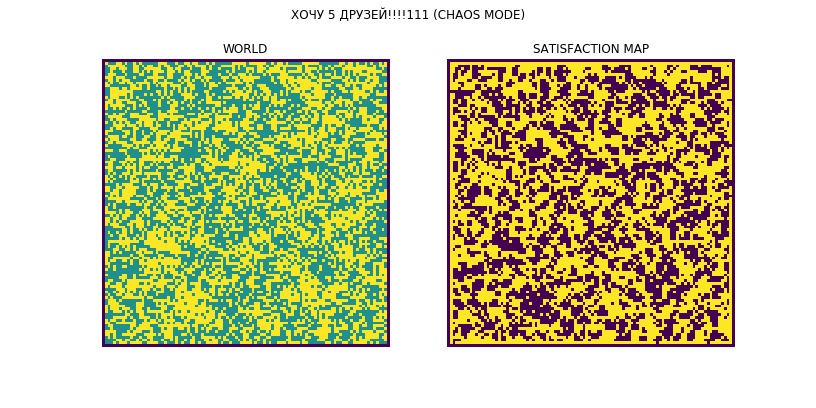
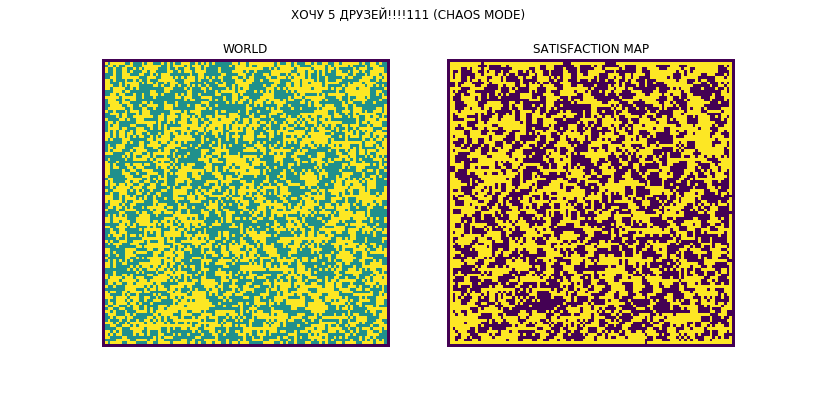
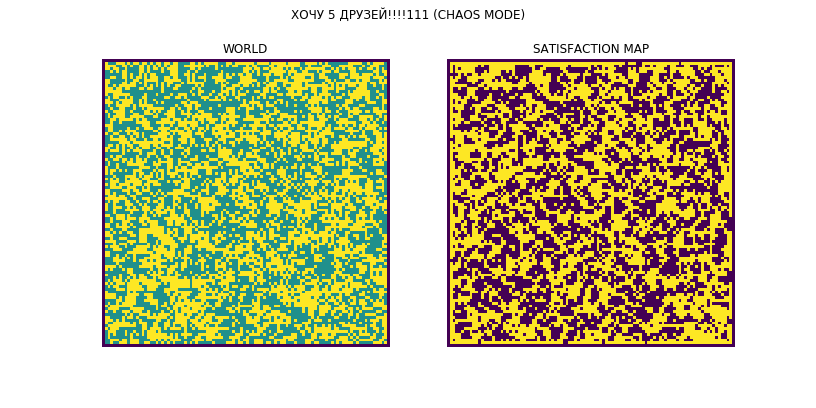
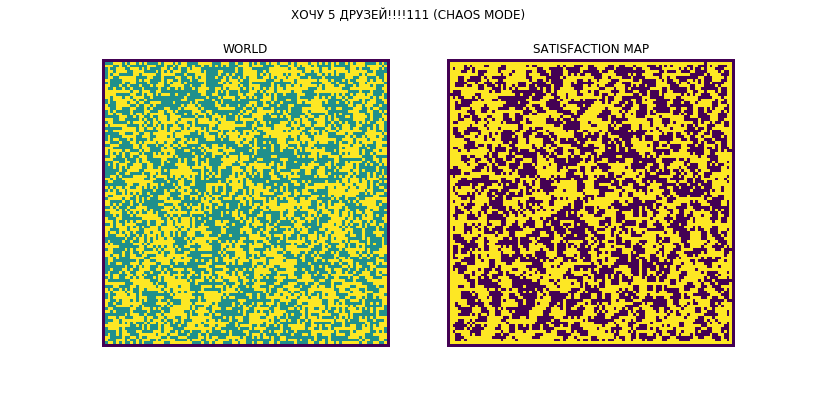
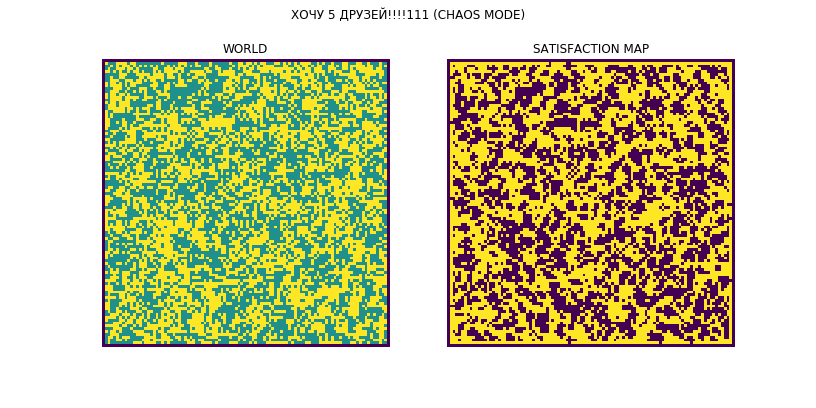
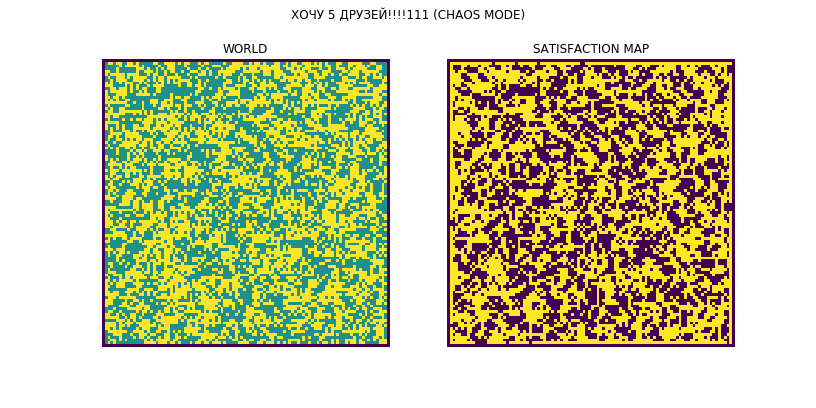
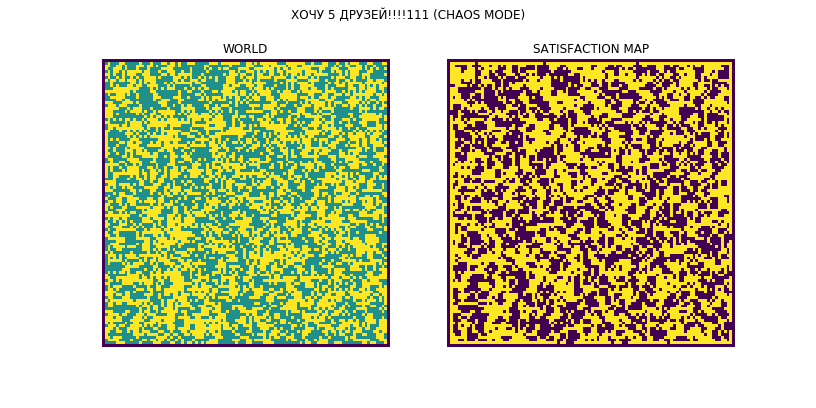
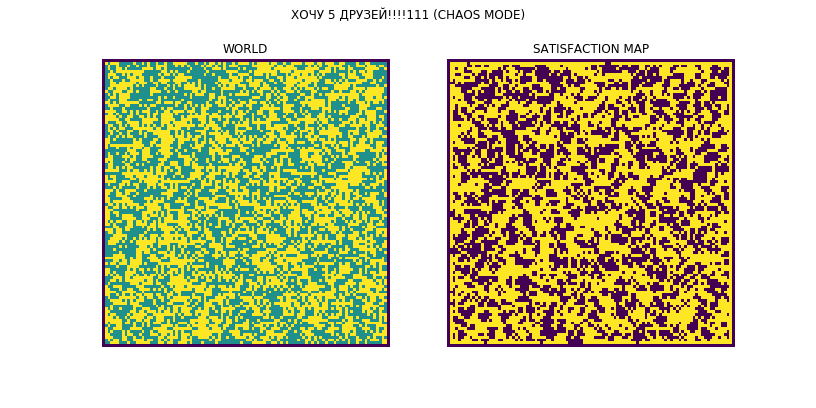
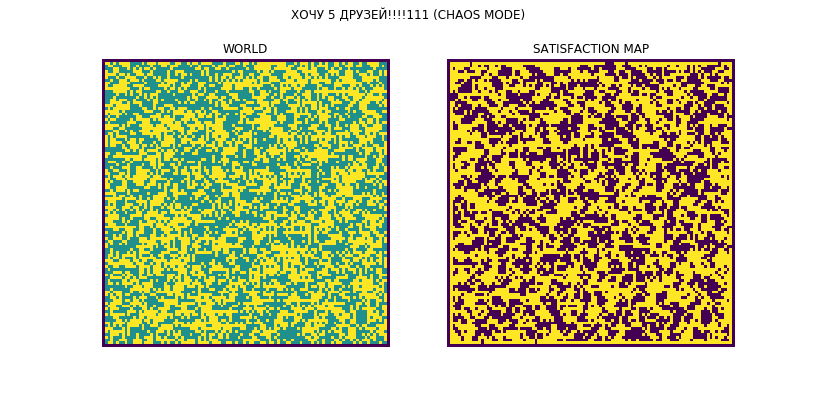
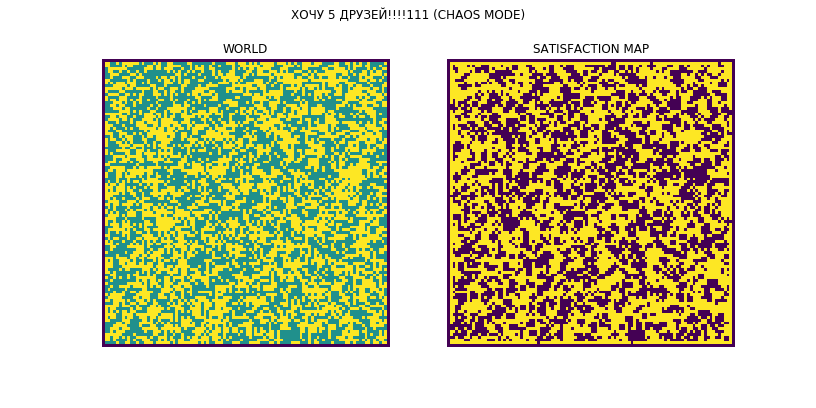
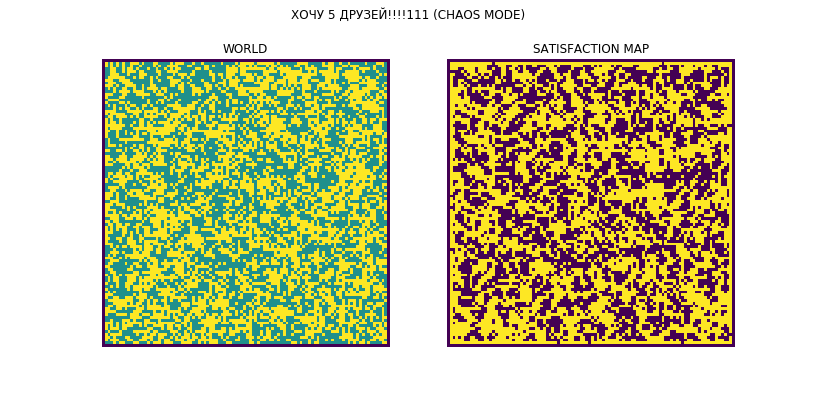
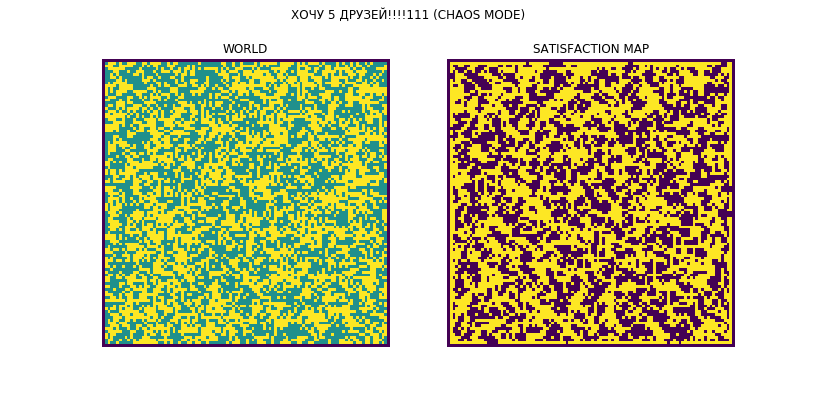
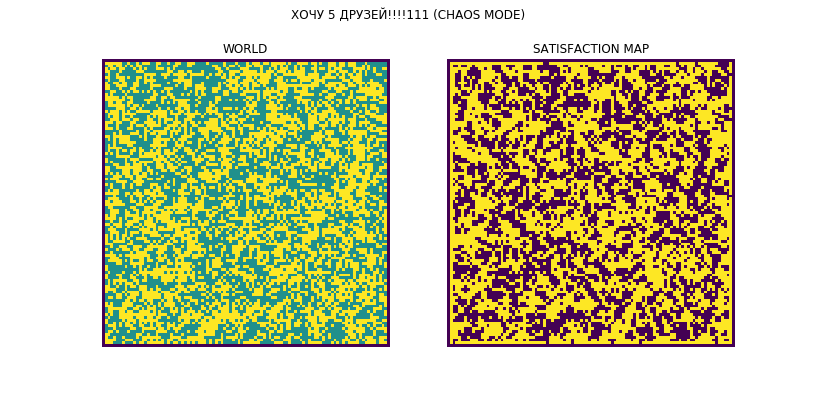
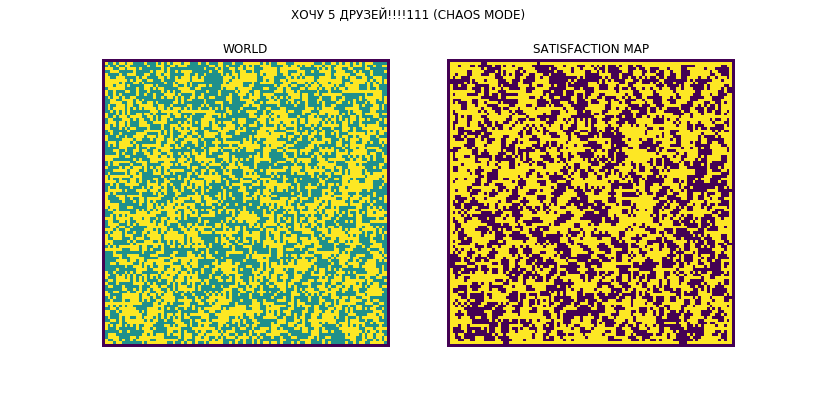
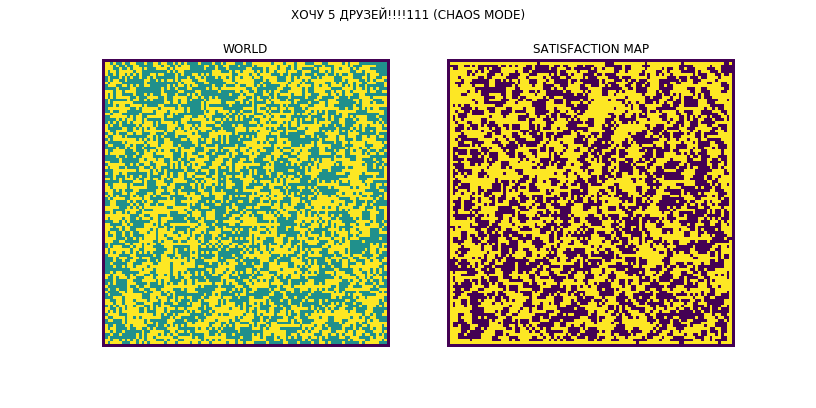
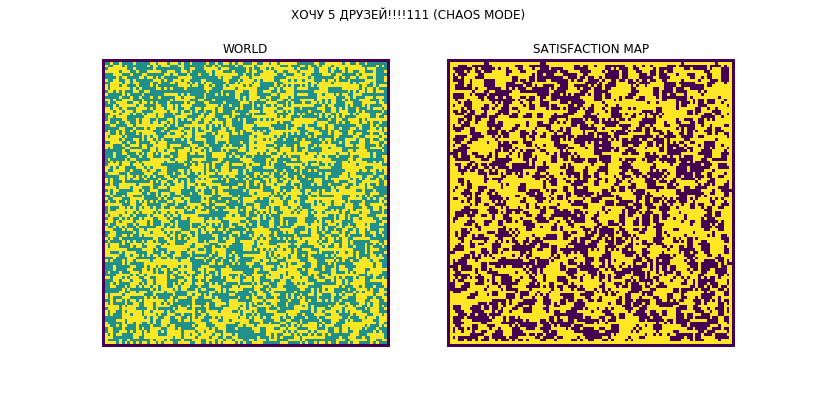
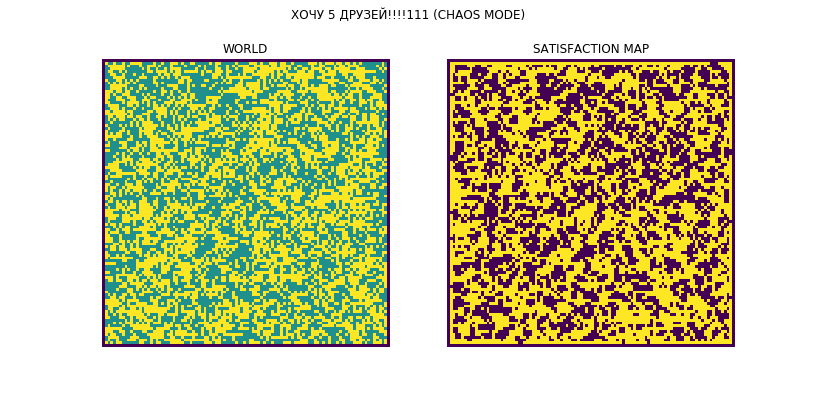
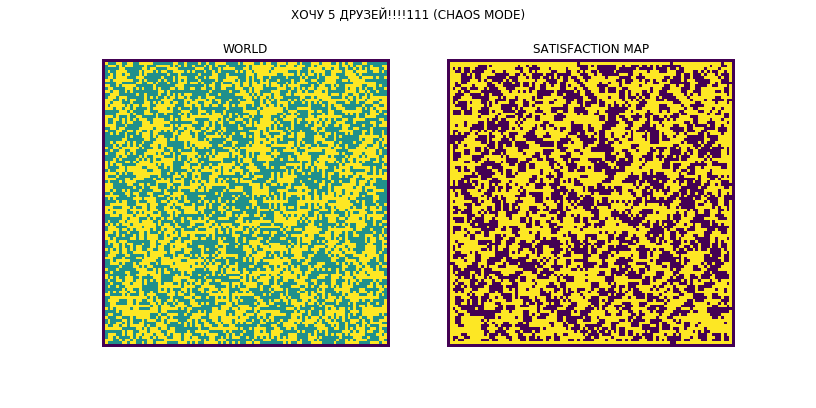
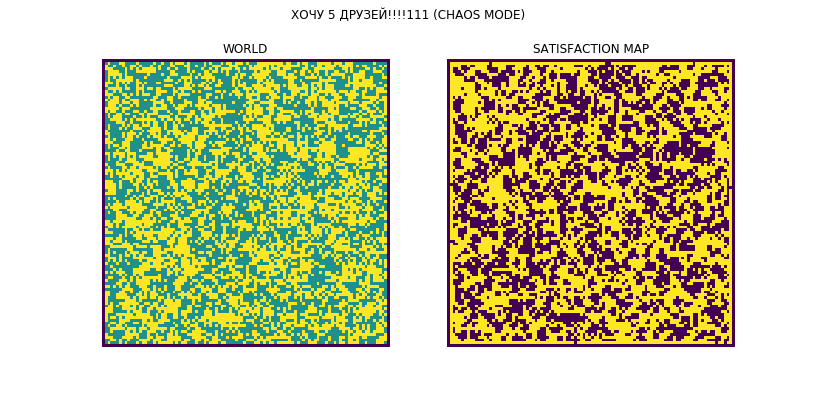
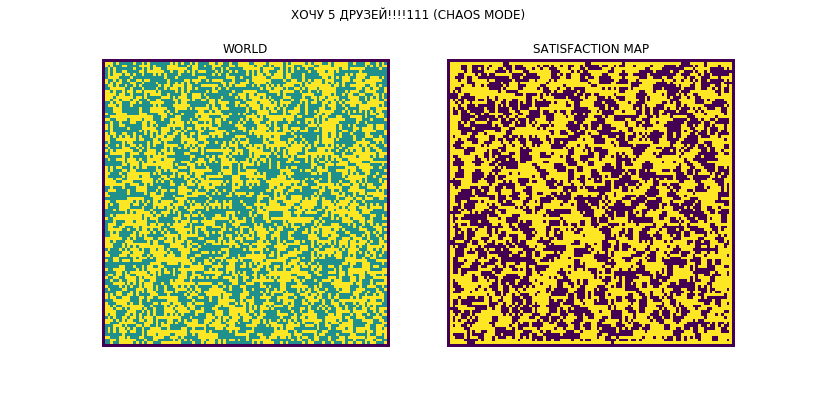
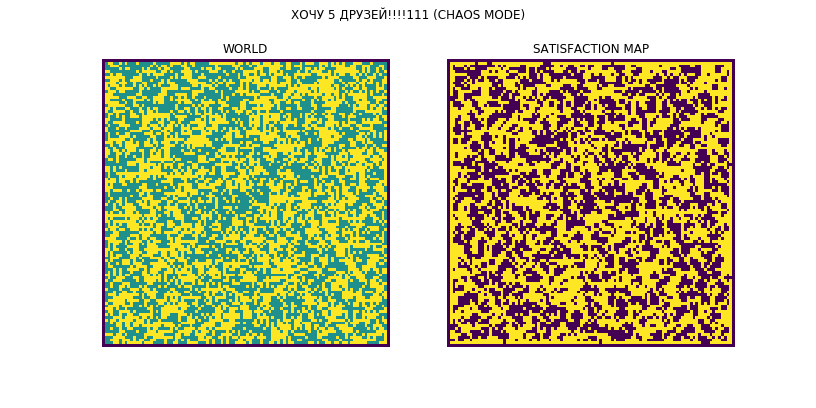
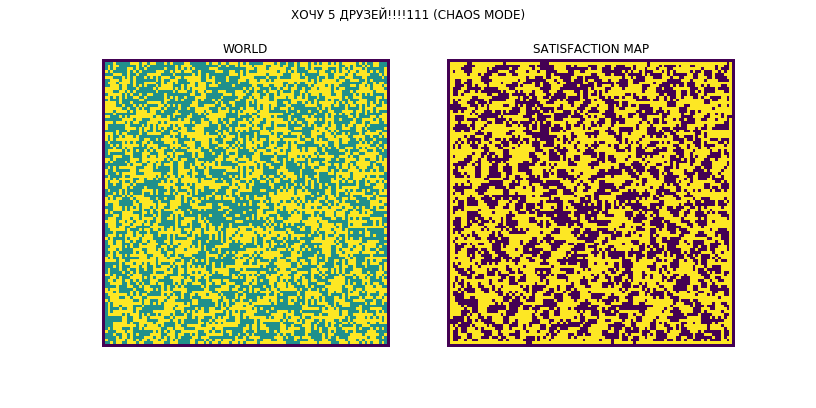
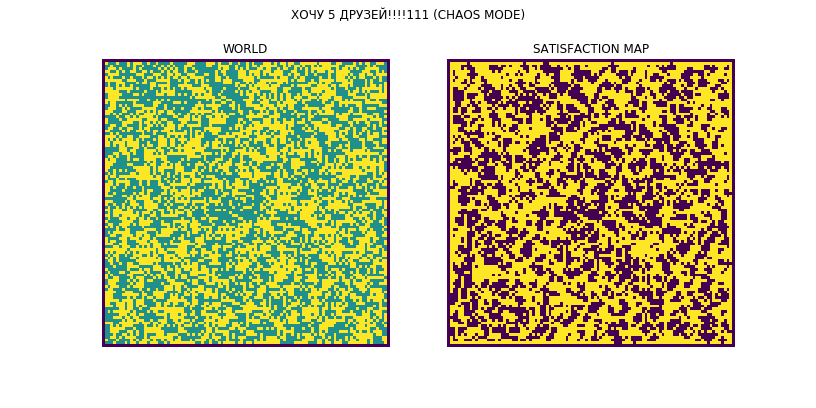
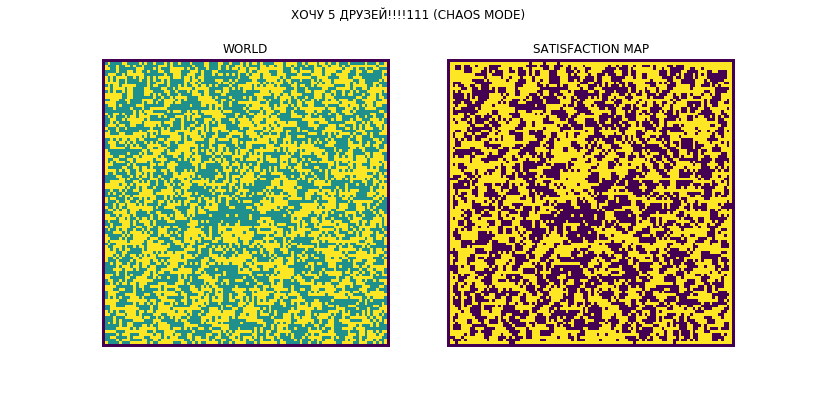
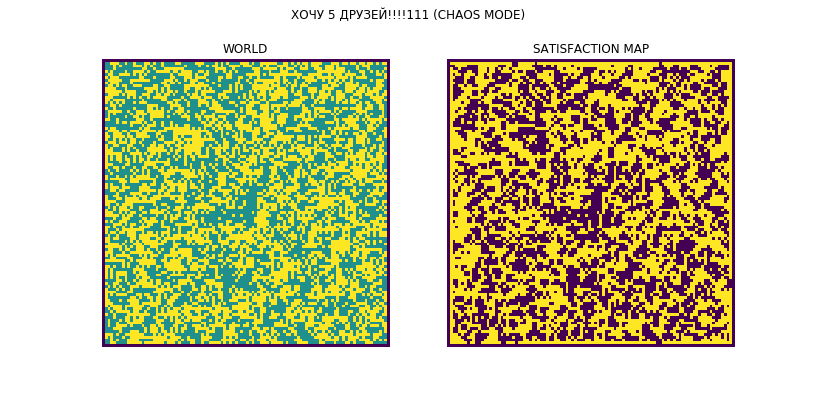
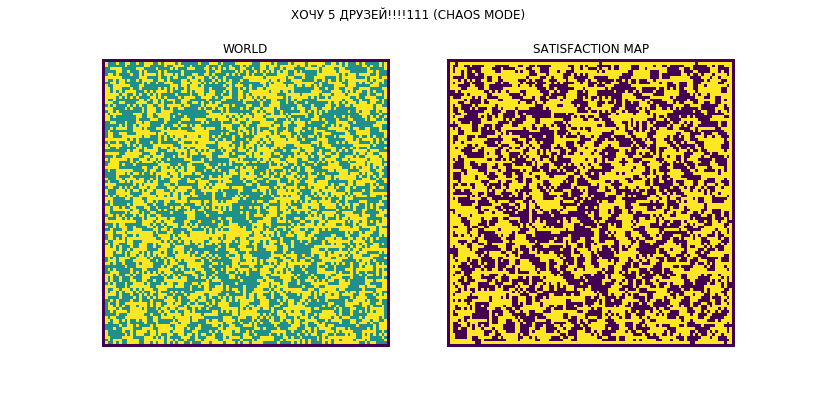
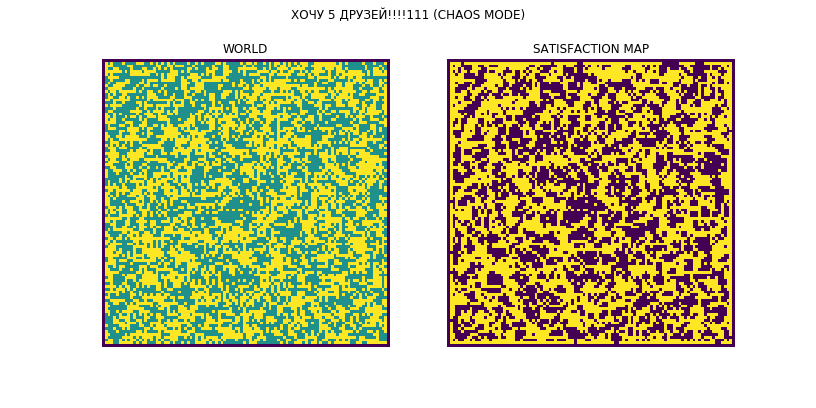
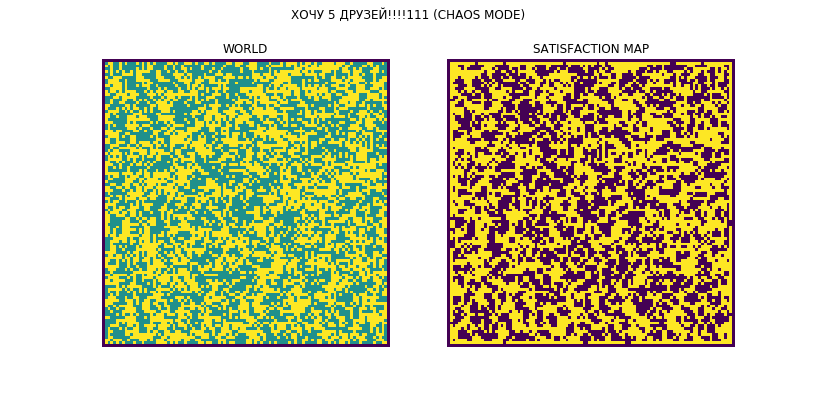
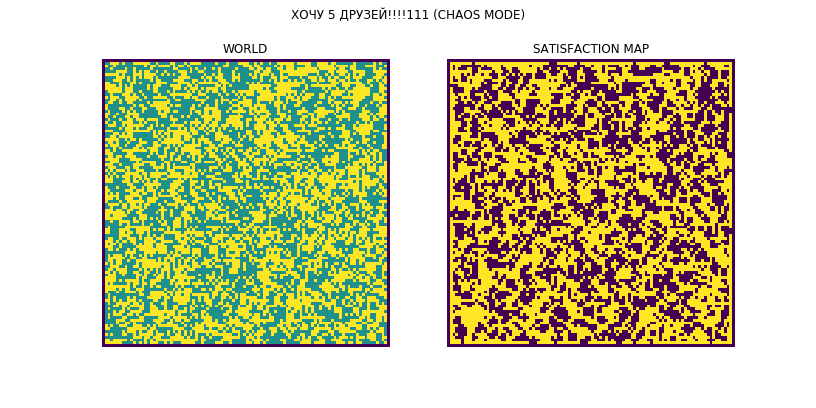
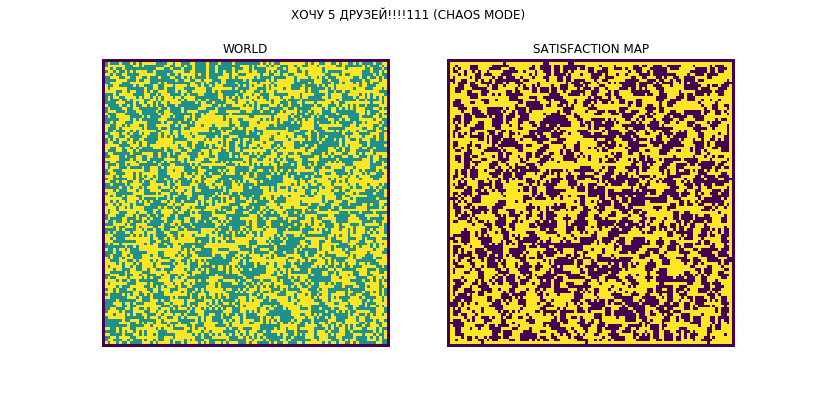
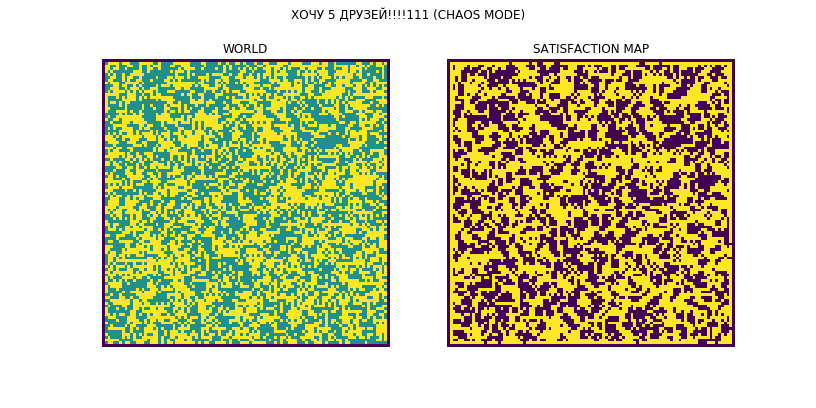
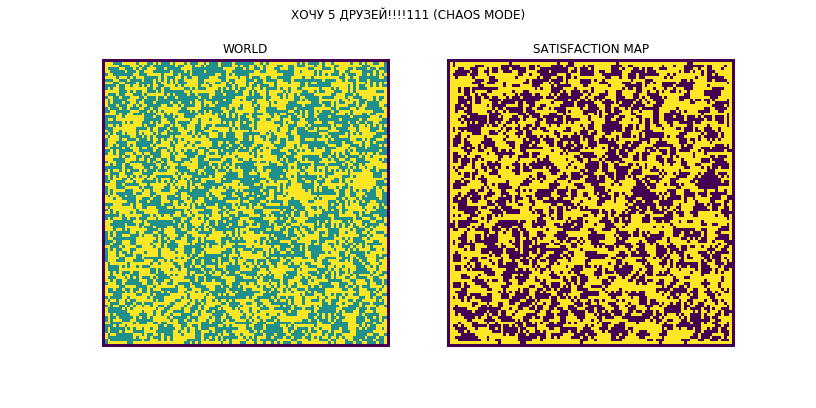
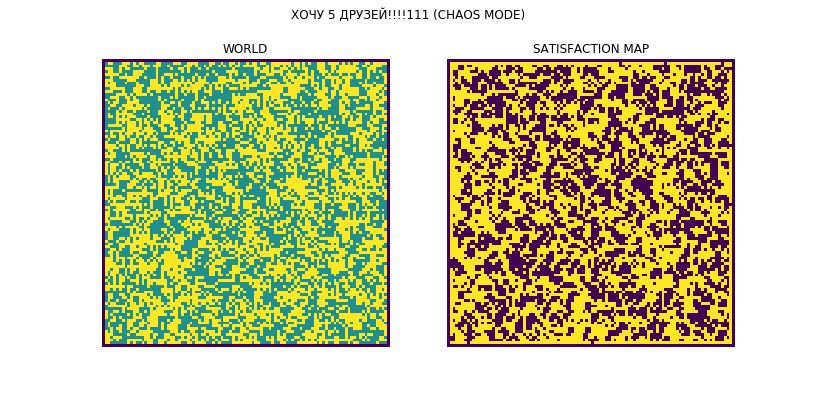
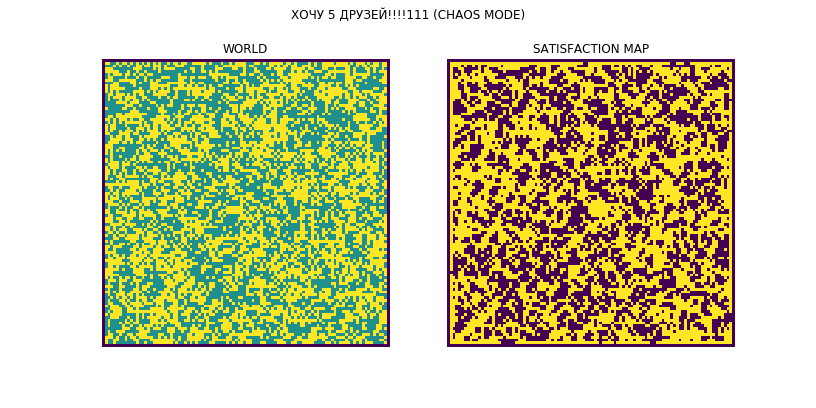
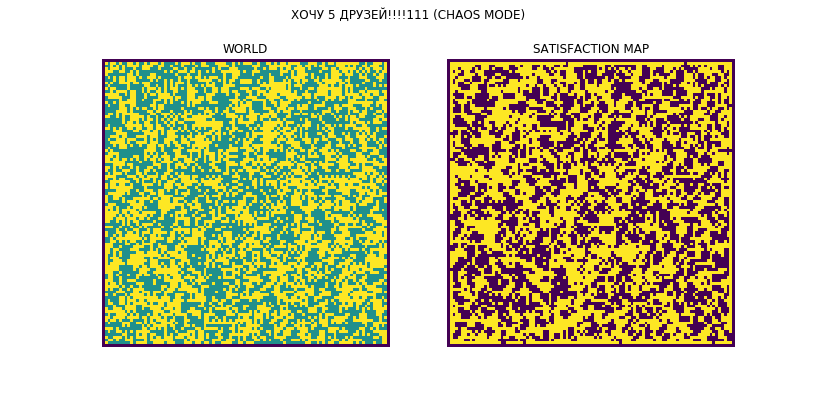
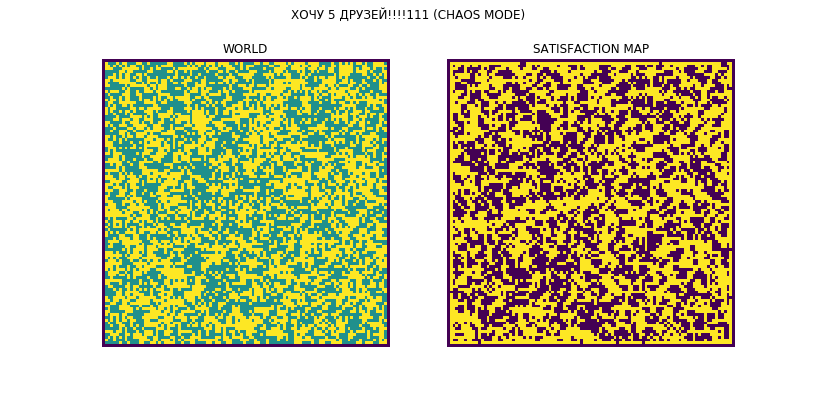
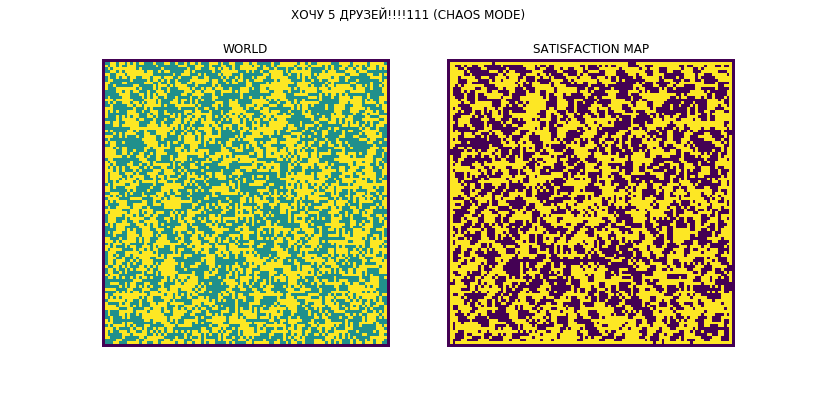
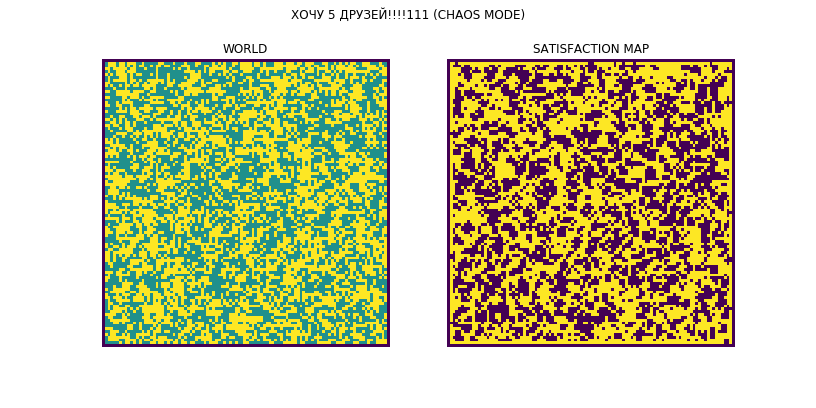
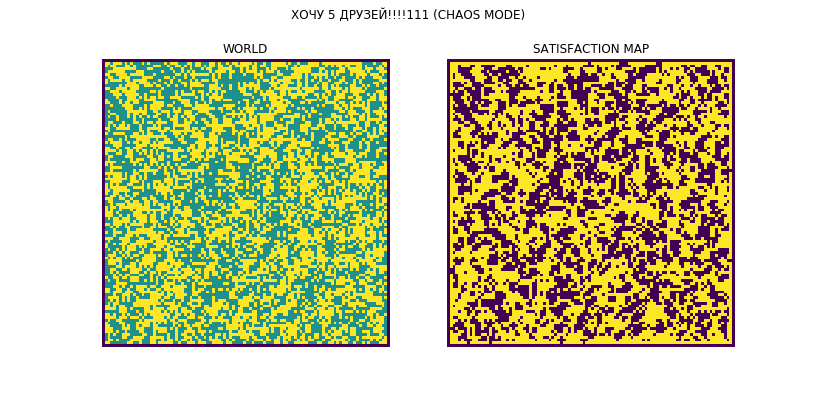
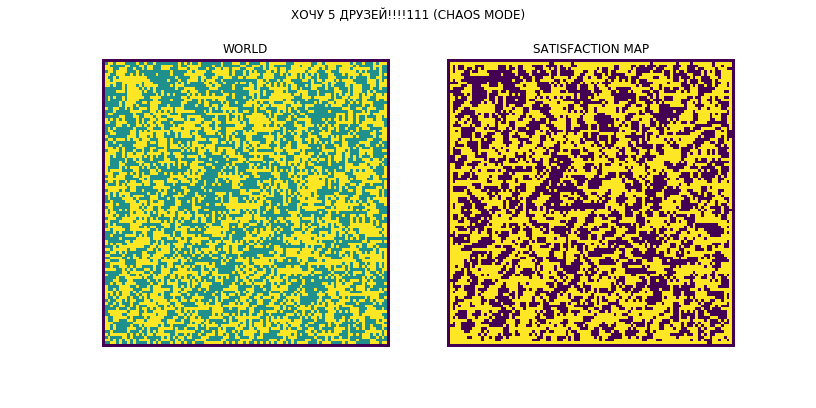
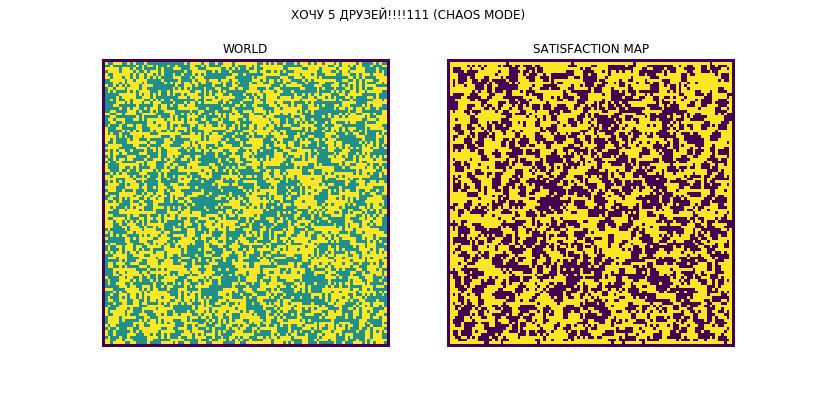
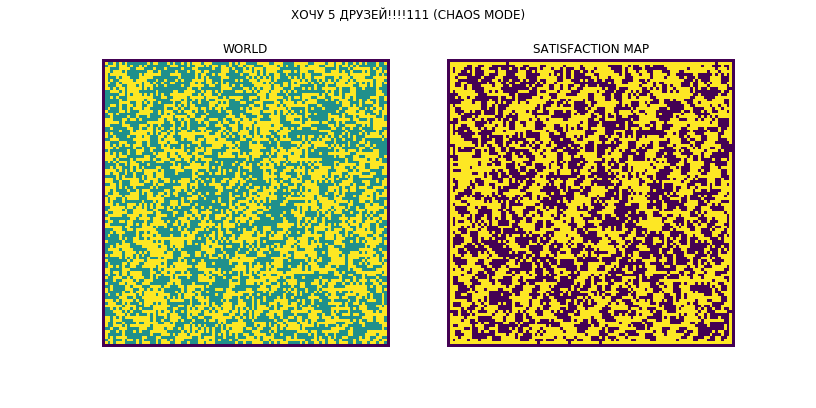
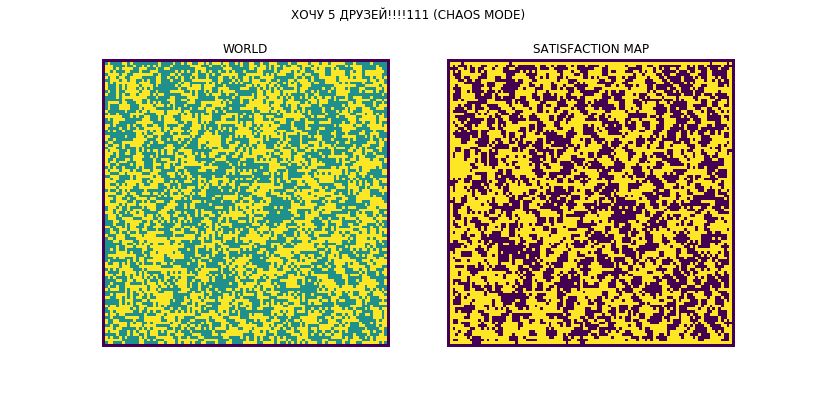
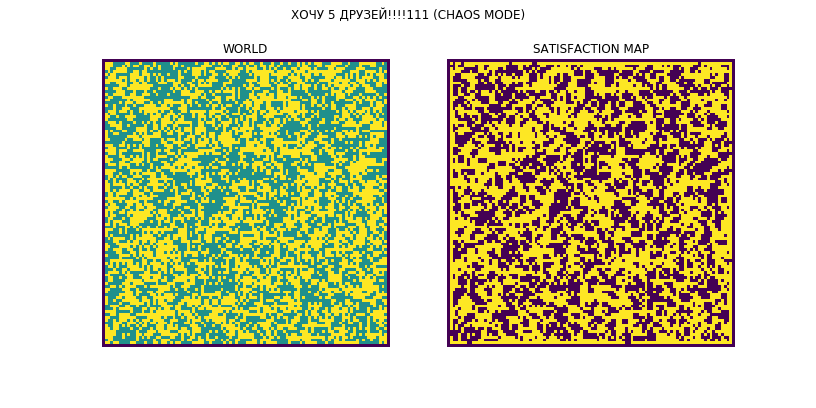
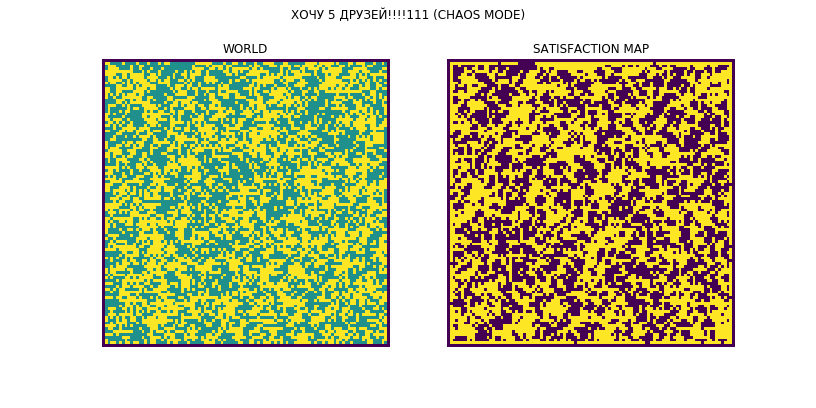
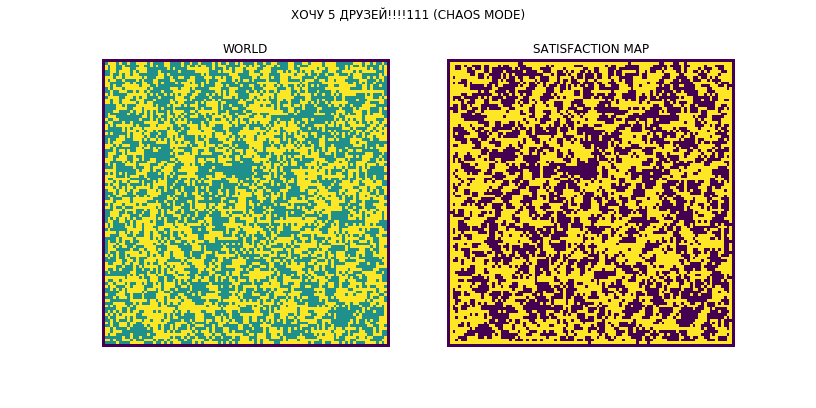
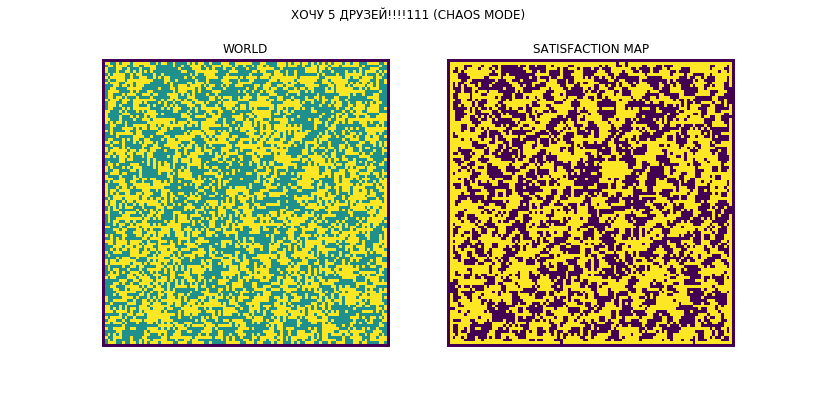
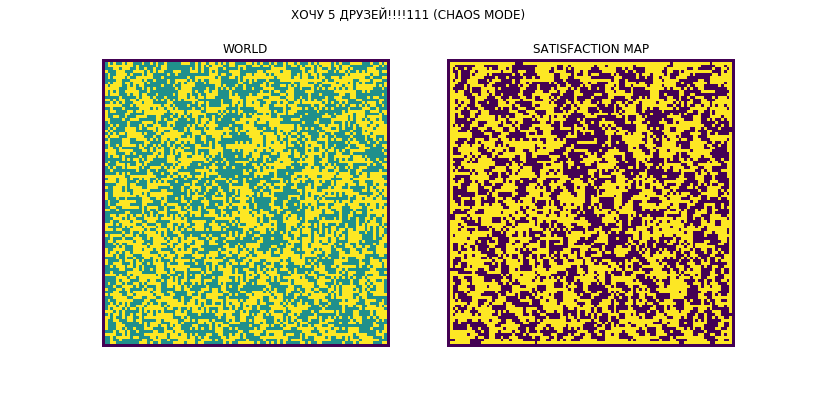
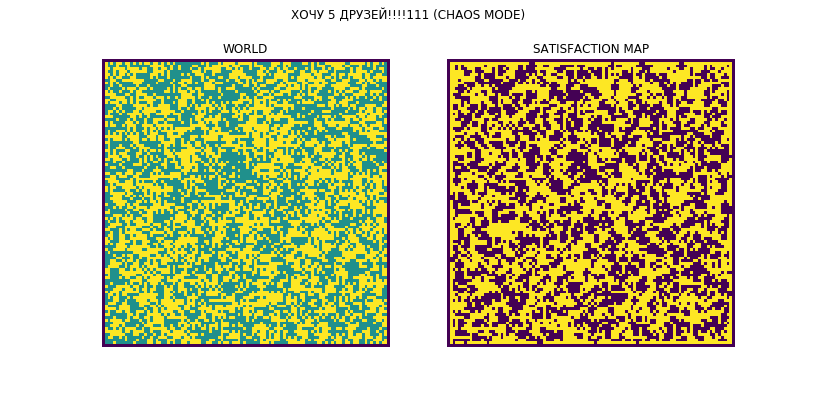
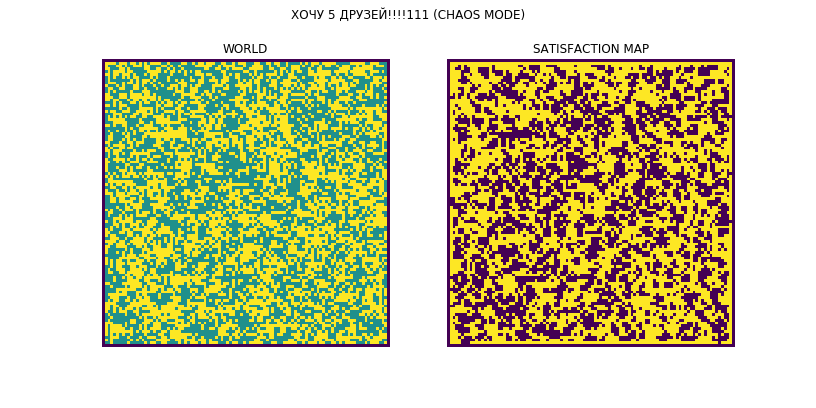
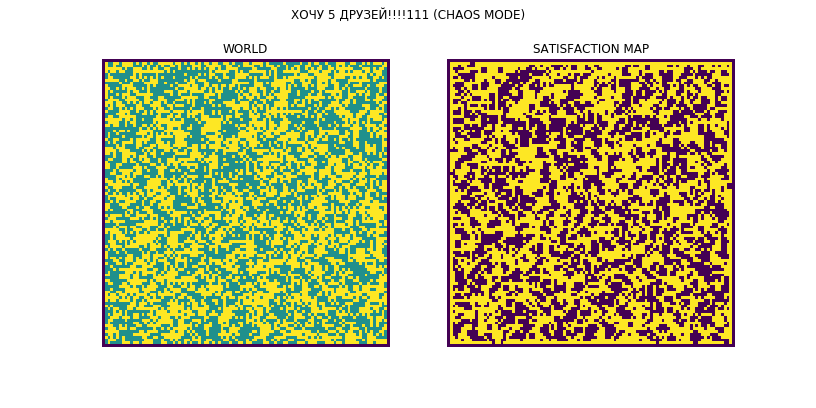
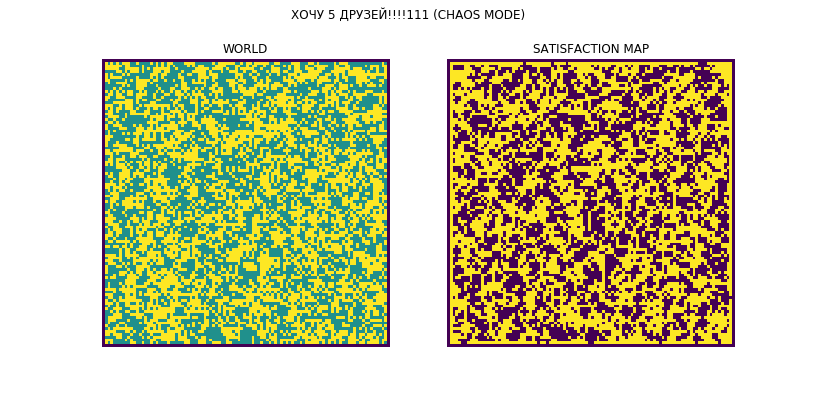
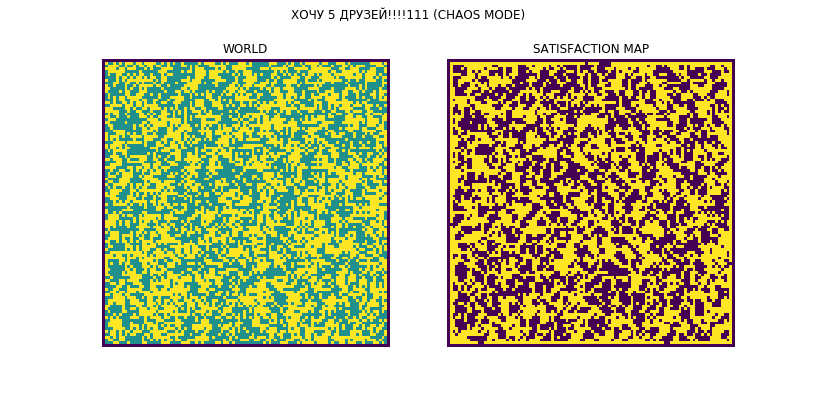
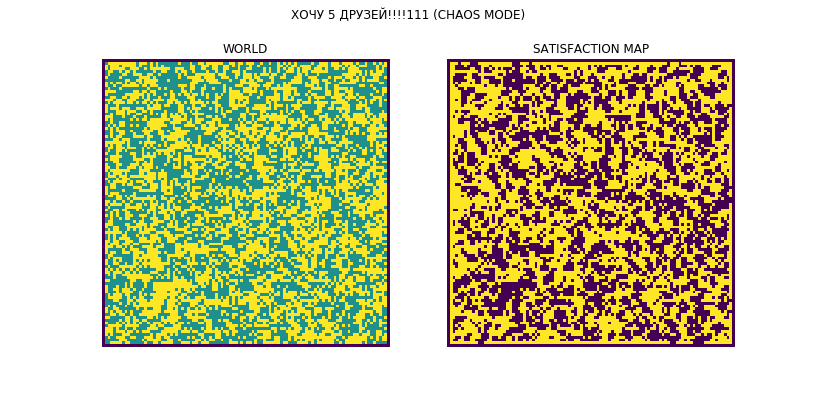
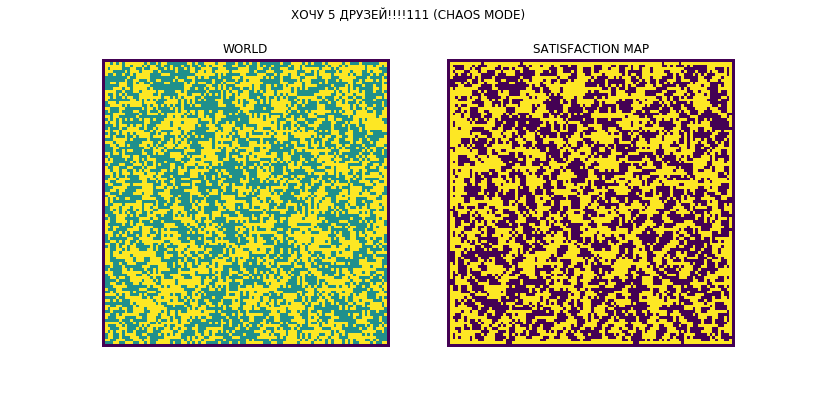
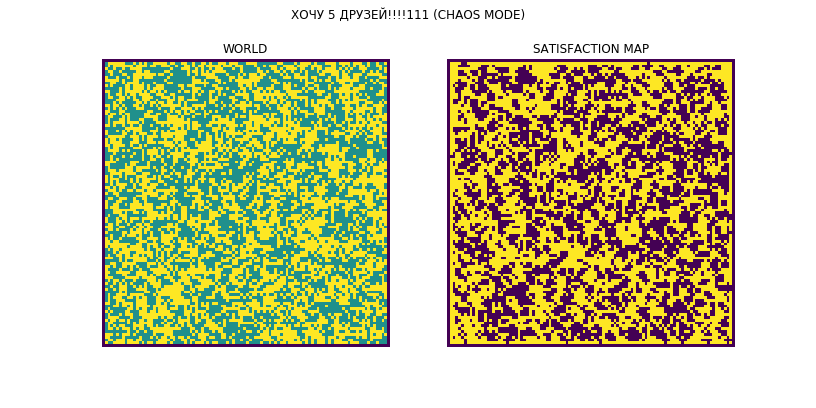
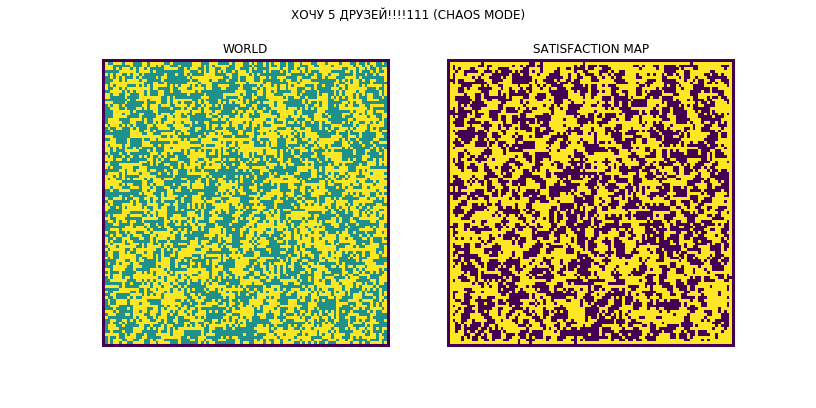
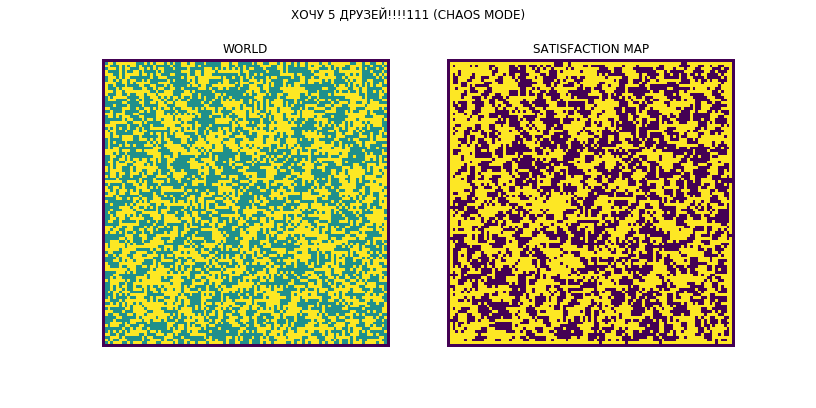
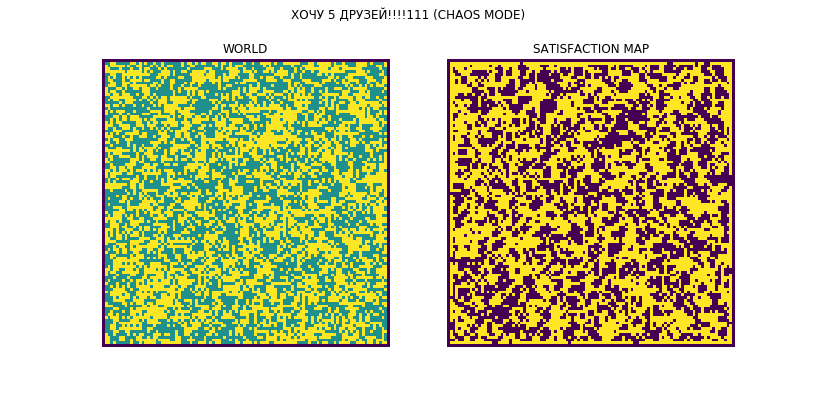
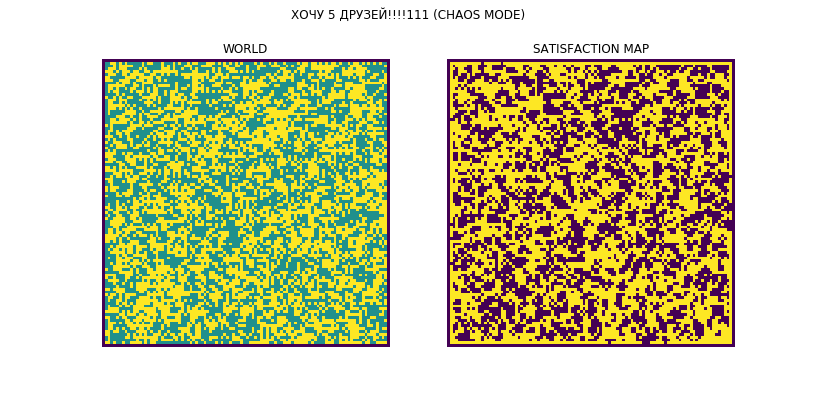
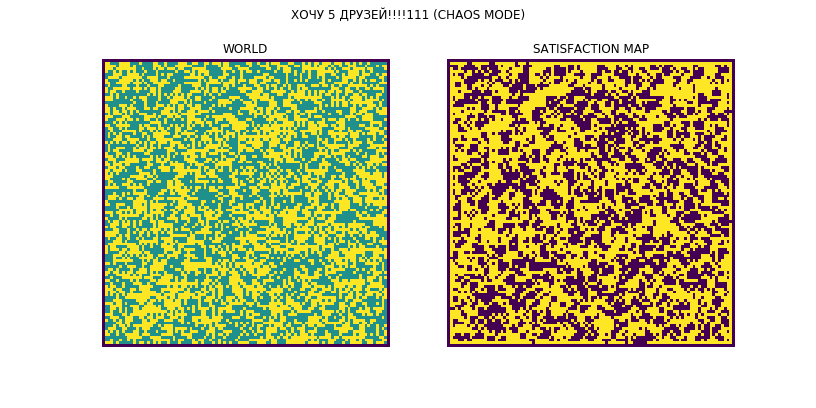
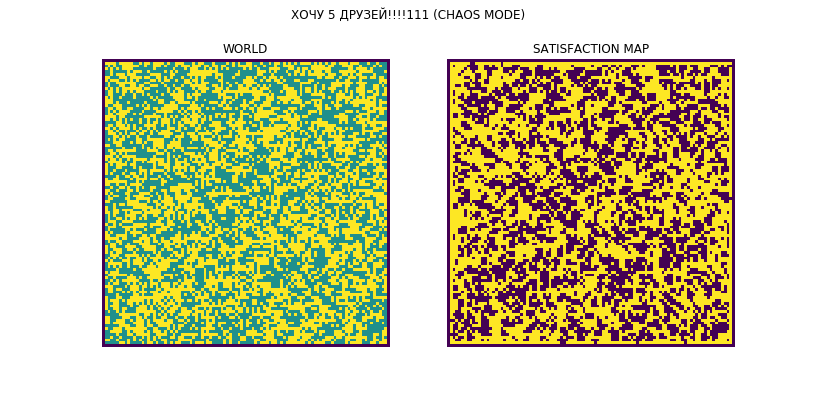
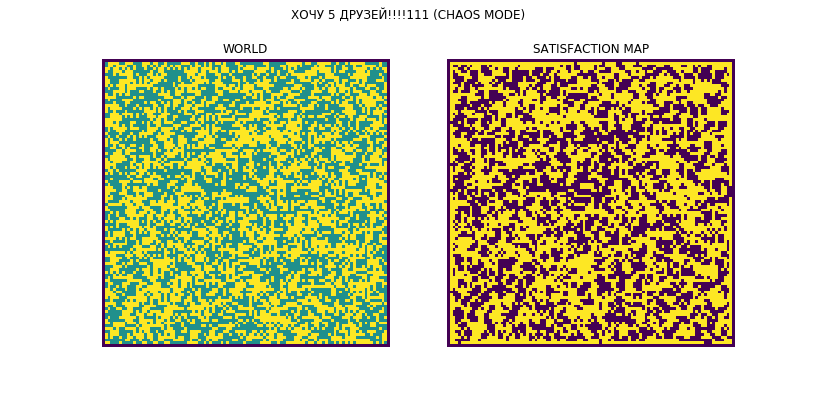
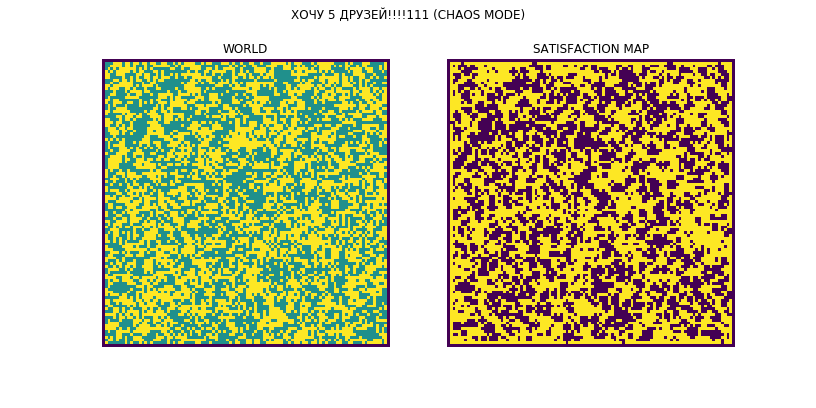
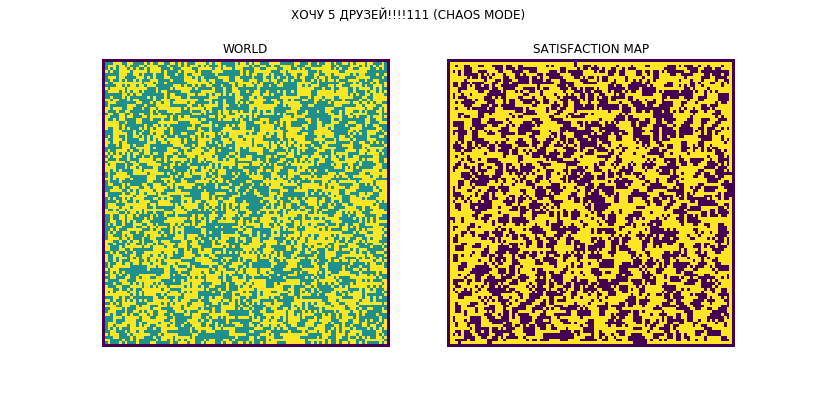
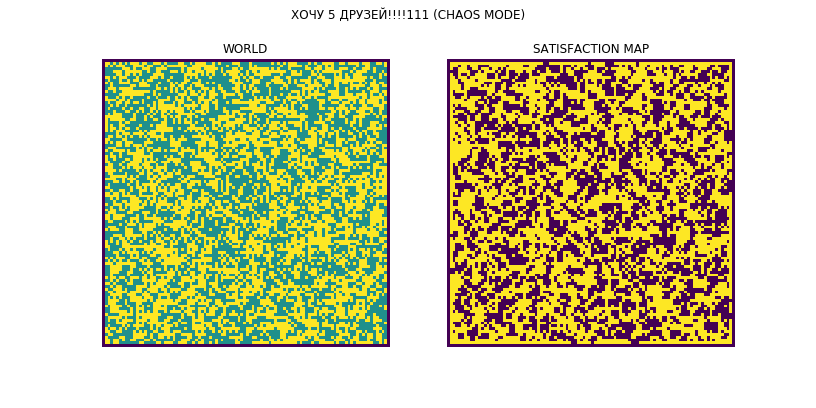
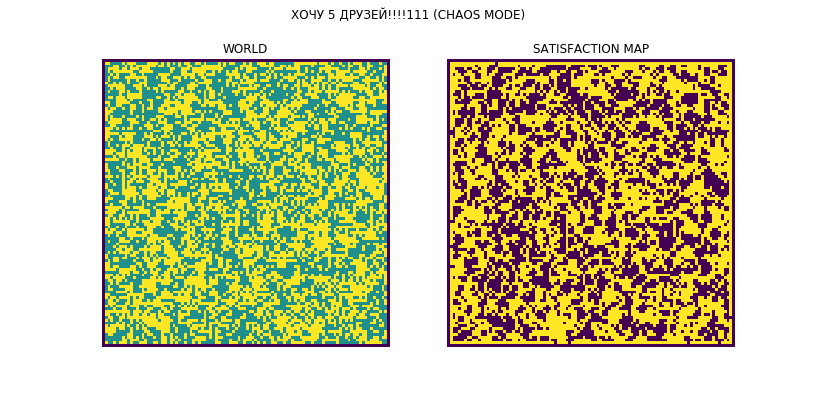
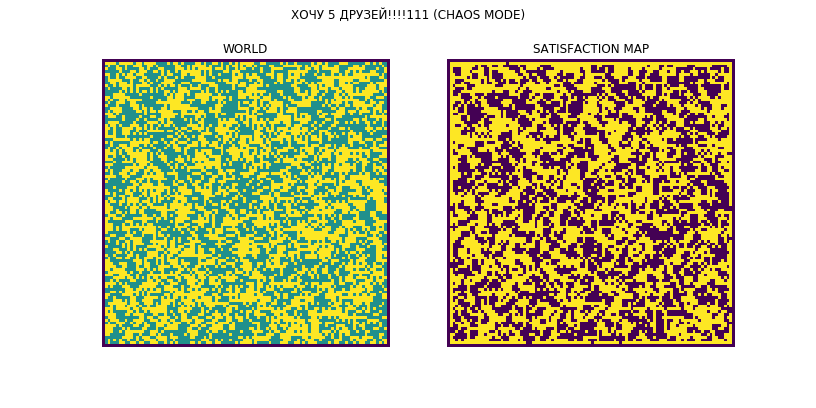
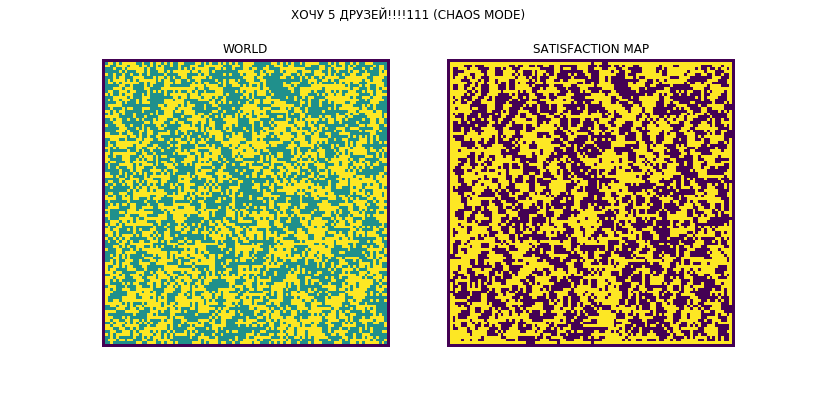
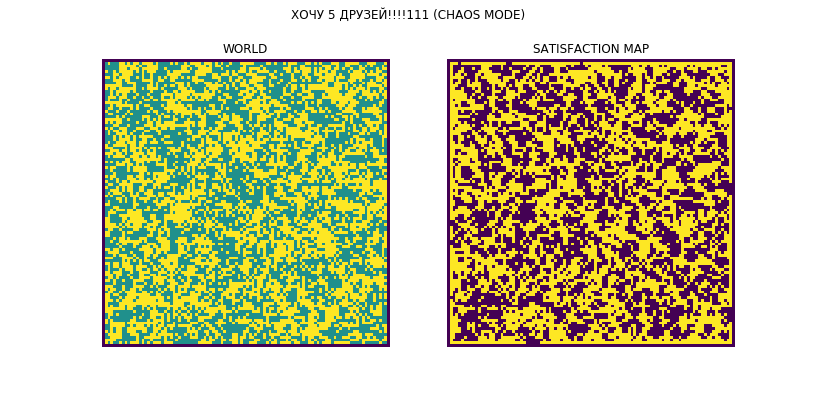
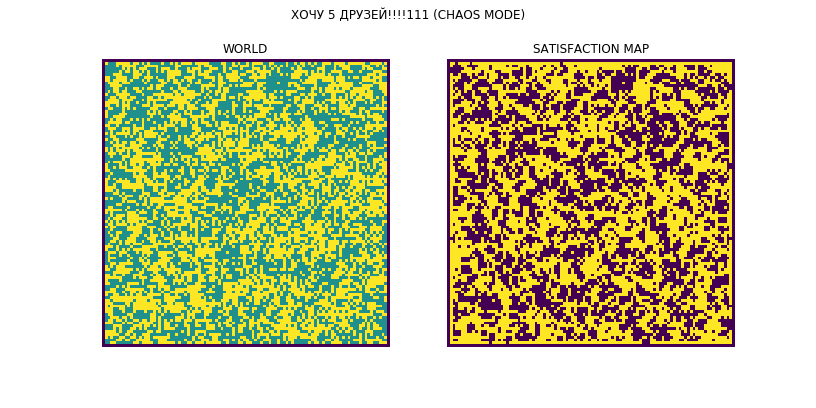
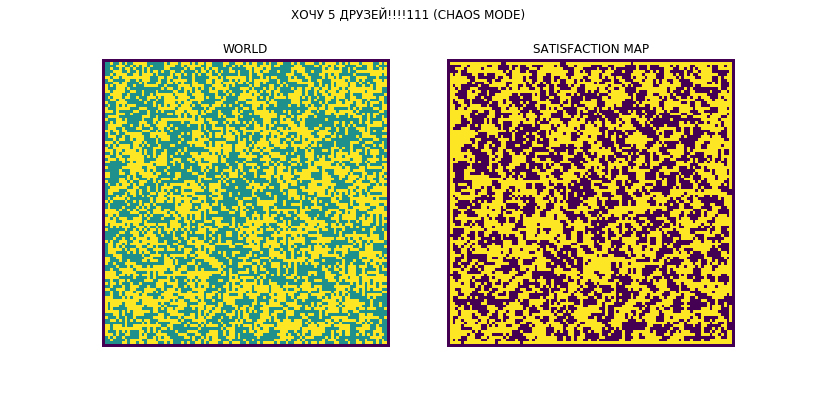
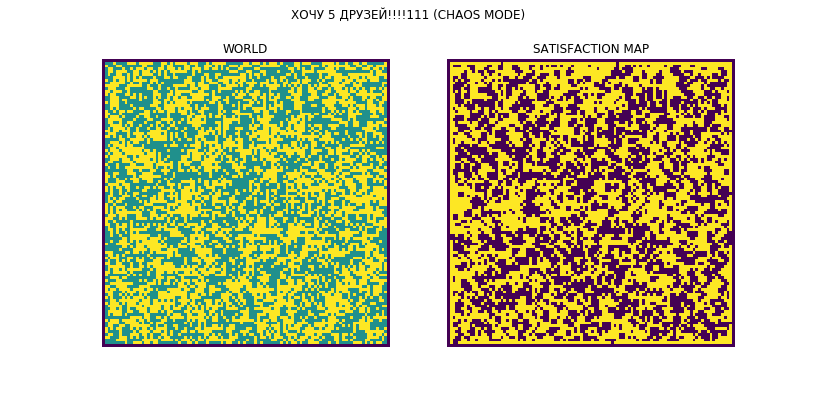
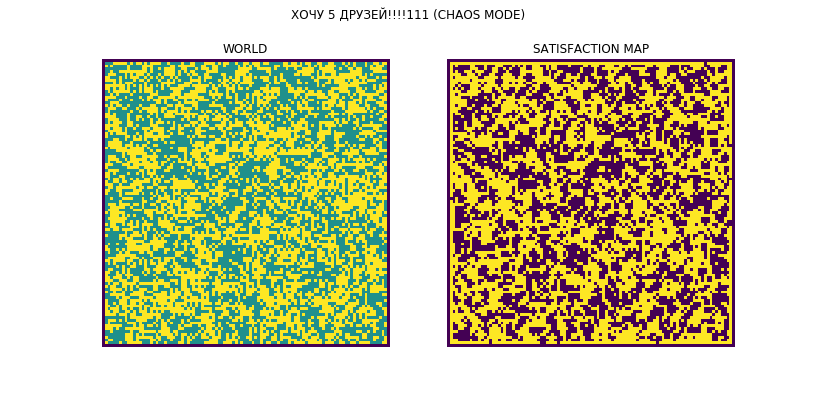
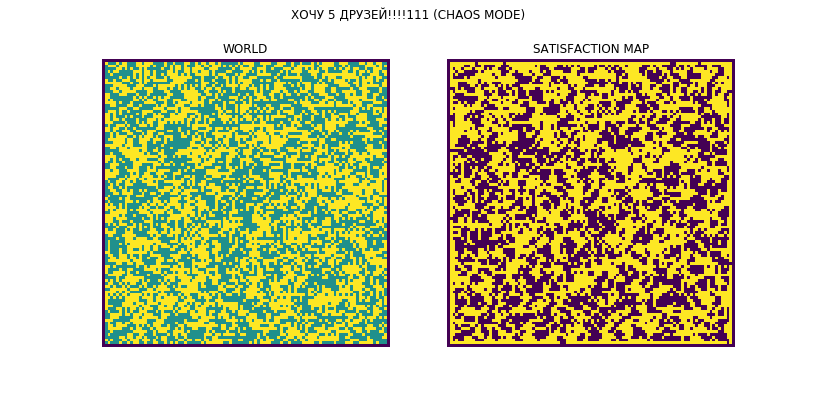
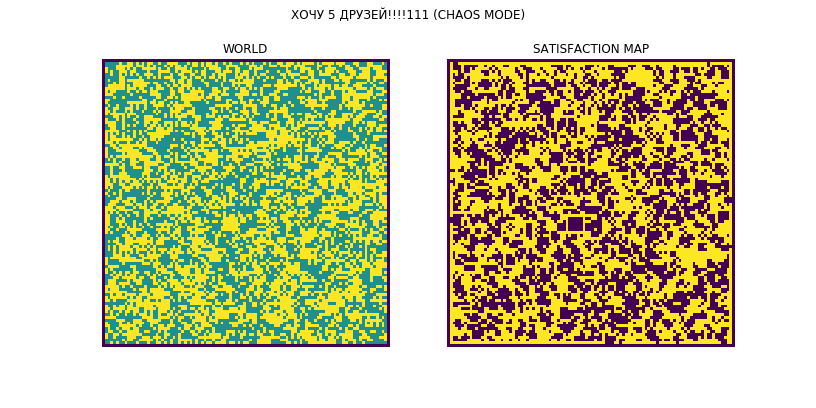

In [17]:
world = Chaos(SATISFACTION_THRESHOLD=5)
for _ in range(1000):
    world.iteration()
show_frames("ХОЧУ 5 ДРУЗЕЙ!!!!111 (CHAOS MODE)", world.world_map[::10], world.dissatisfied_map[::10])